In [1]:
%matplotlib inline

# Import custom scripts

In [2]:
path_scripts = '/Users/simjoo/Projects/STRT_wound/scripts/'

In [3]:
import sys
sys.path.append(path_scripts)

In [4]:
from WND_misc_scripts_v2_0 import *
from WND_neg_binom_regression_v2_0 import *
from WND_pseudotemporal_ordering_v2_0 import *
from WND_outlier_cell_detection_v2_0 import *

# Initialize engines

In [5]:
from ipyparallel import Client

In [6]:
c = Client(profile='default')

In [7]:
dview = c[:]

In [8]:
dview.execute('import sys')
dview.execute('sys.path.append("/Users/simjoo/Projects/STRT_wound/scripts/")')
dview.execute('from WND_misc_scripts_v2_0 import *')
dview.execute('from WND_affinity_propagation_v2_0 import *')
dview.execute('from WND_neg_binom_regression_v2_0 import *')
dview.execute('from WND_pseudotemporal_ordering_v2_0 import *')
dview.execute('from WND_outlier_cell_detection_v2_0 import *')

<AsyncResult: execute>

# Import Data

In [9]:
exp_id = '201603171136_v2.6'
path_input = '/Users/simjoo/Projects/STRT_wound/data_input/v2.6'
path_output = '/Users/simjoo/Projects/STRT_wound/data_output/v2.6'
path_figures = '/Users/simjoo/Projects/STRT_wound/figures/v2.6'

In [10]:
seq = loadData_v1(path_input, exp_id, 'seq_WND', 'DataFrame')
meta = loadData_v1(path_input, exp_id, 'meta_WND', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [11]:
seq_sel_norm = loadData_v1(path_output, exp_id, 'seq_sel_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [12]:
seq_sel_Lgr5_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr5_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [13]:
cells_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd', 'Series')
cells_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl', 'Series')
cells_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr5_wnd_ctrl_sel', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [14]:
cl_Lgr5_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd', 'Series').astype(str)
cl_Lgr5_wnd = AP_groups_reorder_v2(cl_Lgr5_wnd, ['3','2','0','1','4'])

cl_Lgr5_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl', 'Series')
cl_Lgr5_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl, ['ctrl','3','2','0','1','4'])

cl_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr5_wnd_ctrl_sel', 'Series')
cl_Lgr5_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr5_wnd_ctrl_sel, ['ctrl','3','2','0','1','4'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [15]:
tsne_Lgr5_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr5_wnd_ctrl_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [16]:
seq_sel_Lgr6_norm = loadData_v1(path_output, exp_id, 'seq_sel_Lgr6_norm', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [17]:
cells_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd', 'Series')
cells_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl', 'Series')
cells_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cells_Lgr6_wnd_ctrl_sel', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [18]:
cl_Lgr6_wnd = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd', 'Series').astype(str)
cl_Lgr6_wnd = AP_groups_reorder_v2(cl_Lgr6_wnd[cl_Lgr6_wnd!='3'], ['5','1','4','2','0'])

cl_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl', 'Series')
cl_Lgr6_wnd_ctrl = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl!='3'], ['ctrl - IFE','ctrl - IST','1','5','4','2','0'])

cl_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl_sel', 'Series')
cl_Lgr6_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel!='3'], ['ctrl - IFE','ctrl - IST','1','5','4','2','0'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [19]:
tsne_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr6_wnd_ctrl_sel', 'DataFrame')
tsne_Lgr6_wnd_ctrl_sel = tsne_Lgr6_wnd_ctrl_sel.ix[cl_Lgr6_wnd_ctrl_sel.index]

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [20]:
NBR_time_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_time_traces')
NBR_time_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_time_summary')

NBR_time_Lgr5_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_time_Lgr5_pval_0d')
NBR_time_Lgr6_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_time_Lgr6_pval_0d')

In [21]:
NBR_states_traces = loadData_from_pickle_v1(path_output, exp_id, 'NBR_states_traces')
NBR_states_summary = loadData_from_pickle_v1(path_output, exp_id,'NBR_states_summary')

NBR_states_Lgr5_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_states_Lgr5_pval_0d')
NBR_states_Lgr6_pval_0d = loadData_from_pickle_v1(path_output,exp_id,'NBR_states_Lgr6_pval_0d')

## Define colormaps

In [22]:
import matplotlib as mpl

In [23]:
cmap_Lgr5_time = pd.Series()
cmap_Lgr5_time['0 d'] = '#ffd92f'; cmap_Lgr5_time['Lgr5 - 0 d'] = '#ffd92f'
cmap_Lgr5_time['1 d'] = '#ffffd9'; cmap_Lgr5_time['Lgr5 - 1 d'] = '#ffffd9'
cmap_Lgr5_time['4 d'] = '#abdda4'; cmap_Lgr5_time['Lgr5 - 4 d'] = '#abdda4'
cmap_Lgr5_time['7 d'] = '#41b6c4'; cmap_Lgr5_time['Lgr5 - 7 d'] = '#41b6c4'
cmap_Lgr5_time['10 d'] = '#225ea8'; cmap_Lgr5_time['Lgr5 - 10 d'] = '#225ea8'
cmap_Lgr5_time['1 m+'] = '#081d58'; cmap_Lgr5_time['Lgr5 - 1 m+'] = '#081d58'

In [24]:
cmap_Lgr6_time = pd.Series()
cmap_Lgr6_time['ctrl - IFE'] = '#ffd92f'; cmap_Lgr6_time['Lgr6 - ctrl - IFE'] = '#ffd92f'
cmap_Lgr6_time['ctrl - IST'] = '#ffd92f'; cmap_Lgr6_time['Lgr6 - ctrl - IST'] = '#ffd92f'
cmap_Lgr6_time['1 d'] = '#ffffd9'; cmap_Lgr6_time['Lgr6 - 1 d'] = '#ffffd9'
cmap_Lgr6_time['4 d'] = '#abdda4'; cmap_Lgr6_time['Lgr6 - 4 d'] = '#abdda4'
cmap_Lgr6_time['7 d'] = '#41b6c4'; cmap_Lgr6_time['Lgr6 - 7 d'] = '#41b6c4'
cmap_Lgr6_time['10 d'] = '#225ea8'; cmap_Lgr6_time['Lgr6 - 10 d'] = '#225ea8'
cmap_Lgr6_time['1 m+'] = '#081d58'; cmap_Lgr6_time['Lgr6 - 1 m+'] = '#081d58'

In [25]:
cmap_Lgr5_state = pd.Series()
cmap_Lgr5_state['ctrl'],cmap_Lgr5_state['Lgr5 - ctrl'] = '#ffd92f','#ffd92f'
cmap_Lgr5_state['3'],cmap_Lgr5_state['Lgr5 - 3'] = '#ff7f00','#ff7f00'
cmap_Lgr5_state['2'],cmap_Lgr5_state['Lgr5 - 2'] = '#cab2d6','#cab2d6'
cmap_Lgr5_state['0'],cmap_Lgr5_state['Lgr5 - 0'] = '#6a3d9a','#6a3d9a'
cmap_Lgr5_state['1'],cmap_Lgr5_state['Lgr5 - 1'] = '#b2df8a','#b2df8a'
cmap_Lgr5_state['4'],cmap_Lgr5_state['Lgr5 - 4'] = '#33a02c','#33a02c'

In [26]:
cmap_Lgr6_state = pd.Series()
cmap_Lgr6_state['ctrl - IFE'],cmap_Lgr6_state['Lgr6 - ctrl - IFE'] = '#ffd92f','#ffd92f'
cmap_Lgr6_state['ctrl - IST'],cmap_Lgr6_state['Lgr6 - ctrl - IST'] = '#e78ac3','#e78ac3'
cmap_Lgr6_state['5'],cmap_Lgr6_state['Lgr6 - 5'] = '#6a3d9a','#6a3d9a'
cmap_Lgr6_state['1'],cmap_Lgr6_state['Lgr6 - 1'] = '#cab2d6','#cab2d6'
cmap_Lgr6_state['4'],cmap_Lgr6_state['Lgr6 - 4'] = '#33a02c','#33a02c'
cmap_Lgr6_state['2'],cmap_Lgr6_state['Lgr6 - 2'] = '#fb9a99','#fb9a99'
cmap_Lgr6_state['0'],cmap_Lgr6_state['Lgr6 - 0'] = '#e31a1c','#e31a1c'
cmap_Lgr6_state['3'],cmap_Lgr6_state['Lgr6 - 3'] = '#e7298a','#e7298a'

### Checkpoint

In [27]:
#saveData_v1(cmap_Lgr5_time, path_output, exp_id, 'cmap_Lgr5_time')
#saveData_v1(cmap_Lgr6_time, path_output, exp_id, 'cmap_Lgr6_time')
#saveData_v1(cmap_Lgr5_state, path_output, exp_id, 'cmap_Lgr5_state')
#saveData_v1(cmap_Lgr6_state, path_output, exp_id, 'cmap_Lgr6_state')

In [28]:
cmap_Lgr5_time = loadData_v1(path_output, exp_id, 'cmap_Lgr5_time', 'Series')
cmap_Lgr6_time = loadData_v1(path_output, exp_id, 'cmap_Lgr6_time', 'Series')
cmap_Lgr5_state = loadData_v1(path_output, exp_id, 'cmap_Lgr5_state', 'Series')
cmap_Lgr6_state = loadData_v1(path_output, exp_id, 'cmap_Lgr6_state', 'Series')

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


# Define all genes induced in either Lgr5 or Lgr6 wound cells

In [102]:
genes_Lgr5 = NBR_time_Lgr5_pval_0d.min(axis=1)[NBR_time_Lgr5_pval_0d.min(axis=1)<0.001].index

In [103]:
len(genes_Lgr5)

719

In [100]:
genes_Lgr6 = NBR_time_Lgr6_pval_0d.min(axis=1)[NBR_time_Lgr6_pval_0d.min(axis=1)<0.001].index

In [101]:
len(genes_Lgr6)

1074

# Genes linked to wnd time points - Lgr5

In [67]:
NBR_time_Lgr5_pval_0d_bin = neg_binom_get_binarized(NBR_time_Lgr5_pval_0d, 0.001)

In [68]:
NBR_time_Lgr5_pval_0d_bin.sum()

Lgr5 - 1 d     448
Lgr5 - 4 d      87
Lgr5 - 7 d     175
Lgr5 - 10 d    238
dtype: int64

In [69]:
NBR_time_Lgr5_pval_0d_dist = neg_binom_get_distances(NBR_time_summary, 
                                                     NBR_time_Lgr5_pval_0d_bin, 'Lgr5 - 0 d')

In [70]:
NBR_time_Lgr5_pval_0d_fc = neg_binom_get_fold_change(NBR_time_summary, 
                                                     NBR_time_Lgr5_pval_0d_bin, 'Lgr5 - 0 d')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/simjoo/anaco

In [71]:
genes_time_Lgr5 = neg_binom_extract_genes_v2(NBR_time_Lgr5_pval_0d_dist, 'P5', number = 10)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [72]:
genes_time_Lgr5['Lgr5 - 1m+'] = ''

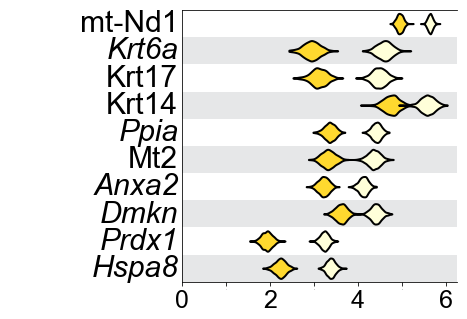

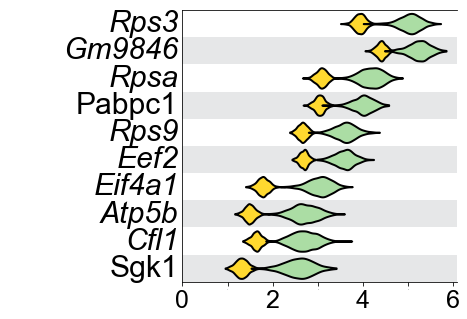

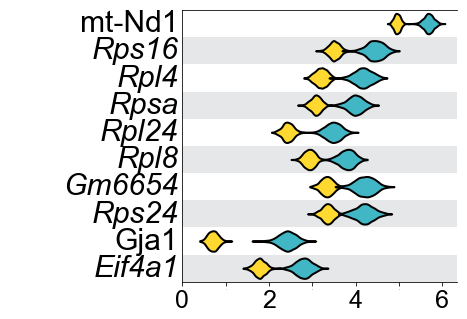

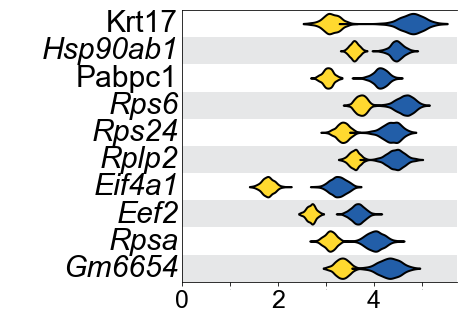

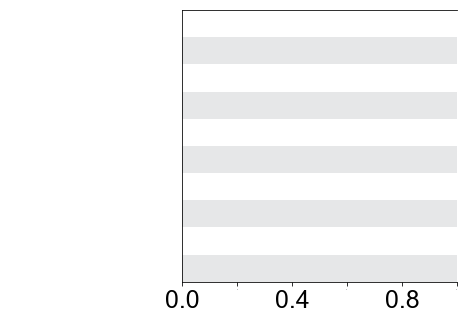

In [95]:
for gr_ in ['Lgr5 - 1 d', 'Lgr5 - 4 d', 'Lgr5 - 7 d', 'Lgr5 - 10 d','Lgr5 - 1m+']:
    
    #define input variables

    genes = genes_time_Lgr5[gr_]
    L = len(genes)
    traces = NBR_time_traces
    groups = ['Lgr5 - 0 d',gr_]
    cmap = cmap_Lgr5_time

    #initialize figure

    height = 0.5 * len(genes)
    width = 8
    plt.figure(facecolor = 'w', figsize = (width, height))
    gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

    #create gene name axis 

    ax0 = plt.subplot(gs[0,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)

    #create violin plot axis

    ax1 = plt.subplot(gs[0,1])
    ax1.spines['right'].set_color('none')
    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])

    #iterate over genes

    for ix, g in enumerate(genes):

        #print gene name
        
        if g in genes_Lgr6:
            ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', style='italic')
        else:
            ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')

        #print background

        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
        elif ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)

        #iterate over groups
        
        if g == '':
            continue

        for gr in groups:

            #print group traces

            violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr)]],
                           positions = [ix],
                           vert=False,
                           showextrema=False, 
                            widths=0.75)

            for v in violin['bodies']:
                v.set_edgecolor('black')
                v.set_facecolor(cmap[str(gr)])
                v.set_linewidth(2.0)
                v.set_alpha(1.0)

    ax1.set_xlim(left = 0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Arial')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
    figname = 'v2.6_S1_Lgr5_NBR_%s.pdf' % gr_
    plt.savefig('%s/%s' % (path_figures, figname), 
                format = 'pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0, 
                rasterized = True)


# Genes linked to wnd time points - Lgr6

In [77]:
NBR_time_Lgr6_pval_0d_bin = neg_binom_get_binarized(NBR_time_Lgr6_pval_0d, 0.001)

In [78]:
NBR_time_Lgr6_pval_0d_bin.sum()

Lgr6 - 1 d     802
Lgr6 - 4 d     189
Lgr6 - 7 d     328
Lgr6 - 10 d    141
Lgr6 - 1 m+    311
dtype: int64

In [79]:
NBR_time_Lgr6_pval_0d_dist = neg_binom_get_distances(NBR_time_summary, 
                                                     NBR_time_Lgr6_pval_0d_bin, 'Lgr6 - ctrl - IFE')

In [80]:
NBR_time_Lgr6_pval_0d_fc = neg_binom_get_fold_change(NBR_time_summary, 
                                                     NBR_time_Lgr6_pval_0d_bin, 'Lgr6 - ctrl - IFE')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/simjoo/anaco

In [81]:
genes_time_Lgr6 = neg_binom_extract_genes_v2(NBR_time_Lgr6_pval_0d_dist, 'P5', number = 10)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


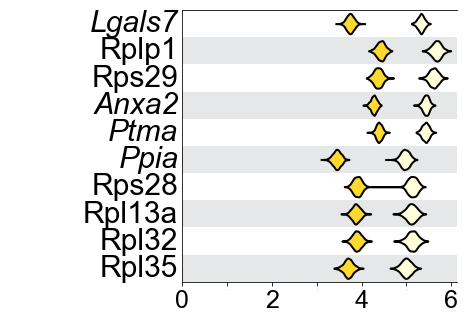

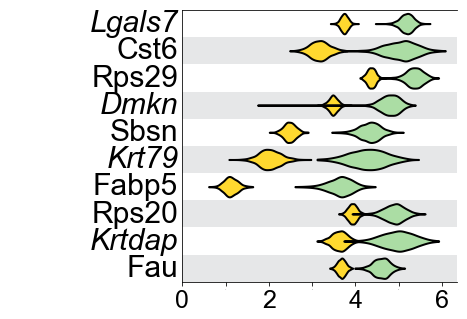

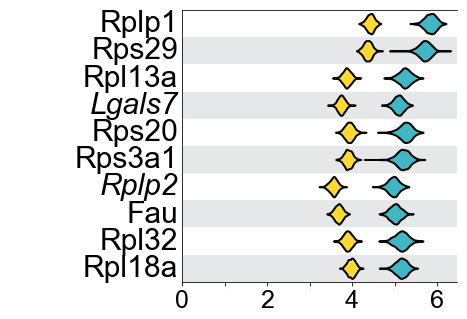

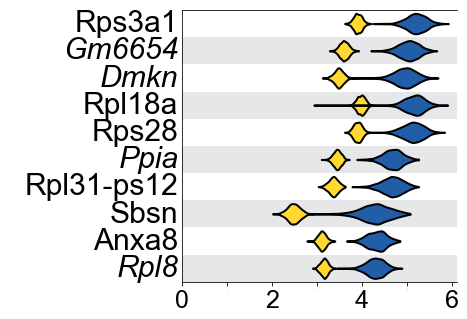

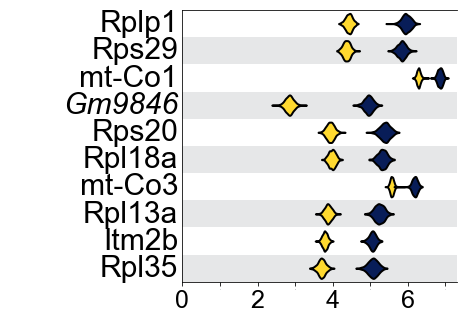

In [105]:
for gr_ in ['Lgr6 - 1 d', 'Lgr6 - 4 d', 'Lgr6 - 7 d', 'Lgr6 - 10 d', 'Lgr6 - 1 m+']:
    
    #define input variables

    genes = genes_time_Lgr6[gr_]
    L = len(genes)
    traces = NBR_time_traces
    groups = ['Lgr6 - ctrl - IFE', gr_]
    cmap = cmap_Lgr6_time

    #initialize figure

    height = 0.5 * len(genes)
    width = 8
    plt.figure(facecolor = 'w', figsize = (width, height))
    gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

    #create gene name axis 

    ax0 = plt.subplot(gs[0,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)

    #create violin plot axis

    ax1 = plt.subplot(gs[0,1])
    ax1.spines['right'].set_color('none')
    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])

    #iterate over genes

    for ix, g in enumerate(genes):

        #print gene name
        
        if type(g) == str:
            if g in genes_Lgr5:
                ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', style='italic')
            else:
                ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')

        #print background

        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
        elif ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)

        #iterate over groups

        for gr in groups:

            #print group traces
            
            try:

                violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr)]],
                               positions = [ix],
                               vert=False,
                               showextrema=False, 
                                widths=0.75)

                for v in violin['bodies']:
                    v.set_edgecolor('black')
                    v.set_facecolor(cmap[str(gr)])
                    v.set_linewidth(2.0)
                    v.set_alpha(1.0)
                    
            except:
                continue

    ax1.set_xlim(left = 0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Arial')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
    figname = 'v2.6_S1_Lgr6_NBR_%s.pdf' % gr_
    plt.savefig('%s/%s' % (path_figures, figname), 
                format = 'pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0, 
                rasterized = True)

# tSNE of wound time points - Lgr5

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


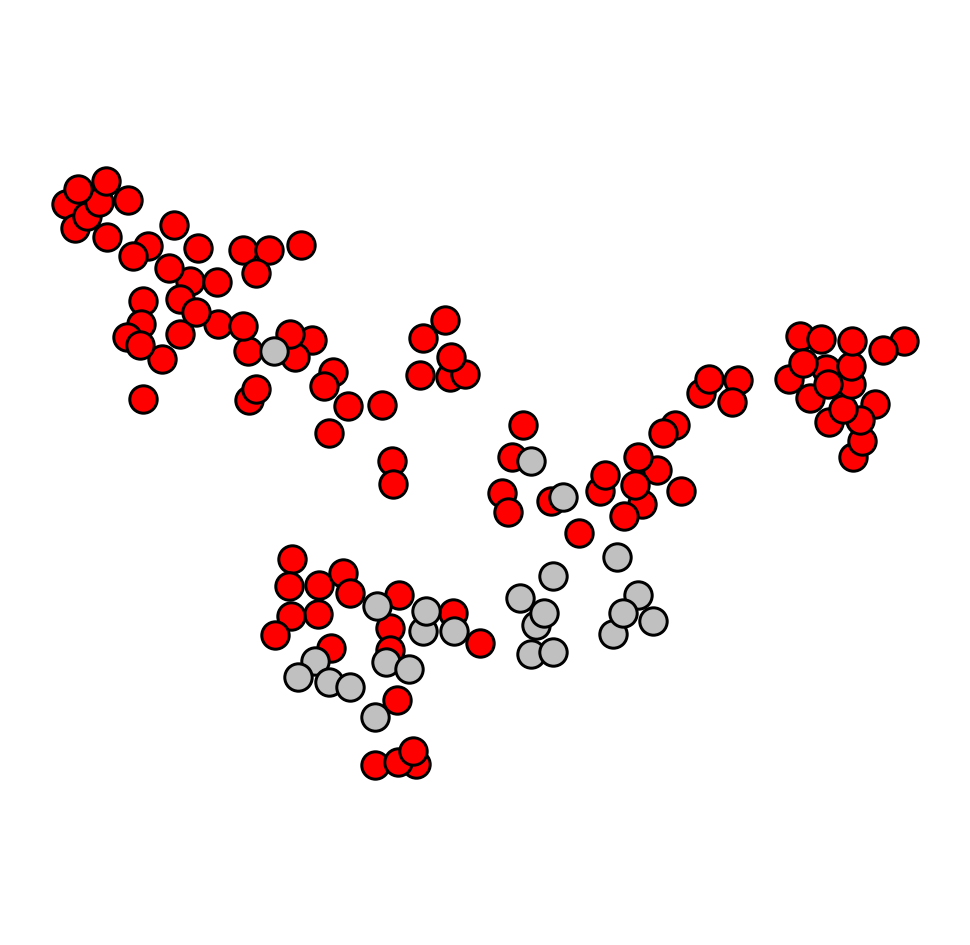

In [33]:
tsne = tsne_Lgr5_wnd_ctrl_sel
cells = cl_Lgr5_wnd_ctrl_sel
cmap = {'ctrl':'silver',
        '4':'red',
        '5':'red',
        '3':'red',
        '0':'red',
        '2':'red',
        '1':'red'}

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_Lgr5_tSNE_wnd_vs_ctrl.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


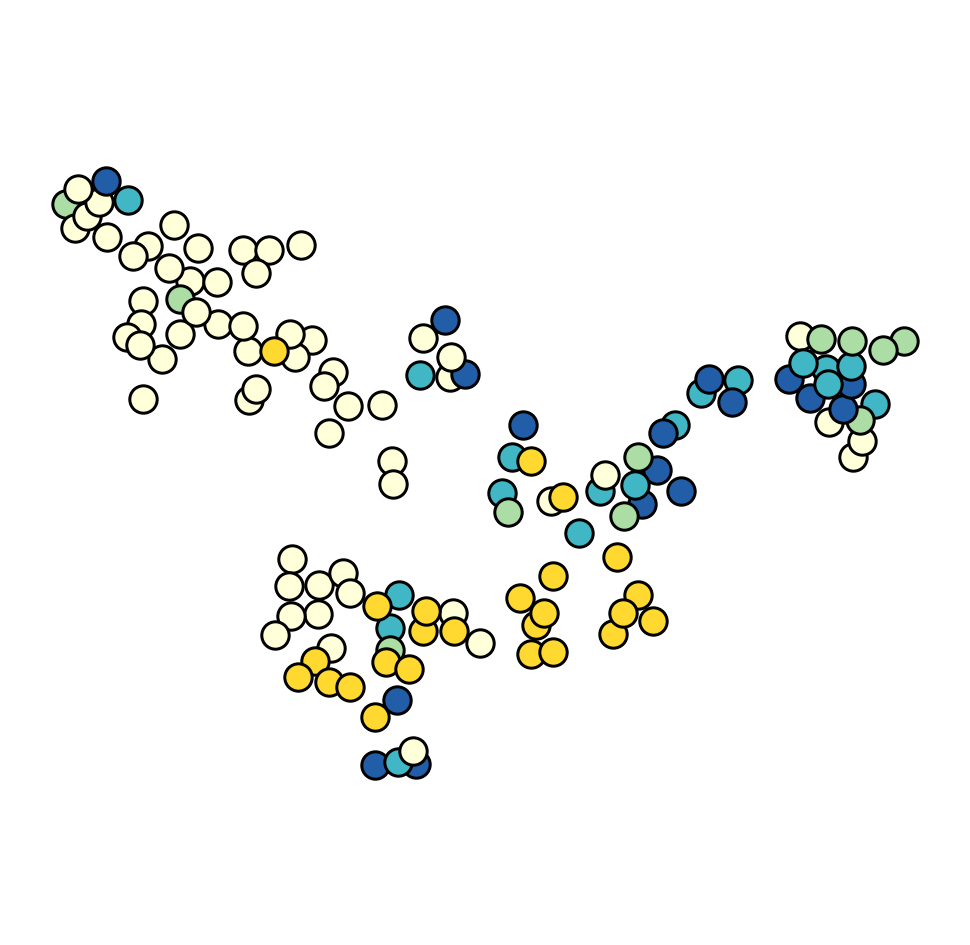

In [83]:
tsne = tsne_Lgr5_wnd_ctrl_sel
cells = cells_Lgr5_wnd_ctrl
cmap = cmap_Lgr5_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.4_1_Lgr5_tSNE_time.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# tSNE of wound time points - Lgr6

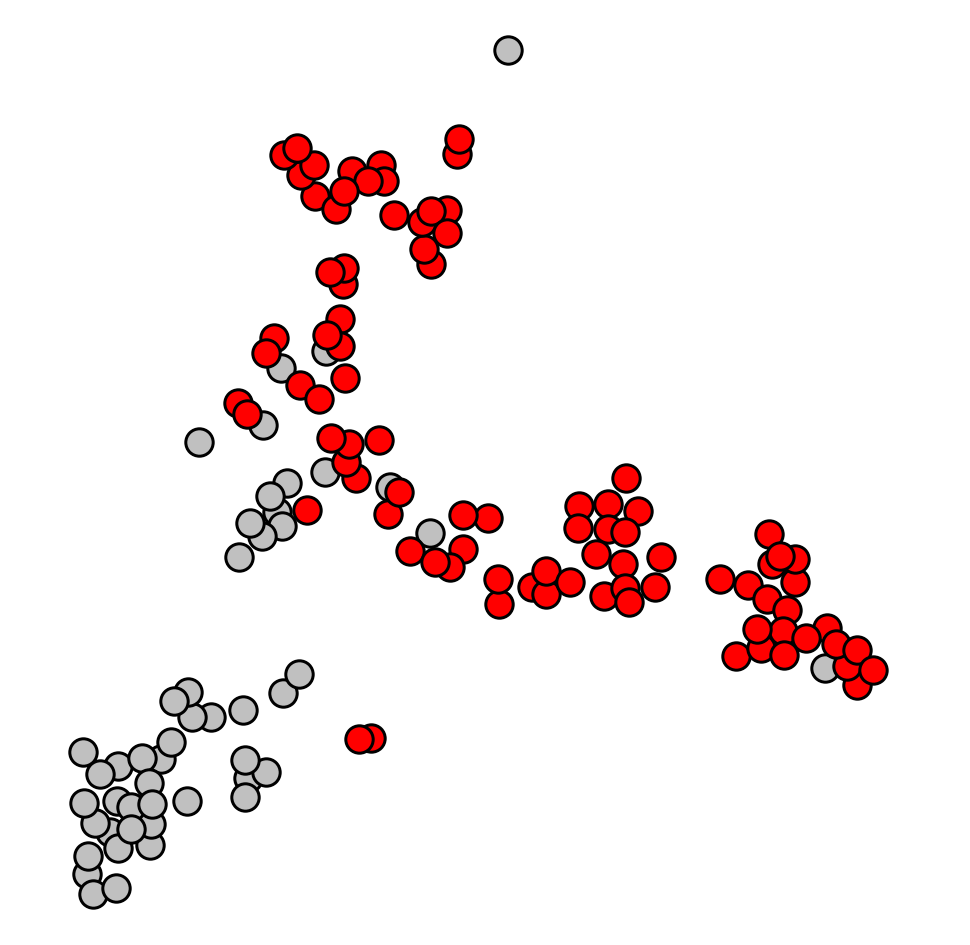

In [83]:
tsne = tsne_Lgr6_wnd_ctrl_sel
cells = cl_Lgr6_wnd_ctrl_sel
cmap = {'ctrl - IFE':'silver', 'ctrl - IST':'silver',
        '4':'red',
        '5':'red',
        '3':'blue',
        '0':'red',
        '2':'red',
        '1':'red'}

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_Lgr6_tSNE_wnd_vs_ctrl.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


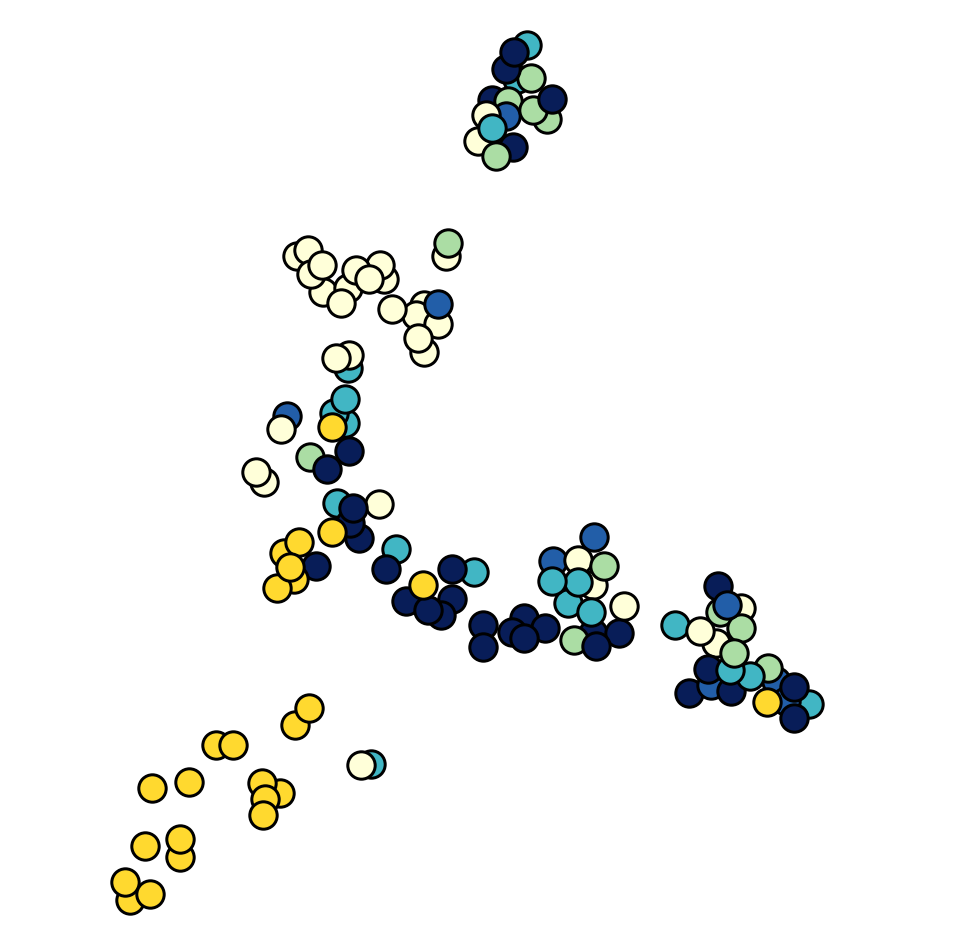

In [114]:
tsne = tsne_Lgr6_wnd_ctrl_sel
cells = cells_Lgr6_wnd_ctrl[~cells_Lgr6_wnd_ctrl.isin(['3','ctrl - IST'])]
tsne = tsne.loc[cells.index]
cmap = cmap_Lgr6_time

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_Lgr6_tSNE_time.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# tSNE of wound states - Lgr5

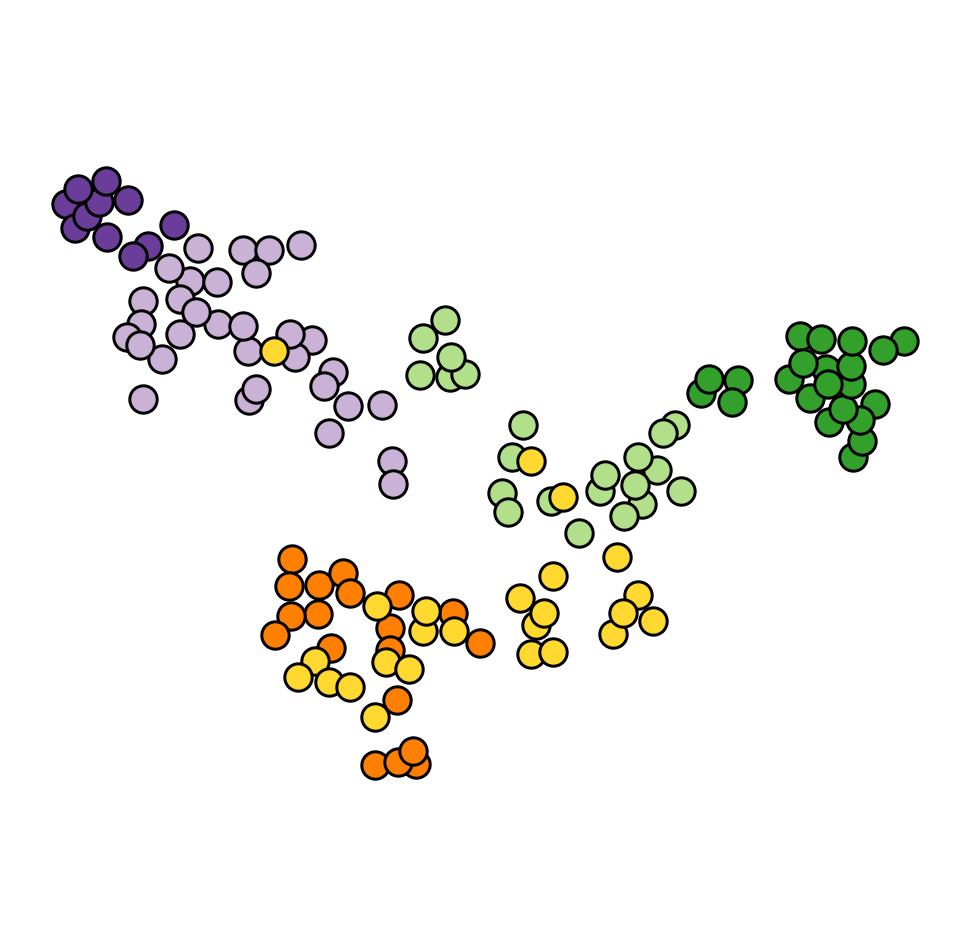

In [53]:
tsne = tsne_Lgr5_wnd_ctrl_sel
cells = cl_Lgr5_wnd_ctrl_sel
cmap = cmap_Lgr5_state

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_Lgr5_tSNE_states_v1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# tSNE of wound states - Lgr6

In [87]:
return_unique(cl_Lgr6_wnd_ctrl_sel)

['ctrl - IFE', 'ctrl - IST', '5', '1', '4', '2', '0']

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


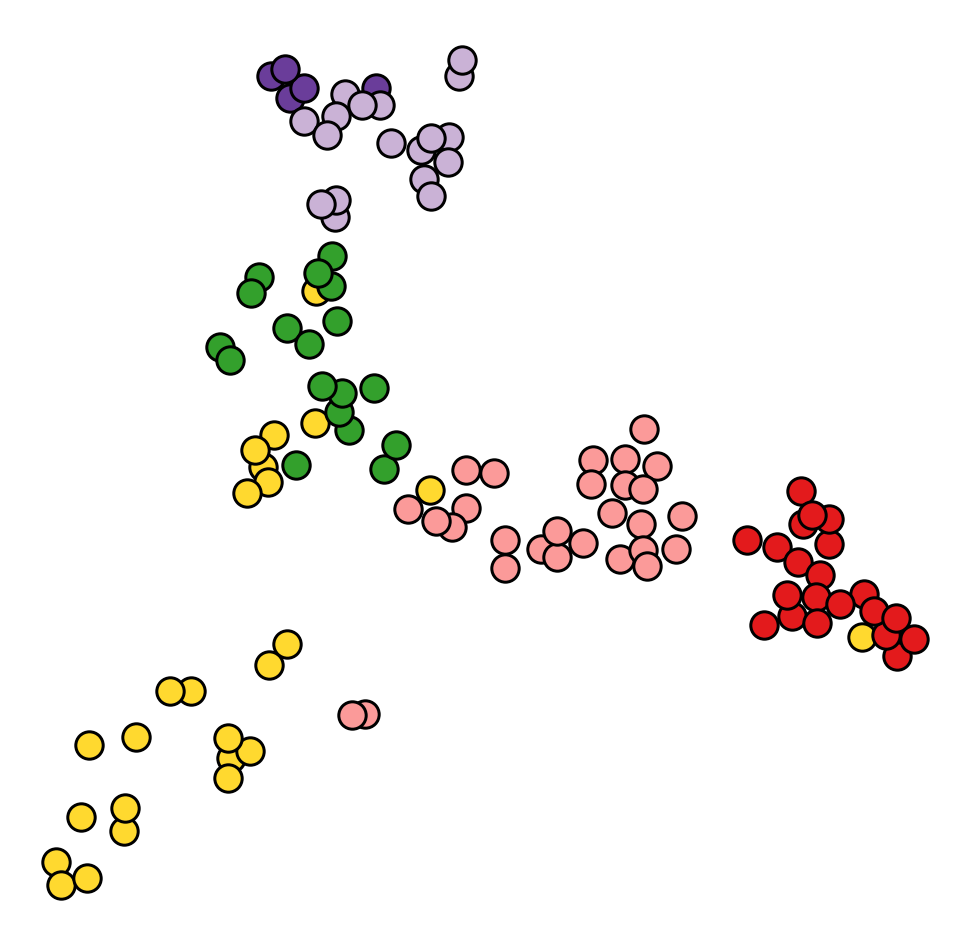

In [88]:
tsne = tsne_Lgr6_wnd_ctrl_sel
cells = cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel!='ctrl - IST']
tsne = tsne.loc[cells.index]
cmap = cmap_Lgr6_state

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_Lgr6_tSNE_states_v1.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Lgr6 tSNE with uHF like cells

In [99]:
cl_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl_sel', 'Series')
cl_Lgr6_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl_sel, ['ctrl - IFE','ctrl - IST','5','1','4','2','0','3'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2849: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [100]:
tsne_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'tsne_Lgr6_wnd_ctrl_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


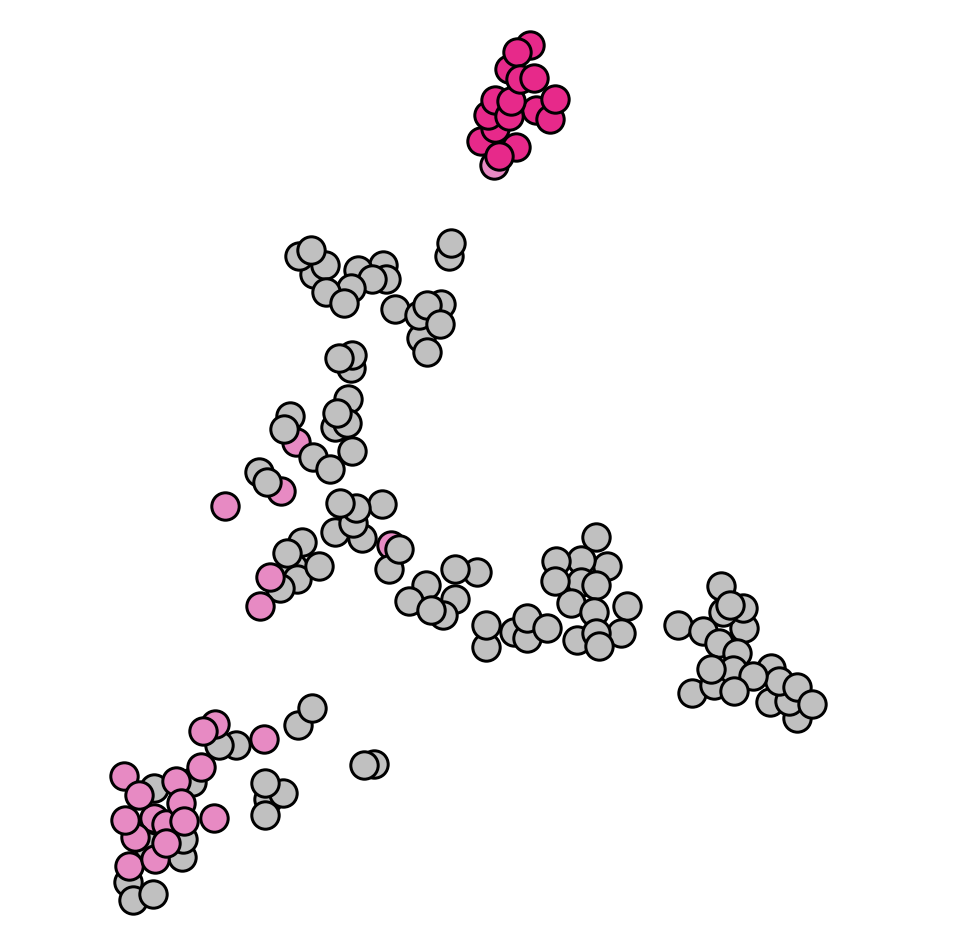

In [102]:
tsne = tsne_Lgr6_wnd_ctrl_sel
cells = cl_Lgr6_wnd_ctrl_sel
tsne = tsne.loc[cells.index]
cmap = {'2':'silver',
        '4':'silver',
        '3':'#e7298a',
        '5':'silver',
        '1':'silver',
        '0':'silver',
        'ctrl - IST':'#e78ac3',
        'ctrl - IFE':'silver'}

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 750,
                linewidth = 3.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_Lgr6_tSNE_states_v1_w_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Barplots of example genes

## Lgr5 

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


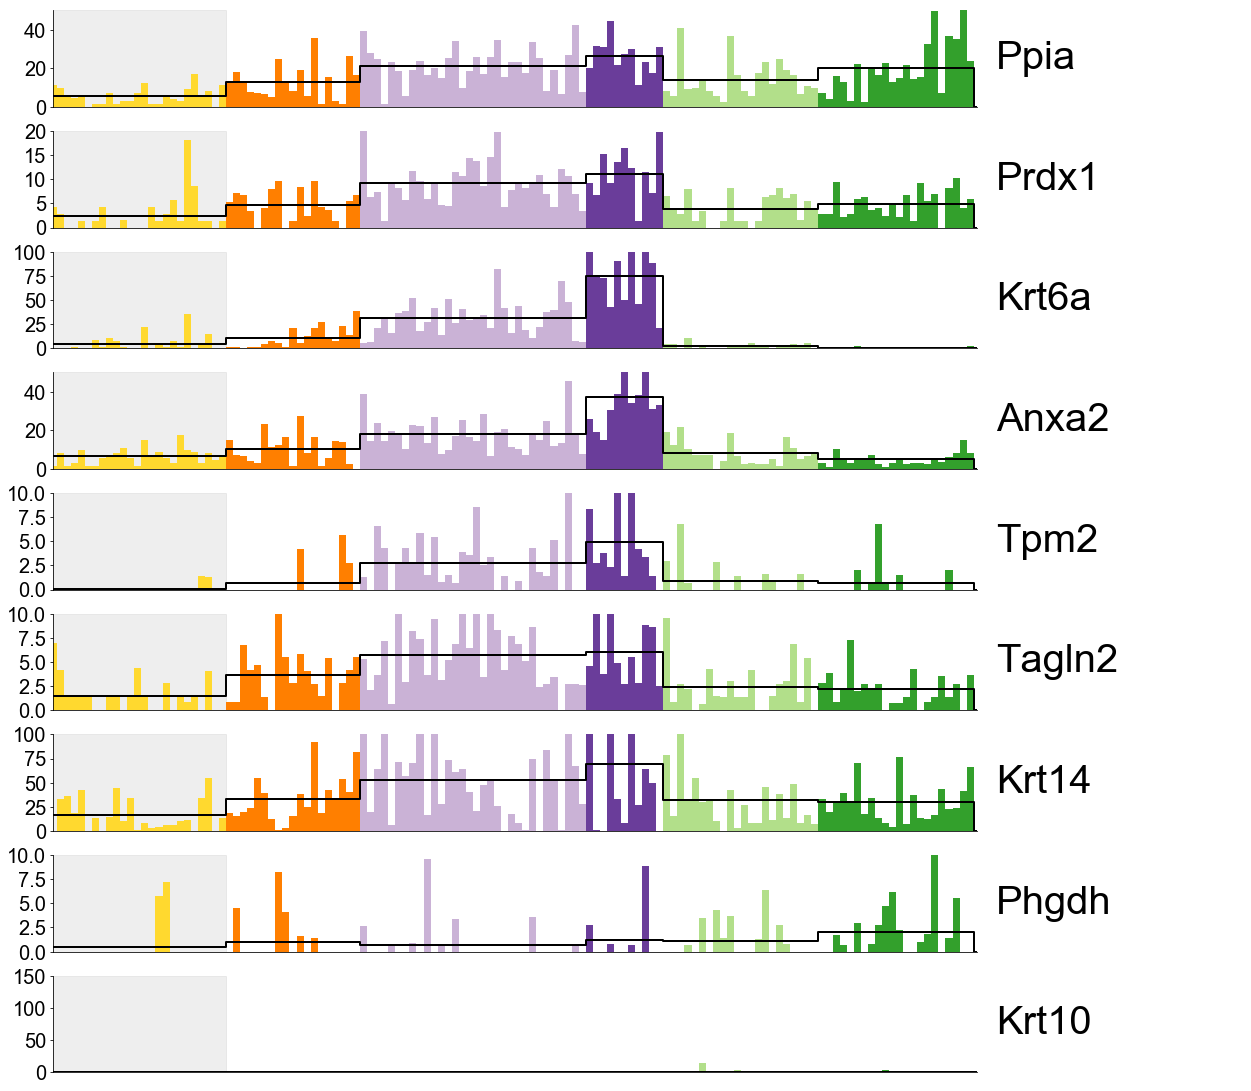

In [34]:
genes = ['Ppia','Prdx1','Krt6a','Anxa2','Tpm2','Tagln2','Krt14','Phgdh','Krt10']

cell_groups = cl_Lgr5_wnd_ctrl_sel
dataset = seq_sel_norm[cl_Lgr5_wnd_ctrl_sel.index]
cmap = cmap_Lgr5_state
vmax = [50,20,100,50,10,10,100,10,150,10]

#create figure

bar_size = 0.5
bar_pad = 0.5
width = 17.5
height = len(genes) * 1.75

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 2, hspace = 0.25, wspace = 0.0, top = 1 - ((bar_pad + bar_size) / height), right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = 0, width_ratios = [14,4])

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for pos, g in enumerate(genes):
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create white space for gene names
        
        ax0 = plt.subplot(gs1[pos,1])
        clean_axis(ax0)
 
        #create axis
            
        ax0 = plt.subplot(gs1[pos,0])
        
        ax0.axvspan(0, len(dataset.columns), color = '#FFFFFF', zorder = 0)
        
        ax0.spines['right'].set_color('none')
        ax0.spines['top'].set_color('none')
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticks([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = vmax[pos])
        ax0.set_ylabel(g, family = 'Arial', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            #if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(20)
            #else:
                #ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, 
                linewidth = 0, width = 1.0, edgecolor = 'black')
        
        #draw means
        
        ax0.step(range(len(cell_groups) + 1), [mean_tmp[val] for val in cell_groups] + [0], 
                 where = 'mid', color = 'black', linewidth = 2)
        ax0.axvspan(0,24.5,color = '#bdbdbd', zorder = 0, alpha = .25)

figname = 'v2.6_1_Lgr5_barplots.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [680]:
seq_sel_norm.loc['Gata6',cl_Lgr6_wnd_ctrl_sel.index].max()

4.0351816923887904

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


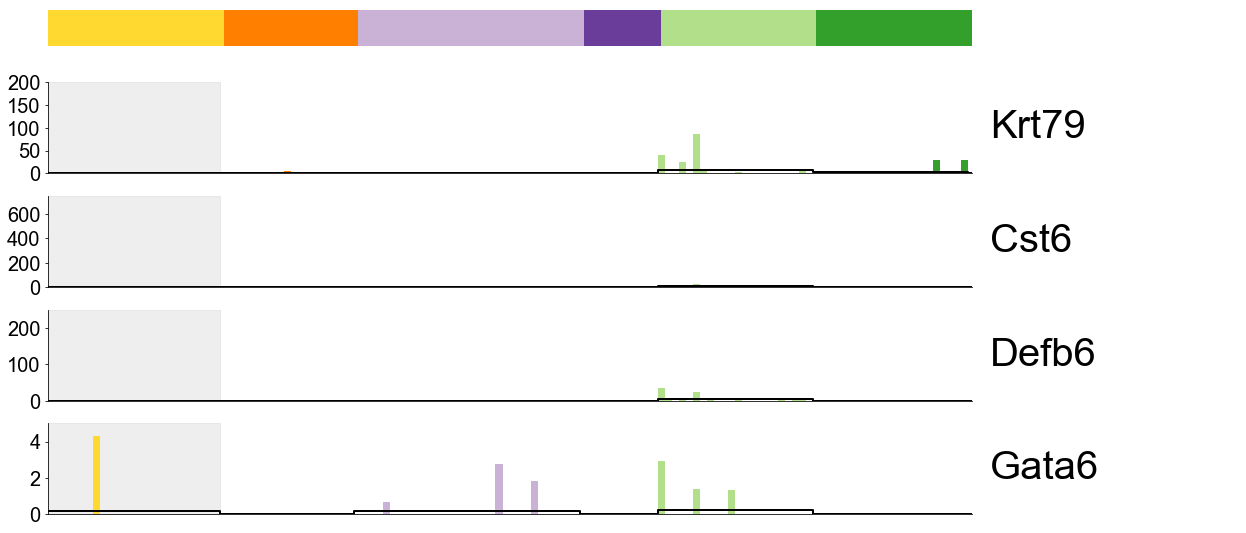

In [130]:
genes = ['Krt79','Cst6','Defb6','Gata6']

cell_groups = cl_Lgr5_wnd_ctrl_sel
dataset = seq_sel_norm[cl_Lgr5_wnd_ctrl_sel.index]
cmap = cmap_Lgr5_state
vmax = [200,750,250,5]

#create figure

bar_size = 0.5
bar_pad = 0.5
width = 17.5
height = len(genes) * 1.75

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 2, hspace = 0.25, wspace = 0.0, top = 1 - ((bar_pad + bar_size) / height), right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = 0, width_ratios = [14,4])

#create GS for sample group bar

gs0 = plt.GridSpec(1,2, left = (bar_pad + bar_size) / width, right = 1, top = 1,
                       bottom = 1 - ((bar_size) / height), hspace = 0.0, wspace = 0.0, width_ratios = [14,4])

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for pos, g in enumerate(genes):
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create white space for gene names
        
        ax0 = plt.subplot(gs1[pos,1])
        clean_axis(ax0)
 
        #create axis
            
        ax0 = plt.subplot(gs1[pos,0])
        
        ax0.axvspan(0, len(dataset.columns), color = '#FFFFFF', zorder = 0)
        
        ax0.spines['right'].set_color('none')
        ax0.spines['top'].set_color('none')
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticks([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = vmax[pos])
        ax0.set_ylabel(g, family = 'Arial', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            #if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(20)
            #else:
                #ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, 
                linewidth = 0, width = 1.0, edgecolor = 'black')
        
        #draw means
        
        ax0.step(range(len(cell_groups) + 1), [mean_tmp[val] for val in cell_groups] + [0], 
                 where = 'mid', color = 'black', linewidth = 2)
        ax0.axvspan(0,24.5,color = '#bdbdbd', zorder = 0, alpha = .25)
        
        #draw bar
        
        ax1 = plt.subplot(gs0[0,0])

        ax1.set_xlim(0, len(cell_groups))

        for s_gr in enumerate(cell_groups):

            ax1.axvspan(xmin = s_gr[0], xmax = s_gr[0] + 1, color = cmap[s_gr[1]])

        remove_ticks(ax1, linewidth = 1)
        clean_axis(ax1)

figname = 'v2.6_1_Lgr5_barplots_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Lgr6

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


"            \nfigname = 'v2.6_1_Lgr6_barplots.pdf'\nplt.savefig('%s/%s' % (path_figures, figname), \n            format = 'pdf', \n            transparent = True, \n            bbox_inches = 'tight', \n            pad_inches = 0, \n            rasterized = True)\n"

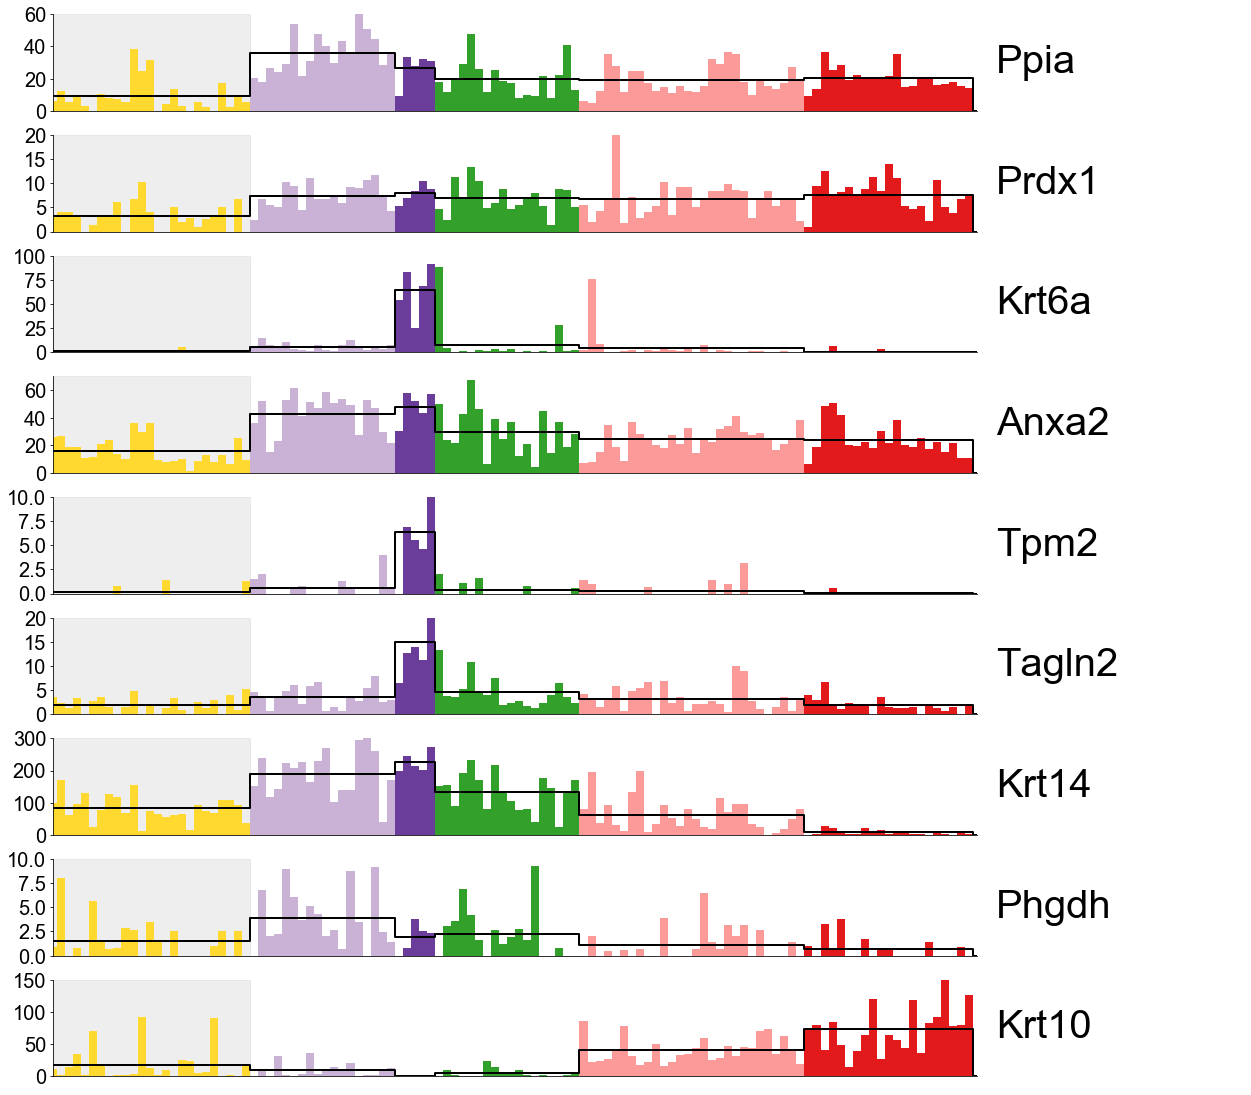

In [28]:
genes = ['Ppia','Prdx1','Krt6a','Anxa2','Tpm2','Tagln2','Krt14','Phgdh','Krt10']

cell_groups = cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel!='ctrl - IST']
dataset = seq_sel_norm[cell_groups.index]
cmap = cmap_Lgr6_state
vmax = [60,20,100,70,10,20,300,10,150]

#create figure

bar_size = 0.5
bar_pad = 0.5
width = 17.5
height = len(genes) * 1.75

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 2, hspace = 0.25, wspace = 0.0, top = 1 - ((bar_pad + bar_size) / height), right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = 0, width_ratios = [14,4])

#create GS for sample group bar

gs0 = plt.GridSpec(1,2, left = (bar_pad + bar_size) / width, right = 1, top = 1,
                       bottom = 1 - ((bar_size) / height), hspace = 0.0, wspace = 0.0, width_ratios = [14,4])

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for pos, g in enumerate(genes):
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create white space for gene names
        
        ax0 = plt.subplot(gs1[pos,1])
        clean_axis(ax0)
 
        #create axis
            
        ax0 = plt.subplot(gs1[pos,0])
        
        ax0.axvspan(0, len(dataset.columns), color = '#FFFFFF', zorder = 0)
        
        ax0.spines['right'].set_color('none')
        ax0.spines['top'].set_color('none')
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticks([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = vmax[pos])
        ax0.set_ylabel(g, family = 'Arial', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            #if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(20)
            #else:
                #ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, linewidth = 0, width = 1.0)
        
        #draw means
        
        ax0.step(range(len(cell_groups) + 1), [mean_tmp[val] for val in cell_groups] + [0], 
                 where = 'mid', color = 'black', linewidth = 2)
        ax0.axvspan(0,24.5,color = '#bdbdbd', zorder = 0, alpha = .25)
"""            
figname = 'v2.6_1_Lgr6_barplots.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)
"""

In [34]:
cl_Lgr6_wnd_ctrl_sel = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl_sel', 'Series')
cl_Lgr6_wnd_ctrl_sel = AP_groups_reorder_v2(cl_Lgr6_wnd_ctrl_sel, ['ctrl - IFE','1','5','4','2','0','ctrl - IST','3'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


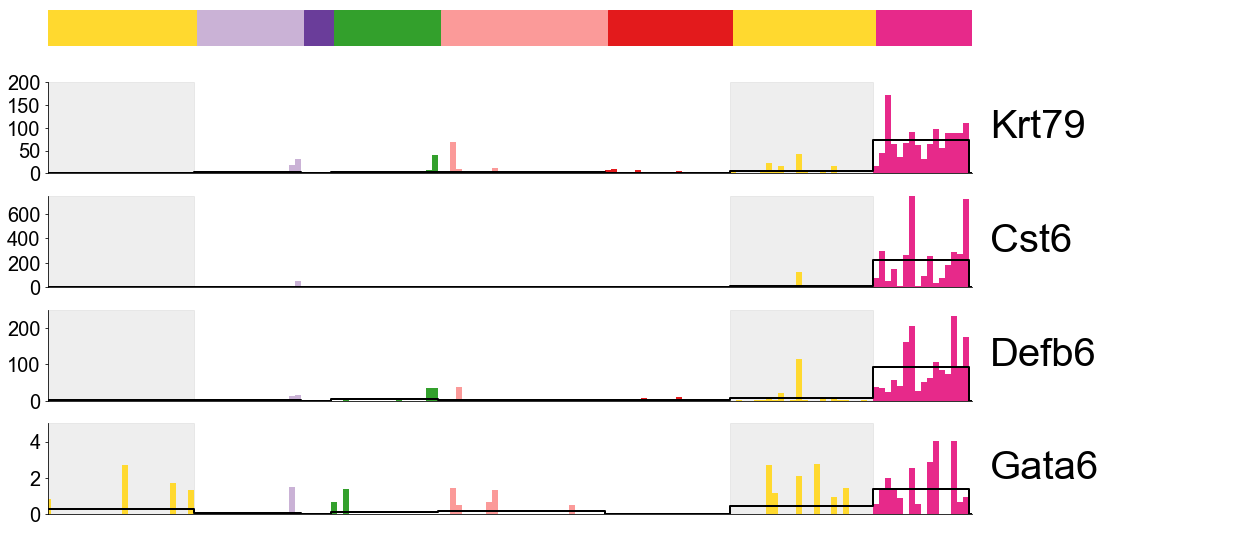

In [35]:
genes = ['Krt79','Cst6','Defb6','Gata6']

cell_groups = cl_Lgr6_wnd_ctrl_sel
dataset = seq_sel_norm[cl_Lgr6_wnd_ctrl_sel.index]
cmap = cmap_Lgr6_state
vmax = [200,750,250,5]

#create figure

bar_size = 0.5
bar_pad = 0.5
width = 17.5
height = len(genes) * 1.75

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#create GS for gene barplots

gs1 = plt.GridSpec(len(genes), 2, hspace = 0.25, wspace = 0.0, top = 1 - ((bar_pad + bar_size) / height), right = 1, 
                   left = (bar_pad + bar_size) / width, bottom = 0, width_ratios = [14,4])


#create GS for sample group bar

gs0 = plt.GridSpec(1,2, left = (bar_pad + bar_size) / width, right = 1, top = 1,
                       bottom = 1 - ((bar_size) / height), hspace = 0.0, wspace = 0.0, width_ratios = [14,4])

#colorlist bar

clistBAR = [cmap[val] for val in cell_groups]

#draw genes

for pos, g in enumerate(genes):
    
        #create group_specific mean expressions
    
        mean_tmp = pd.Series(index = set(cell_groups))
        
        for gr in set(cell_groups):
            
            ix_tmp = cell_groups[cell_groups == gr].index
            mean_tmp[gr] = dataset.ix[g, ix_tmp].mean()
            
        #create white space for gene names
        
        ax0 = plt.subplot(gs1[pos,1])
        clean_axis(ax0)
 
        #create axis
            
        ax0 = plt.subplot(gs1[pos,0])
        
        ax0.axvspan(0, len(dataset.columns), color = '#FFFFFF', zorder = 0)
        
        ax0.spines['right'].set_color('none')
        ax0.spines['top'].set_color('none')
        
        #define xaxis
        
        ax0.set_xlim(left = 0, right = (len(dataset.columns)))
        ax0.xaxis.set_ticks([])
        
        #define yaxis
        
        ax0.set_ylim(bottom = 0, top = vmax[pos])
        ax0.set_ylabel(g, family = 'Arial', fontsize = 40, rotation = 'horizontal', va = 'center', ha = 'left')
        ax0.yaxis.set_label_coords(1.02, 0.5)
        
        for tick_pos in range(len(ax0.yaxis.get_major_ticks())):
            #if tick_pos == 0 or tick_pos == len(ax0.yaxis.get_major_ticks()) / 2:
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_family('Arial')
                ax0.yaxis.get_major_ticks()[tick_pos].label.set_fontsize(20)
            #else:
                #ax0.yaxis.get_major_ticks()[tick_pos].label.set_visible(False)
                
        #draw expression data
        
        ax0.bar(np.arange(0, len(dataset.columns),1), dataset.ix[g], color = clistBAR, 
                linewidth = 0, width = 1.0, edgecolor = 'black')
        
        #draw means
        
        ax0.step(range(len(cell_groups) + 1), [mean_tmp[val] for val in cell_groups] + [0], 
                 where = 'mid', color = 'black', linewidth = 2)
        ax0.axvspan(0,24.5,color = '#bdbdbd', zorder = 0, alpha = .25)
        ax0.axvspan(114.5,138.5,color = '#bdbdbd', zorder = 0, alpha = .25)
        
        #draw bar
        
        ax1 = plt.subplot(gs0[0,0])

        ax1.set_xlim(0, len(cell_groups))

        for s_gr in enumerate(cell_groups):

            ax1.axvspan(xmin = s_gr[0], xmax = s_gr[0] + 1, color = cmap[s_gr[1]])

        remove_ticks(ax1, linewidth = 1)
        clean_axis(ax1)

figname = 'v2.6_1_Lgr6_barplots_uHF.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Time distribution - normalized along states and time points - collapsed

### Lgr5

In [44]:
census_Lgr5 = pd.DataFrame(index = ['0 d','1 d','4 d','7 d','10 d','1 m+'], 
                           columns = return_unique(cl_Lgr5_wnd_ctrl))

for gr in census_Lgr5.columns: 
    c_sel = cl_Lgr5_wnd_ctrl[cl_Lgr5_wnd_ctrl==gr].index
    for ix in census_Lgr5.index:
        census_Lgr5.ix[ix,gr] = Counter(cells_Lgr5_wnd_ctrl[c_sel])[ix]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [45]:
census_Lgr5

ctrl   3   2  0  1  4
0 d    96   0   0  0  0  0
1 d     0  12  31  8  5  4
4 d     0   1   1  1  3  5
7 d     0   3   0  1  7  7
10 d    0   3   0  1  7  6
1 m+    0   0   0  0  0  0

In [46]:
census_Lgr5_norm = census_Lgr5.ix[['0 d','1 d','4 d','7 d','10 d']].apply(lambda x: x / np.sum(x), axis = 1)
census_Lgr5_norm.ix['1 m+'] = 0
census_Lgr5_norm = census_Lgr5_norm.apply(lambda x: x / np.sum(x), axis = 0)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [47]:
census_Lgr5_collapsed = pd.DataFrame(index = ['0 d','1 d','4 d','7 d','10 d','1 m+'], 
                           columns = ['ctrl','PrC','WF','WEpB'])
        
census_Lgr5_collapsed['ctrl'] = census_Lgr5[['ctrl']].sum(axis=1)
census_Lgr5_collapsed['PrC'] = census_Lgr5[['3']].sum(axis=1)
census_Lgr5_collapsed['WF'] = census_Lgr5[['2','0']].sum(axis=1)
census_Lgr5_collapsed['WEpB'] = census_Lgr5[['4','1']].sum(axis=1)

In [48]:
census_Lgr5_collapsed_norm = census_Lgr5_collapsed.ix[['0 d','1 d','4 d','7 d','10 d']].apply(lambda x: x / np.sum(x), axis = 1)
census_Lgr5_collapsed_norm.ix['1 m+'] = 0
census_Lgr5_collapsed_norm = census_Lgr5_collapsed_norm.apply(lambda x: x / np.sum(x), axis = 0)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [50]:
return_unique(cl_Lgr5_wnd_ctrl_sel)

['ctrl', '3', '2', '0', '1', '4']

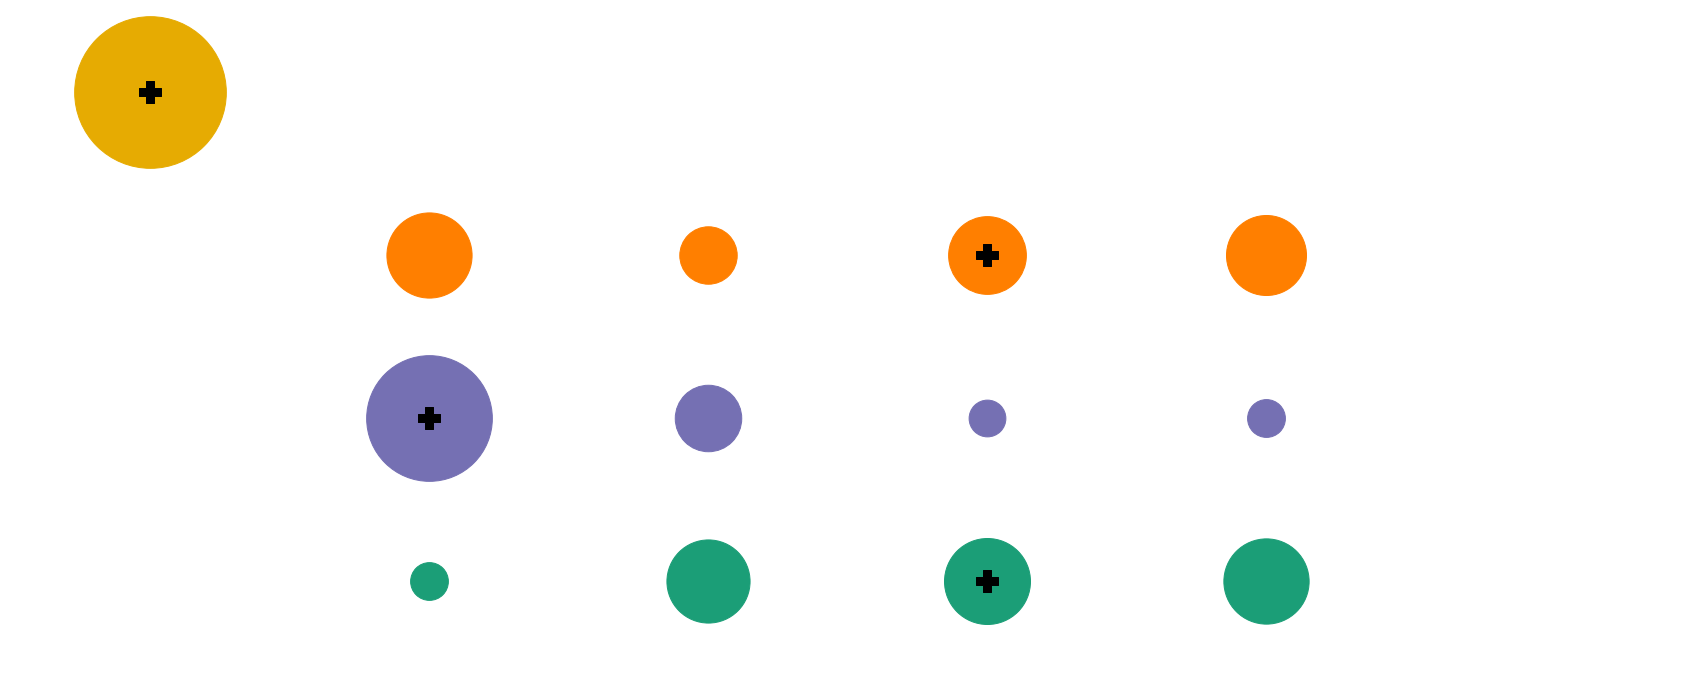

In [52]:
census = census_Lgr5_collapsed_norm
groups = {'ctrl':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['ctrl'])].index,
          'PrC':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['3'])].index,
          'WF':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['2','0'])].index,
          'WEpB':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['1','4'])].index}
dict_time ={'0 d':0,
            '1 d':1,
            '4 d':2,
            '7 d':3,
            '10 d':4,
            '1 m+':5}
cmap = {'ctrl':'#e6ab02','PrC':'#ff7f00','WF':'#7570b3','WEpB':'#1b9e77','WEpD':'#d95f02'}

#initialize figure 

height = 4 * 3
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(4 - 0.5, -0.5)

#plot circles

for y, gr in enumerate(['ctrl','PrC','WF','WEpB']):
    
    c_tmp = groups[gr]
    time_tmp = [dict_time[meta.ix['Days',c]] for c in c_tmp]
    val_tmp = []
    
    for x, t in enumerate(['0 d','1 d','4 d','7 d','10 d','1 m+']):
        ax.scatter(x, y, color = cmap[gr], s = census.ix[t,gr] * 23000)
        val_tmp += [dict_time[t]] * int(census.ix[t, gr] * 10000)
            
    ax.scatter(np.median(val_tmp), 
               y, color = 'black', marker = 'P', s = 500)

clean_axis(ax)

figname = 'v2.6_2_Lgr5_time_distr_3_collapsed.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


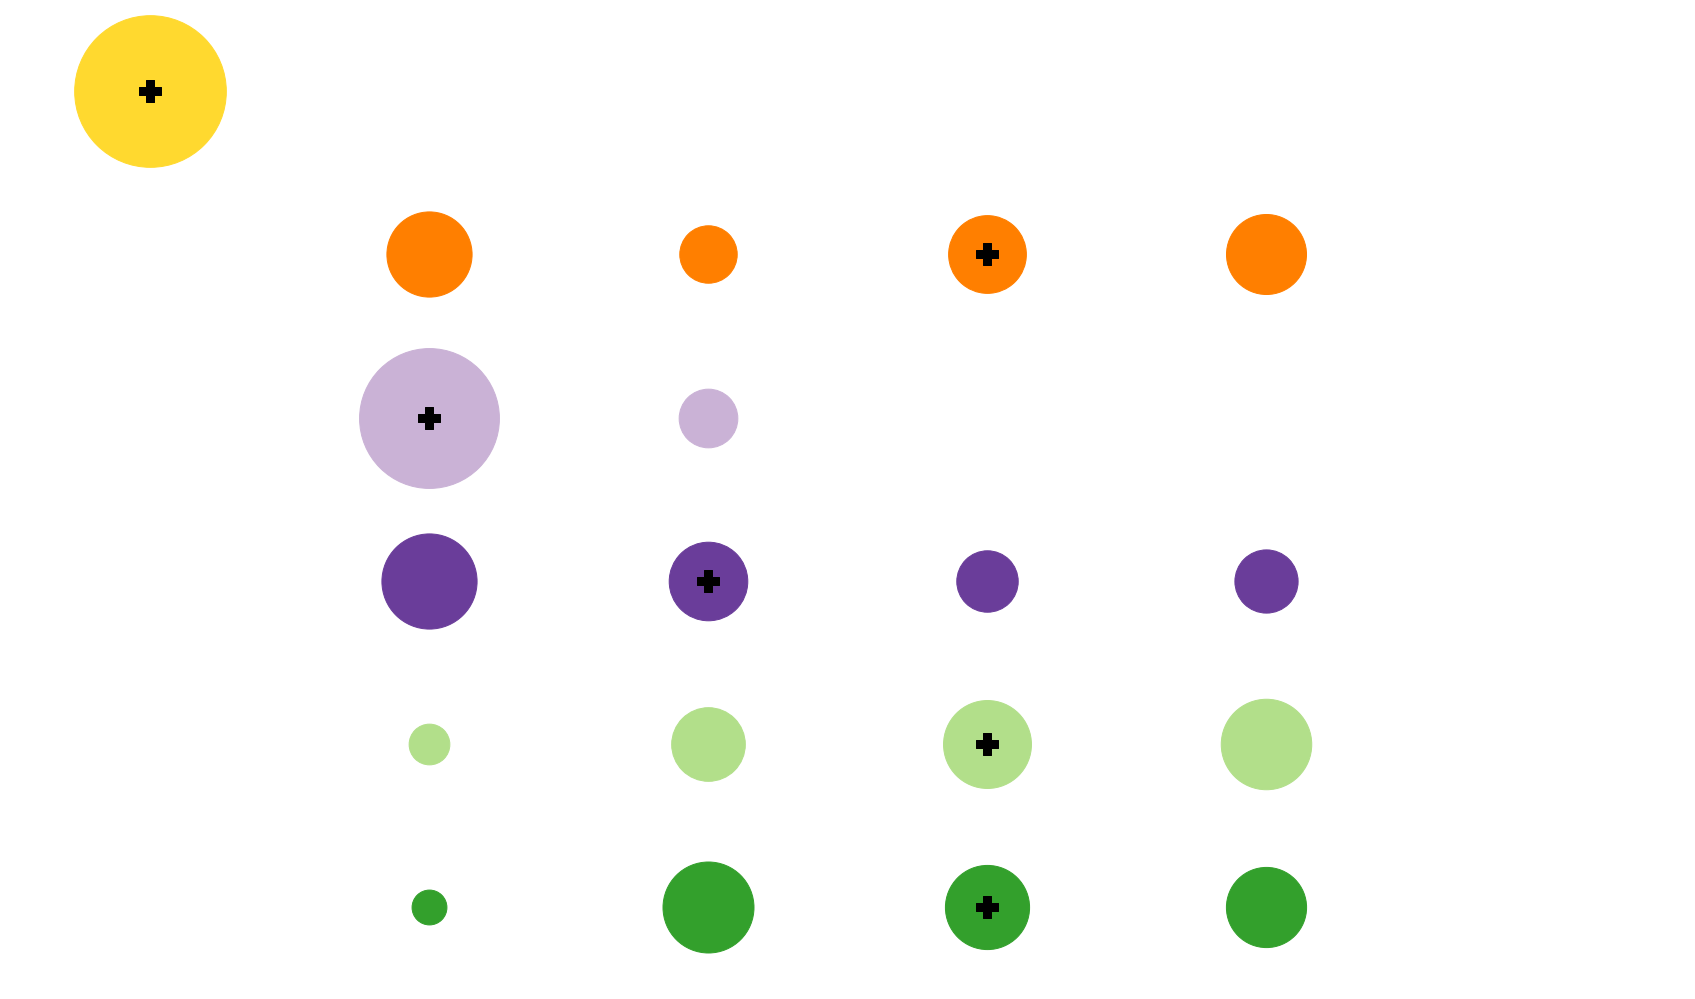

In [54]:
census = census_Lgr5_norm
groups = {'ctrl':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['ctrl'])].index,
          '3':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['3'])].index,
          '2':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['2'])].index,
          '0':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['0'])].index,
          '1':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['1'])].index,
          '4':cl_Lgr5_wnd_ctrl_sel[cl_Lgr5_wnd_ctrl_sel.isin(['4'])].index}
dict_time ={'0 d':0,
            '1 d':1,
            '4 d':2,
            '7 d':3,
            '10 d':4,
            '1 m+':5}
cmap = cmap_Lgr5_state

#initialize figure 

height = 6 * 3
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(6 - 0.5, -0.5)

#plot circles

for y, gr in enumerate(return_unique(cl_Lgr5_wnd_ctrl_sel)):
    
    c_tmp = groups[gr]
    time_tmp = [dict_time[meta.ix['Days',c]] for c in c_tmp]
    val_tmp = []
    
    for x, t in enumerate(['0 d','1 d','4 d','7 d','10 d','1 m+']):
        ax.scatter(x, y, color = cmap[gr], s = census.ix[t,gr] * 23000)
        val_tmp += [dict_time[t]] * int(census.ix[t, gr] * 10000)
            
    ax.scatter(np.median(val_tmp), 
               y, color = 'black', marker = 'P', s = 500)

clean_axis(ax)

figname = 'v2.6_2_Lgr5_time_distr_3.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Lgr6

In [36]:
census_Lgr6 = pd.DataFrame(index = ['ctrl - IFE','ctrl - IST','1 d','4 d','7 d','10 d','1 m+'], 
                           columns = return_unique(cl_Lgr6_wnd_ctrl))

for gr in census_Lgr6.columns: 
    c_sel = cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl==gr].index
    for ix in census_Lgr6.index:
        census_Lgr6.ix[ix,gr] = Counter(cells_Lgr6_wnd_ctrl[c_sel])[ix]
        
census_Lgr6.loc['0 d'] = census_Lgr6.loc[['ctrl - IFE','ctrl - IST']].sum()
census_Lgr6 = census_Lgr6.drop(['ctrl - IFE','ctrl - IST'])

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [37]:
census_Lgr6

ctrl - IFE  ctrl - IST   1  5  4   2  0
1 d            0           0  15  5  4   4  3
4 d            0           0   1  0  1   2  4
7 d            0           0   1  0  5   6  4
10 d           0           0   1  0  1   2  4
1 m+           0           0   0  0  7  14  6
0 d          130          24   0  0  0   0  0

In [38]:
census_Lgr6_norm = census_Lgr6.ix[['0 d','1 d','4 d','7 d','10 d','1 m+']].apply(lambda x: x / np.sum(x), axis = 1)
census_Lgr6_norm = census_Lgr6_norm.apply(lambda x: x / np.sum(x), axis = 0)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [39]:
census_Lgr6_collapsed = pd.DataFrame(index = ['0 d','1 d','4 d','7 d','10 d','1 m+'], 
                           columns = ['ctrl','WF','WEpB','WEpD'])
        
census_Lgr6_collapsed['ctrl'] = census_Lgr6[['ctrl - IFE','ctrl - IST']].sum(axis=1)
census_Lgr6_collapsed['WF'] = census_Lgr6[['1','5']].sum(axis=1)
census_Lgr6_collapsed['WEpB'] = census_Lgr6[['4']].sum(axis=1)
census_Lgr6_collapsed['WEpD'] = census_Lgr6[['2','0']].sum(axis=1)

In [40]:
census_Lgr6_collapsed_norm = census_Lgr6_collapsed.apply(lambda x: x / np.sum(x), axis = 1)
census_Lgr6_collapsed_norm = census_Lgr6_collapsed_norm.apply(lambda x: x / np.sum(x), axis = 0)

In [41]:
census_Lgr6_collapsed_norm

ctrl        WF      WEpB      WEpD
0 d    1.0  0.000000  0.000000  0.000000
1 d    0.0  0.673684  0.135710  0.073040
4 d    0.0  0.130526  0.131469  0.242597
7 d    0.0  0.065263  0.328674  0.202164
10 d   0.0  0.130526  0.131469  0.242597
1 m+   0.0  0.000000  0.272677  0.239602

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


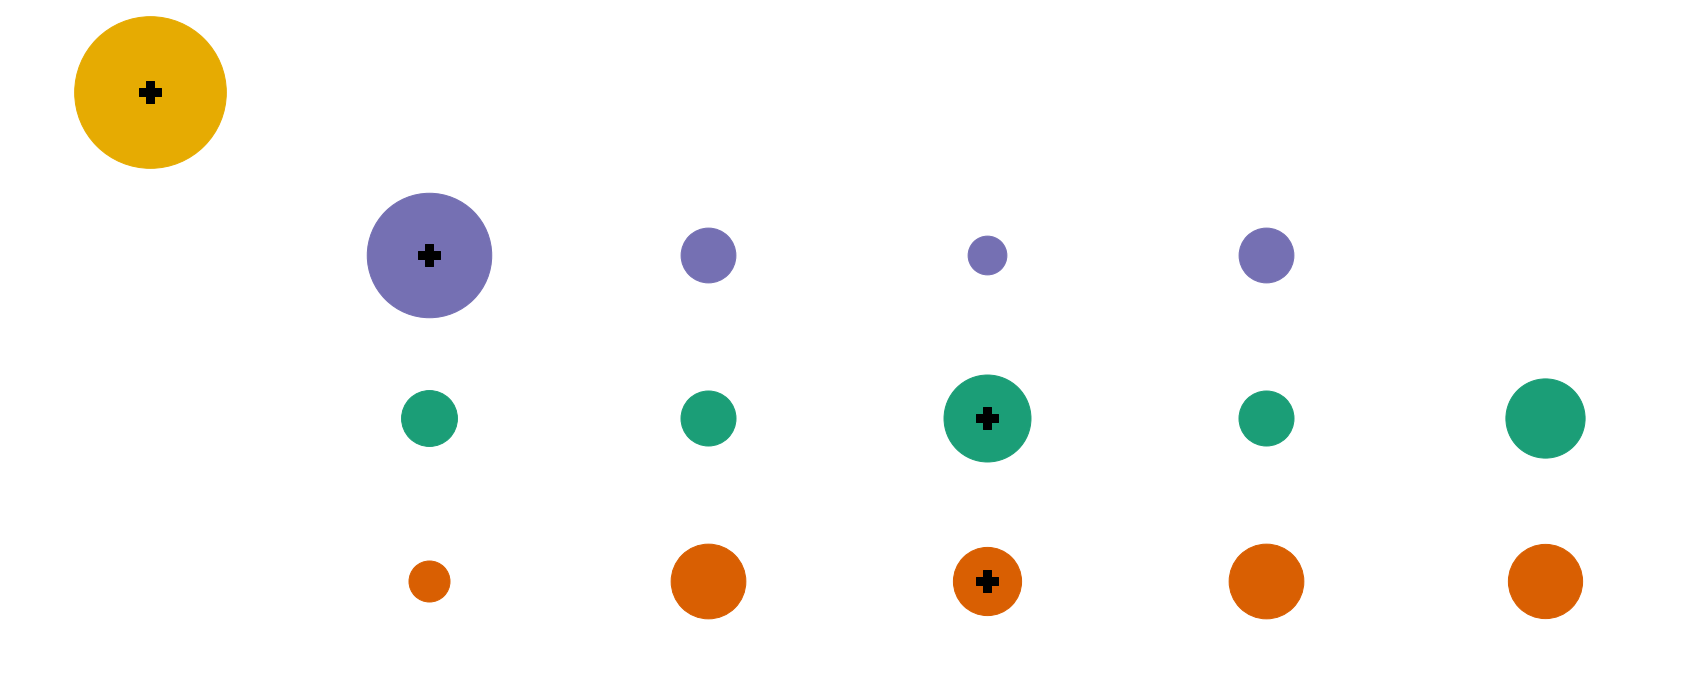

In [51]:
census = census_Lgr6_collapsed_norm
groups = {'ctrl':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['ctrl - IFE','ctrl - IST'])].index,
          'WF':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['1','5'])].index,
          'WEpB':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['4'])].index,
          'WEpD':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['2','0'])].index}
dict_time ={'0 d':0,
            '1 d':1,
            '4 d':2,
            '7 d':3,
            '10 d':4,
            '1 m+':5}
cmap = {'ctrl':'#e6ab02','WF':'#7570b3','WEpB':'#1b9e77','WEpD':'#d95f02'}

#initialize figure 

height = 3 * 4
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(4 - 0.5, -0.5)

#plot circles

for y, gr in enumerate(['ctrl','WF','WEpB','WEpD']):
    
    c_tmp = groups[gr]
    time_tmp = [dict_time[meta.ix['Days',c]] for c in c_tmp]
    val_tmp = []
    
    for x, t in enumerate(['0 d','1 d','4 d','7 d','10 d','1 m+']):
        ax.scatter(x, y, color = cmap[gr], s = census.ix[t,gr] * 23000)
        val_tmp += [dict_time[t]] * int(census.ix[t, gr] * 1000)
            
    ax.scatter(np.median(val_tmp), 
               y, color = 'black', marker = 'P', s = 500)

clean_axis(ax)

figname = 'v2.6_1_Lgr6_time_distr_3_collapsed.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


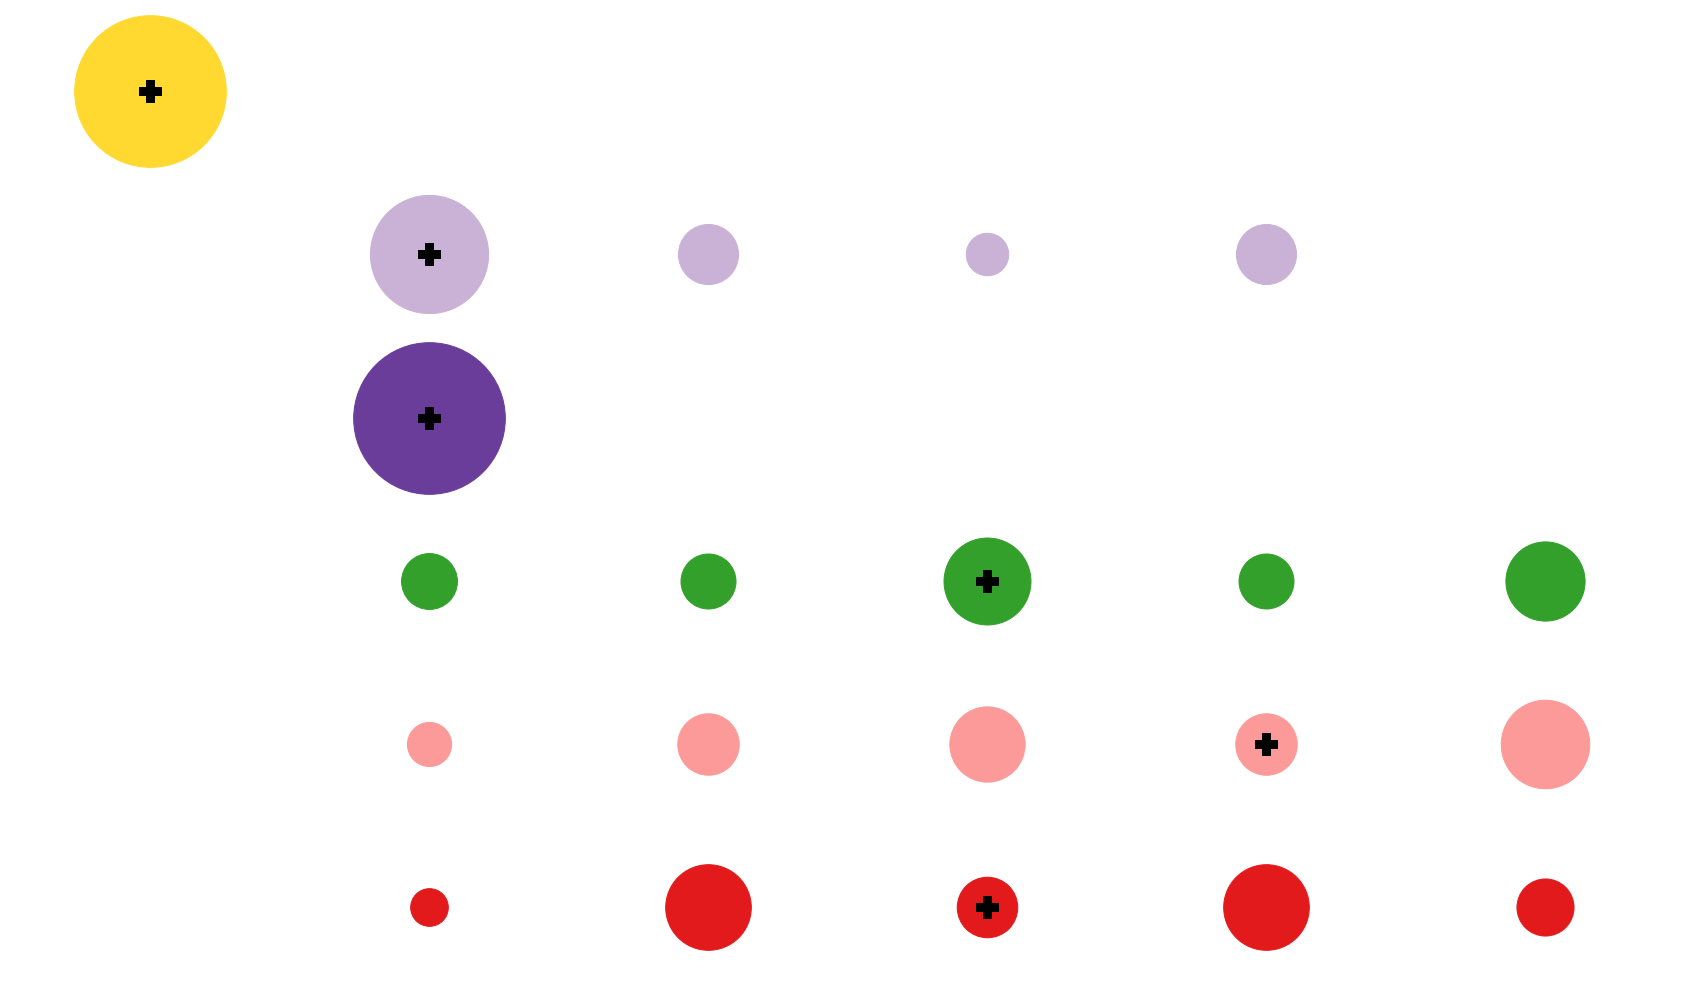

In [52]:
census = census_Lgr6_norm
groups = {'ctrl - IFE':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['ctrl - IFE','ctrl - IST'])].index,
          '5':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['5'])].index,
          '1':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['1'])].index,
          '4':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['4'])].index,
          '2':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['2'])].index,
          '0':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['0'])].index}
dict_time ={'0 d':0,
            '1 d':1,
            '4 d':2,
            '7 d':3,
            '10 d':4,
            '1 m+':5}
cmap = cmap_Lgr6_state

#initialize figure 

height = 3 * 6
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(6 - 0.5, -0.5)

#plot circles

for y, gr in enumerate(['ctrl - IFE','1','5', '4', '2', '0']):
    
    c_tmp = groups[gr]
    time_tmp = [dict_time[meta.ix['Days',c]] for c in c_tmp]
    val_tmp = []
    
    for x, t in enumerate(['0 d','1 d','4 d','7 d','10 d','1 m+']):
        ax.scatter(x, y, color = cmap[gr], s = census.ix[t,gr] * 23000)
        val_tmp += [dict_time[t]] * int(census.ix[t, gr] * 1000)
            
    ax.scatter(np.median(val_tmp), 
               y, color = 'black', marker = 'P', s = 500)

clean_axis(ax)

figname = 'v2.6_1_Lgr6_time_distr_3.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [693]:
cl_Lgr6_wnd_ctrl = loadData_v1(path_output, exp_id, 'cl_Lgr6_wnd_ctrl', 'Series')

In [706]:
census_Lgr6 = pd.DataFrame(index = ['0 d','1 d','4 d','7 d','10 d','1 m+'], 
                           columns = return_unique(cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl=='3']))

for gr in census_Lgr6.columns: 
    c_sel = cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl==gr].index
    for ix in census_Lgr6.index:
        census_Lgr6.ix[ix,gr] = Counter(cells_Lgr6_wnd_ctrl[c_sel])[ix]

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [718]:
census_Lgr6_norm = census_Lgr6.apply(lambda x: x / np.sum(x), axis = 0)

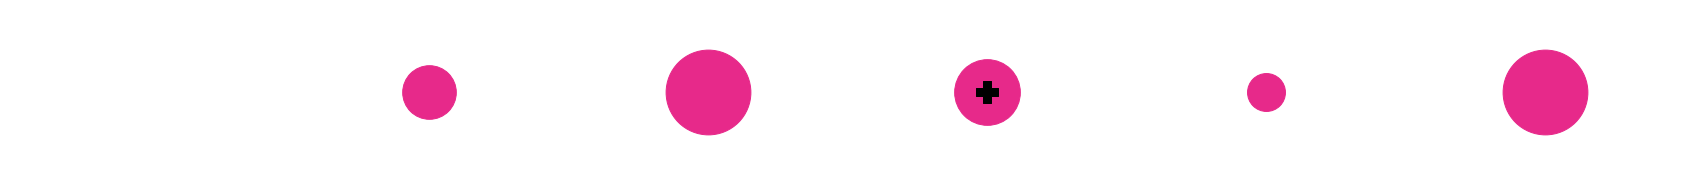

In [723]:
census = census_Lgr6_norm
groups = {'3':cl_Lgr6_wnd_ctrl_sel[cl_Lgr6_wnd_ctrl_sel.isin(['3'])].index}
dict_time ={'0 d':0,
            '1 d':1,
            '4 d':2,
            '7 d':3,
            '10 d':4,
            '1 m+':5}
cmap = cmap_Lgr6_state

#initialize figure 

height = 3 * 1
width = 30

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)
ax.set_xlim(-0.5, 5.5)
ax.set_ylim(1 - 0.5, -0.5)

#plot circles

for y, gr in enumerate(['3']):
    
    c_tmp = groups[gr]
    time_tmp = [dict_time[meta.ix['Days',c]] for c in c_tmp]
    val_tmp = []
    
    for x, t in enumerate(['0 d','1 d','4 d','7 d','10 d','1 m+']):
        ax.scatter(x, y, color = cmap[gr], s = census.ix[t,gr] * 23000)
        val_tmp += [dict_time[t]] * int(census.ix[t, gr] * 1000)
            
    ax.scatter(np.median(val_tmp), 
               y, color = 'black', marker = 'P', s = 500)

clean_axis(ax)

figname = 'v2.6_1_Lgr6_time_distr_uHF_3.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Define all genes upregulated in any wound state (Lgr5 or Lgr6)

In [107]:
genes_Lgr5 = NBR_states_Lgr5_pval_0d.min(axis=1)[NBR_states_Lgr5_pval_0d.min(axis=1)<0.001].index

In [109]:
len(genes_Lgr5)

833

In [108]:
genes_Lgr6 = NBR_states_Lgr6_pval_0d.min(axis=1)[NBR_states_Lgr6_pval_0d.min(axis=1)<0.001].index

In [110]:
len(genes_Lgr6)

1164

# Negative binominal regression of Lgr5 wound states

In [111]:
NBR_states_Lgr5_pval_0d_bin = neg_binom_get_binarized(NBR_states_Lgr5_pval_0d, 0.001)

In [112]:
NBR_states_Lgr5_pval_0d_bin.sum()

Lgr5 - 4    322
Lgr5 - 3     85
Lgr5 - 1    122
Lgr5 - 2    411
Lgr5 - 0    307
dtype: int64

In [113]:
NBR_states_Lgr5_pval_0d_dist = neg_binom_get_distances(NBR_states_summary, NBR_states_Lgr5_pval_0d_bin, 'Lgr5 - ctrl')

In [114]:
NBR_states_Lgr5_pval_0d_fc = neg_binom_get_fold_change(NBR_states_summary, NBR_states_Lgr5_pval_0d_bin, 'Lgr5 - ctrl')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/simjoo/anaco

In [115]:
genes_0d_Lgr5 = neg_binom_extract_genes_v2(NBR_states_Lgr5_pval_0d_dist, 'P5', number = 20)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


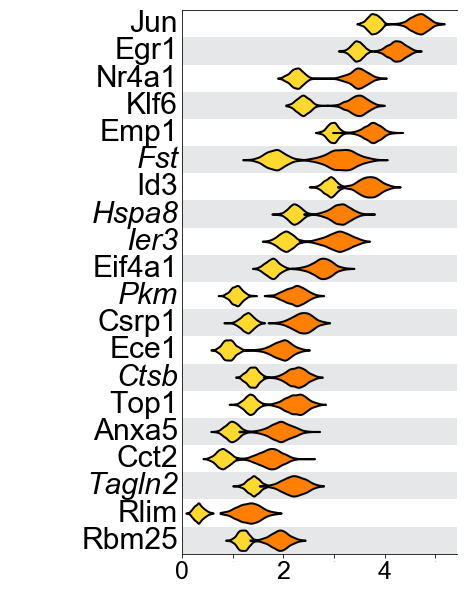

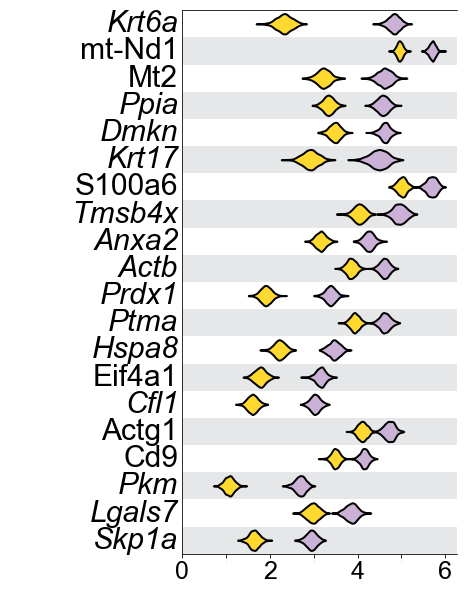

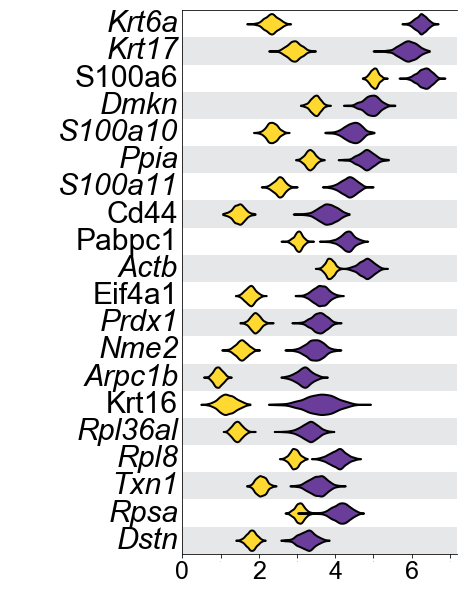

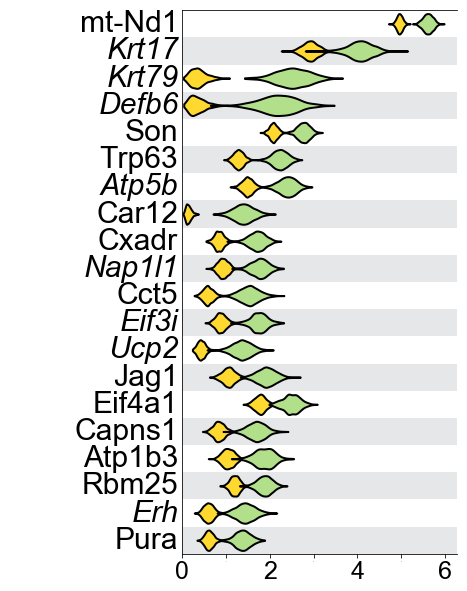

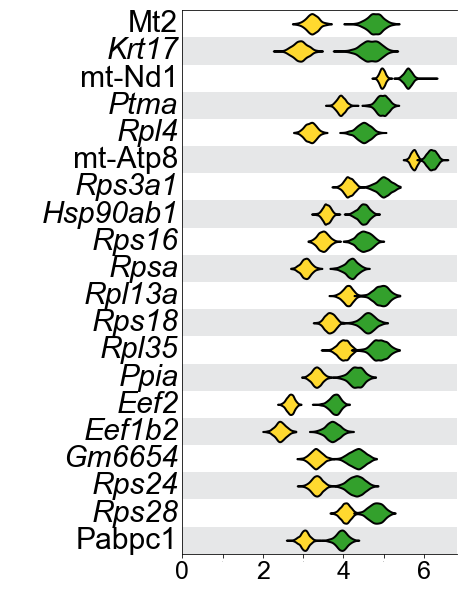

In [116]:
for gr_ in ['Lgr5 - 3', 'Lgr5 - 2', 'Lgr5 - 0', 'Lgr5 - 1', 'Lgr5 - 4']:
    
    #define input variables

    genes = genes_0d_Lgr5[gr_]
    L = len(genes)
    traces = NBR_states_traces
    groups = ['Lgr5 - ctrl',gr_]
    cmap = cmap_Lgr5_state

    #initialize figure

    height = 0.5 * len(genes)
    width = 8
    plt.figure(facecolor = 'w', figsize = (width, height))
    gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

    #create gene name axis 

    ax0 = plt.subplot(gs[0,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)

    #create violin plot axis

    ax1 = plt.subplot(gs[0,1])
    ax1.spines['right'].set_color('none')
    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])

    #iterate over genes

    for ix, g in enumerate(genes):

        #print gene name

        if g in genes_Lgr6:
            ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', style='italic')
        else:
            ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')

        #print background

        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
        elif ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)

        #iterate over groups

        for gr in groups:

            #print group traces

            violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr)]],
                           positions = [ix],
                           vert=False,
                           showextrema=False, 
                            widths=0.75)

            for v in violin['bodies']:
                v.set_edgecolor('black')
                v.set_facecolor(cmap[str(gr)])
                v.set_linewidth(2.0)
                v.set_alpha(1.0)

    ax1.set_xlim(left = 0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Arial')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
    figname = 'v2.6_S2_Lgr5_NBR_state_%s.pdf' % gr_
    plt.savefig('%s/%s' % (path_figures, figname), 
                format = 'pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0, 
                rasterized = True)

# Negative binominal regression of Lgr6 wound states

In [117]:
NBR_states_Lgr6_pval_0d_bin = neg_binom_get_binarized(NBR_states_Lgr6_pval_0d, 0.001)

In [118]:
NBR_states_Lgr6_pval_0d_bin.sum()

Lgr6 - 5             354
Lgr6 - 3             234
Lgr6 - 0             406
Lgr6 - 2             389
Lgr6 - 1             537
Lgr6 - 4             224
Lgr6 - ctrl - IST     37
dtype: int64

In [119]:
NBR_states_Lgr6_pval_0d_dist = neg_binom_get_distances(NBR_states_summary, NBR_states_Lgr6_pval_0d_bin, 'Lgr6 - ctrl - IFE')

In [120]:
NBR_states_Lgr6_pval_0d_fc = neg_binom_get_fold_change(NBR_states_summary, NBR_states_Lgr6_pval_0d_bin, 'Lgr6 - ctrl - IFE')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/simjoo/anaco

In [121]:
genes_0d_Lgr6 = neg_binom_extract_genes_v2(NBR_states_Lgr6_pval_0d_dist, 'P5', number = 15)

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


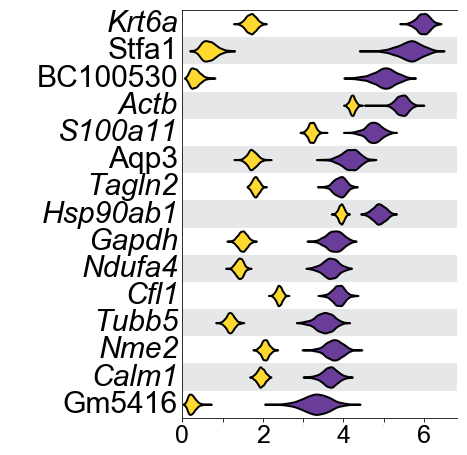

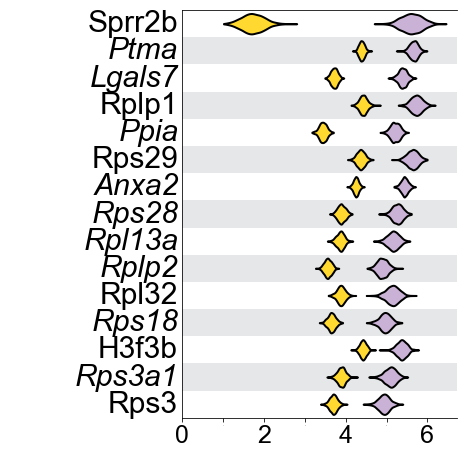

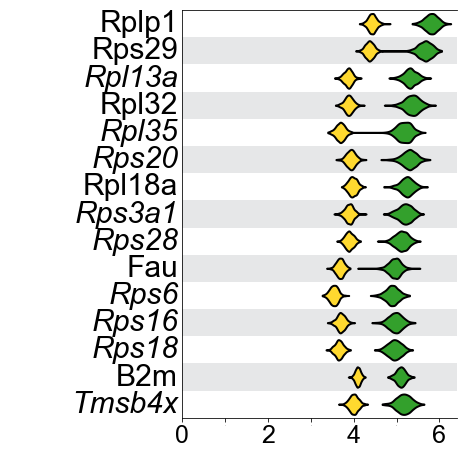

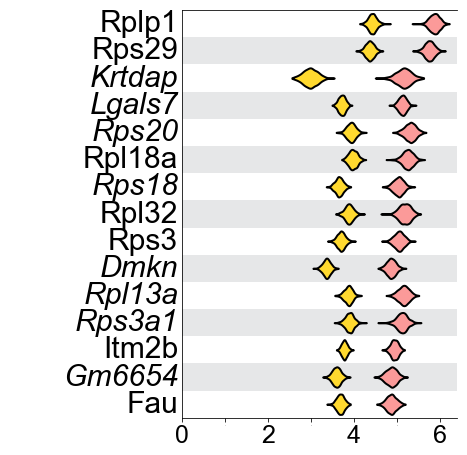

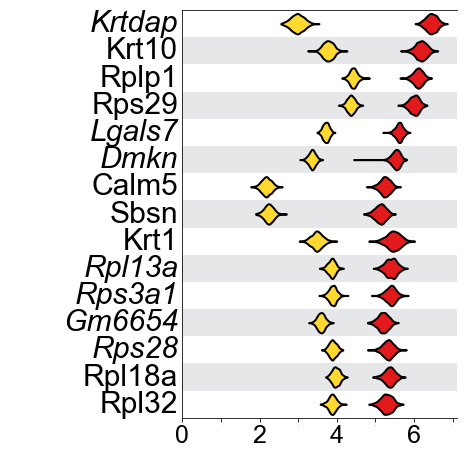

In [122]:
for gr_ in ['Lgr6 - 5', 'Lgr6 - 1', 'Lgr6 - 4', 'Lgr6 - 2', 'Lgr6 - 0']:
    
    #define input variables

    genes = genes_0d_Lgr6[gr_]
    L = len(genes)
    traces = NBR_states_traces
    groups = ['Lgr6 - ctrl - IFE',gr_]
    cmap = cmap_Lgr6_state

    #initialize figure

    height = 0.5 * len(genes)
    width = 8
    plt.figure(facecolor = 'w', figsize = (width, height))
    gs = plt.GridSpec(1, 2, hspace = 0.15, wspace = 0.0, width_ratios = [5,8])

    #create gene name axis 

    ax0 = plt.subplot(gs[0,0])
    ax0.set_ylim(L - 0.5, -0.5)
    clean_axis(ax0)

    #create violin plot axis

    ax1 = plt.subplot(gs[0,1])
    ax1.spines['right'].set_color('none')
    ax1.set_ylim(L - 0.5, -0.5)
    ax1.yaxis.set_ticks_position('left')
    ax1.yaxis.set_ticks([])

    #iterate over genes

    for ix, g in enumerate(genes):

        #print gene name

        if g in genes_Lgr5:
            ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center', style='italic')
        else:
            ax0.text(0.975, ix, g, family = 'Arial', fontsize = 30, ha = 'right', va = 'center')

        #print background

        if ix % 2 == 0:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#FFFFFF', zorder = 0)        
        elif ix % 2 == 1:
            ax1.axhspan(ix - 0.5, ix * 3 + 3.5, color = '#E6E7E8', zorder = 0)

        #iterate over groups

        for gr in groups:

            #print group traces

            violin = ax1.violinplot([np.log2(x) for x in traces.ix[g, str(gr)]],
                           positions = [ix],
                           vert=False,
                           showextrema=False, 
                            widths=0.75)

            for v in violin['bodies']:
                v.set_edgecolor('black')
                v.set_facecolor(cmap[str(gr)])
                v.set_linewidth(2.0)
                v.set_alpha(1.0)

    ax1.set_xlim(left = 0)

    for ix, t in enumerate(ax1.xaxis.get_ticklabels()):
        if ix % 2 == 0:
            t.set_family('Arial')
            t.set_fontsize(25)
        else:
            t.set_fontsize(0)
            
    figname = 'v2.6_S2_Lgr6_NBR_state_%s.pdf' % gr_
    plt.savefig('%s/%s' % (path_figures, figname), 
                format = 'pdf', 
                transparent = True, 
                bbox_inches = 'tight', 
                pad_inches = 0, 
                rasterized = True)

# Correlation distances - Cells

In [614]:
seq_sel_Lgr5_wnd = loadData_v1(path_output, exp_id, 'seq_sel_Lgr5_wnd', 'DataFrame')

In [47]:
seq_sel_Lgr6_wnd = loadData_v1(path_output, exp_id, 'seq_sel_Lgr6_wnd', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


## Lgr5

In [619]:
seq_sel_Lgr5_pca, dist_Lgr5_pca = dist_mat_dim_reduc_v2(seq_sel_Lgr5_wnd, dim=4, method='NMF', distance = 'euclidean')

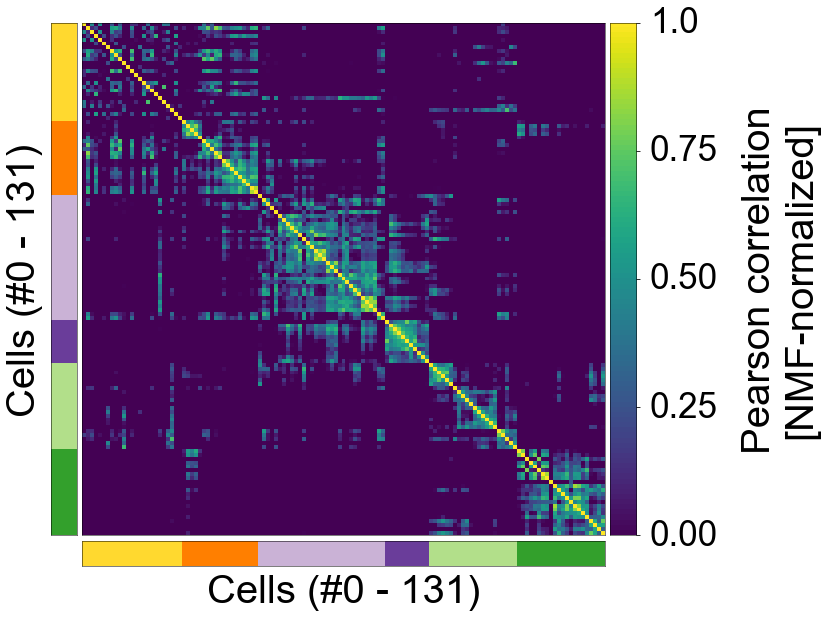

In [624]:
data = dist_Lgr5_pca
cells = cl_Lgr5_wnd_ctrl_sel
vmin,vmax = 0.0, 1.0
cmap1 = plt.cm.viridis_r
cmap2 = cmap_Lgr5_state

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (10.5, 10))
gs = plt.GridSpec(nrows = 2, ncols = 3, wspace=0.03, hspace=0.02, width_ratios=[0.5 , 10, 0.5], height_ratios=[10, 0.5])

#plot heatmap

axHM = plt.subplot(gs[0, 1])

axHM.matshow(data.ix[cells.index,cells.index], cmap = cmap1, aspect = 'auto', 
             vmin = vmin, vmax = vmax, interpolation = 'nearest')
    
axHM.set_xlabel('Cells (#0 - %s)' % len(cells), family = 'Arial', fontsize = 40)
axHM.set_ylabel('Cells (#0 - %s)' % len(cells), family = 'Arial', fontsize = 40)

axHM.xaxis.set_label_coords(0.5, -0.075)
axHM.yaxis.set_label_coords(-0.075, 0.5)
    
axHM.set_yticks([])

remove_ticks(axHM)

#plot left sample groups

axSG1 = plt.subplot(gs[0, 0])

axSG1.set_ylim(len(cells), 0)

for pos, gr in enumerate(cells):
    axSG1.axhspan(pos, pos+1, color=cmap2[gr])
    
remove_ticks(axSG1)

#plot bottom sample groups

axSG2 = plt.subplot(gs[1, 1])

axSG2.set_xlim(0, len(cells))

for pos, gr in enumerate(cells):
    axSG2.axvspan(pos, pos+1, color=cmap2[gr])

remove_ticks(axSG2)

#plot label

axLabel = plt.subplot(gs[0,2])

axLabel.matshow(np.matrix(np.arange(0, 1, 0.01)).T,
                cmap = cmap1, aspect = 'auto', vmin = vmin, vmax = vmax)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

remove_ticks(axLabel)

axLabel.set_yticks(np.linspace(axLabel.get_ylim()[0], axLabel.get_ylim()[1], 5))
axLabel.set_yticklabels(['0.00','0.25','0.50','0.75','1.0'], family = 'Arial', fontsize = 35, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.set_ylabel('Pearson correlation\n[NMF-normalized]', family = 'Arial', fontsize = 40)
axLabel.yaxis.set_label_coords(8, 0.5)

figname = 'v2.6_S2_Lgr5_cell_dist.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Lgr6

In [48]:
seq_sel_Lgr6_wnd_pca, dist_Lgr6_pca = dist_mat_dim_reduc_v2(seq_sel_Lgr6_wnd, dim=5, method='NMF', distance = 'euclidean')

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


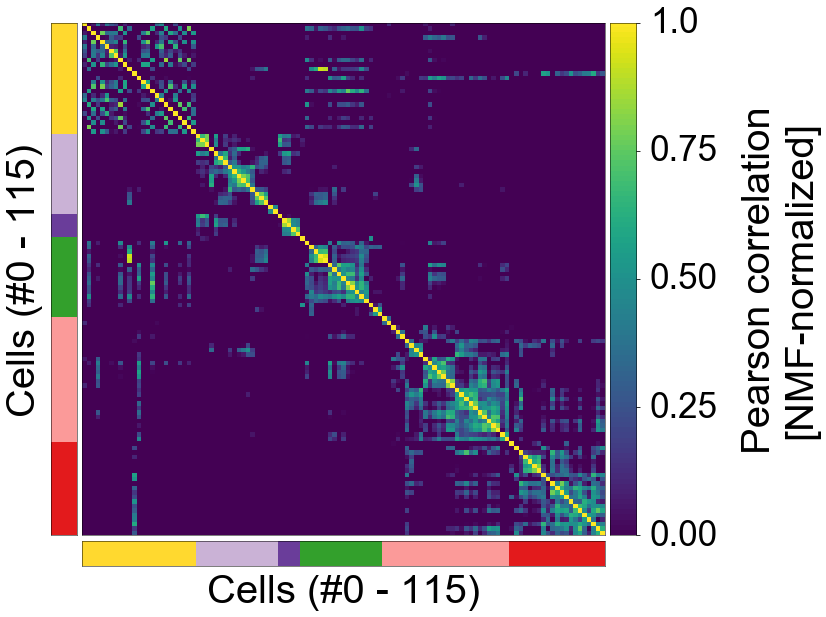

In [49]:
data = dist_Lgr6_pca
cells = cl_Lgr6_wnd_ctrl_sel[~cl_Lgr6_wnd_ctrl_sel.isin(['3','ctrl - IST'])]
vmin,vmax = 0, 1
cmap1 = plt.cm.viridis_r
cmap2 = cmap_Lgr6_state

#generate figure

fig = plt.figure(facecolor = 'w', figsize = (10.5, 10))
gs = plt.GridSpec(nrows = 2, ncols = 3, wspace=0.03, hspace=0.02, width_ratios=[0.5 , 10, 0.5], height_ratios=[10, 0.5])

#plot heatmap

axHM = plt.subplot(gs[0, 1])

axHM.matshow(data.ix[cells.index,cells.index], cmap = cmap1, aspect = 'auto', 
             vmin = vmin, vmax = vmax, interpolation = 'nearest')
    
axHM.set_xlabel('Cells (#0 - %s)' % len(cells), family = 'Arial', fontsize = 40)
axHM.set_ylabel('Cells (#0 - %s)' % len(cells), family = 'Arial', fontsize = 40)

axHM.xaxis.set_label_coords(0.5, -0.075)
axHM.yaxis.set_label_coords(-0.075, 0.5)
    
axHM.set_yticks([])

remove_ticks(axHM)

#plot left sample groups

axSG1 = plt.subplot(gs[0, 0])

axSG1.set_ylim(len(cells), 0)

for pos, gr in enumerate(cells):
    axSG1.axhspan(pos, pos+1, color=cmap2[gr])
    
remove_ticks(axSG1)

#plot bottom sample groups

axSG2 = plt.subplot(gs[1, 1])

axSG2.set_xlim(0, len(cells))

for pos, gr in enumerate(cells):
    axSG2.axvspan(pos, pos+1, color=cmap2[gr])

remove_ticks(axSG2)

#plot label

axLabel = plt.subplot(gs[0,2])

axLabel.matshow(np.matrix(np.arange(0, 1, 0.01)).T,
                cmap = cmap1, aspect = 'auto', vmin = vmin, vmax = vmax)

axLabel.xaxis.set_ticks([])
axLabel.yaxis.set_ticks_position('right')

remove_ticks(axLabel)

axLabel.set_yticks(np.linspace(axLabel.get_ylim()[0], axLabel.get_ylim()[1], 5))
axLabel.set_yticklabels(['0.00','0.25','0.50','0.75','1.0'], family = 'Arial', fontsize = 35, va = 'center')
axLabel.tick_params(axis='y', which='major', pad=10)

axLabel.set_ylabel('Pearson correlation\n[NMF-normalized]', family = 'Arial', fontsize = 40)
axLabel.yaxis.set_label_coords(8, 0.5)

figname = 'v2.6_S2_Lgr6_cell_dist.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Replication

In [627]:
len(cells_Lgr5_wnd)

106

In [628]:
len(cells_Lgr6_wnd)

106

In [629]:
for gr in return_unique(cl_Lgr5_wnd_ctrl):
    c_sel = cl_Lgr5_wnd_ctrl[cl_Lgr5_wnd_ctrl==gr].index
    print(gr, len(c_sel), len(set(meta.ix['Mouse_ID',c_sel])))

ctrl 96 1
3 19 5
2 32 3
0 11 5
1 22 5
4 22 5


/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [630]:
for gr in return_unique(cl_Lgr6_wnd_ctrl):
    c_sel = cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl==gr].index
    print(gr, len(c_sel), len(set(meta.ix['Mouse_ID',c_sel])))

ctrl - IFE 130 1
ctrl - IST 24 1
5 5 1
1 18 4
4 18 5
2 28 5
0 21 5


In [631]:
for gr in return_unique(cl_Lgr5_wnd_ctrl):
    c_sel = cl_Lgr5_wnd_ctrl[cl_Lgr5_wnd_ctrl==gr].index
    print(gr, len(c_sel), Counter(meta.ix['Days',c_sel]))

ctrl 96 Counter({'0 d': 96})
3 19 Counter({'1 d': 12, '10 d': 3, '7 d': 3, '4 d': 1})
2 32 Counter({'1 d': 31, '4 d': 1})
0 11 Counter({'1 d': 8, '4 d': 1, '10 d': 1, '7 d': 1})
1 22 Counter({'7 d': 7, '10 d': 7, '1 d': 5, '4 d': 3})
4 22 Counter({'7 d': 7, '10 d': 6, '4 d': 5, '1 d': 4})


In [632]:
for gr in return_unique(cl_Lgr6_wnd_ctrl):
    c_sel = cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl==gr].index
    print(gr, len(c_sel), Counter(meta.ix['Days',c_sel]))

ctrl - IFE 130 Counter({'0 d': 130})
ctrl - IST 24 Counter({'0 d': 24})
5 5 Counter({'1 d': 5})
1 18 Counter({'1 d': 15, '10 d': 1, '7 d': 1, '4 d': 1})
4 18 Counter({'1 m+': 7, '7 d': 5, '1 d': 4, '4 d': 1, '10 d': 1})
2 28 Counter({'1 m+': 14, '7 d': 6, '1 d': 4, '4 d': 2, '10 d': 2})
0 21 Counter({'1 m+': 6, '7 d': 4, '4 d': 4, '10 d': 4, '1 d': 3})


# BIC score for time points and cells states

### Lgr5

In [634]:
seq_sel_Lgr5_wnd = loadData_v1(path_output, exp_id, 'seq_sel_Lgr5_wnd', 'DataFrame')

In [637]:
seq_sel_Lgr5_nmf, dist_Lgr5_nmf = dist_mat_dim_reduc_v2(seq_sel_Lgr5_wnd, dim=4, method='NMF', distance = 'euclidean')

In [639]:
BIC_time_Lgr5 = calculateIC_v2P(seq_sel_Lgr5_nmf, 
                           cells_Lgr5_wnd, 
                           0, 'BIC')

In [640]:
BIC_state_Lgr5 = calculateIC_v2P(seq_sel_Lgr5_nmf, 
                           cl_Lgr5_wnd, 
                           0, 'BIC')

In [641]:
print(BIC_time_Lgr5, BIC_state_Lgr5)

-106.792445956 -183.316818487


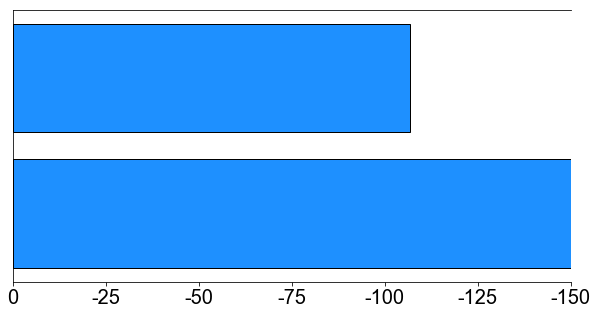

In [642]:
data = [BIC_time_Lgr5, BIC_state_Lgr5]

#initialize figure 

height = 5
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)

#define ticks

ax.set_ylim(1.5,-0.5, )
ax.set_yticks([])
#ax.set_xticklabels(['time\npoints','cell\nstates'], family = 'Arial', fontsize = 30)

ax.set_xlim(0,-150)
ax.set_xticks([0, -25, -50, -75, -100, -125, -150])
ax.set_xticklabels([0, -25, -50, -75, -100, -125, -150], family = 'Arial', fontsize = 20)

ax.spines['right'].set_color('none')

#plot data

ax.barh(range(2), data, color = 'dodgerblue', linewidth = 1, edgecolor = 'black')

figname = 'v2.6_S2_Lgr5_BIC.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Lgr6

In [643]:
seq_sel_Lgr6_wnd = loadData_v1(path_output, exp_id, 'seq_sel_Lgr6_wnd', 'DataFrame')

In [648]:
seq_sel_Lgr6_nmf, dist_Lgr6_pca = dist_mat_dim_reduc_v2(seq_sel_Lgr6_wnd, dim=5, method='NMF', distance = 'euclidean')

In [649]:
BIC_time_Lgr6 = calculateIC_v2P(seq_sel_Lgr6_nmf, 
                           cells_Lgr6_wnd, 
                           0, 'BIC')

In [650]:
BIC_state_Lgr6 = calculateIC_v2P(seq_sel_Lgr6_nmf, 
                           cl_Lgr6_wnd, 
                           0, 'BIC')

In [651]:
BIC_time_Lgr6

-67.30672898345864

In [652]:
BIC_state_Lgr6

-147.56096224633433

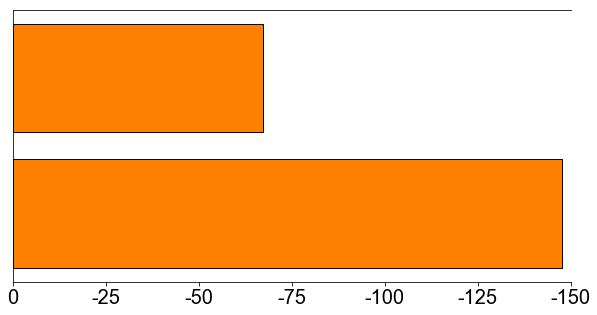

In [653]:
data = [BIC_time_Lgr6, BIC_state_Lgr6]

#initialize figure 

height = 5
width = 10

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define axis

ax = plt.subplot(111)

#define ticks

ax.set_ylim(1.5,-0.5)
ax.set_yticks([])
#ax.set_xticklabels(['time\npoints','cell\nstates'], family = 'Arial', fontsize = 30)

ax.set_xlim(0,-150)
ax.set_xticks([0, -25, -50, -75, -100, -125, -150])
ax.set_xticklabels([0, -25, -50, -75, -100, -125, -150], family = 'Arial', fontsize = 20)

ax.spines['right'].set_color('none')

#plot data

ax.barh(range(2), data, color = '#ff7f00', linewidth = 1, edgecolor = 'black')

figname = 'v2.6_S2_Lgr6_BIC.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Map Lgr5 and Lgr6 control cells to basal cells tSNE

### Import data

In [192]:
seq_wnd = loadData_v1(path_input, exp_id, 'seq_WND', 'DataFrame')
seq_epi = loadData_v1(path_input, '201509151726', 'seq', 'DataFrame')
tsne_basal = loadData_v1(path_input, '201509151726', 'tsne_basal', 'DataFrame')
c_groups_basal = loadData_v1(path_input, '201509151726', 'c_groups_basal', 'Series')
tsne_features = open('%s/201509151726_tsne_features.txt' % path_input, 'r').read().split()

In [217]:
c_groups_basal = c_groups_basal[c_groups_basal!=7]

In [62]:
Counter(c_groups_basal)

Counter({0: 127, 1: 82, 2: 62, 3: 86, 4: 93, 5: 167, 6: 56})

In [63]:
c_ctrl = pd.Series()

for c in cl_Lgr5_wnd_ctrl[cl_Lgr5_wnd_ctrl=='ctrl'].index: c_ctrl[c] = 'Lgr5 - ctrl'
for c in cl_Lgr6_wnd_ctrl[cl_Lgr6_wnd_ctrl=='ctrl - IFE'].index: c_ctrl[c] = 'Lgr6 - ctrl'

In [64]:
Counter(c_ctrl)

Counter({'Lgr5 - ctrl': 96, 'Lgr6 - ctrl': 130})

In [65]:
c_sel = list(c_groups_basal.index) + list(c_ctrl.index)

In [66]:
len(c_sel)

899

### Merge telogen and wound datasets

In [67]:
genes_comb = [g for g in seq_wnd.index if g in seq_epi.index]

In [68]:
len(genes_comb)

24443

In [69]:
seq_wnd_telogen = pd.concat([seq_wnd.ix[genes_comb, c_ctrl.index], seq_epi.ix[genes_comb, c_groups_basal.index]], axis = 1)

In [70]:
tmp = pd.Series(index = c_sel)
tmp[c_groups_basal.index] = 0
tmp[c_ctrl.index] = 1

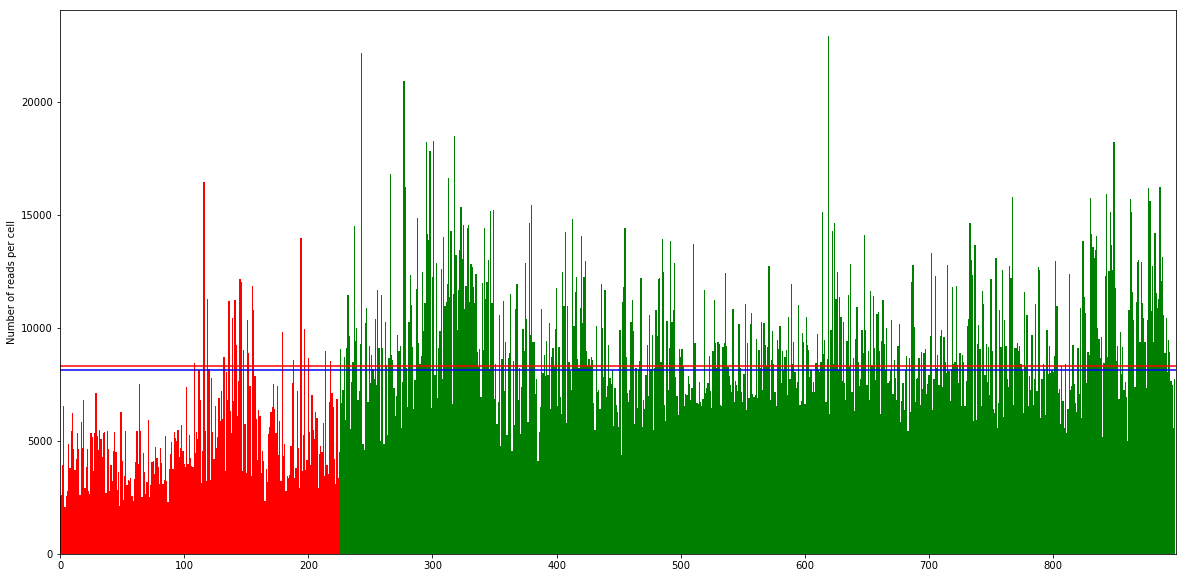

In [71]:
draw_barplots_QC(seq_wnd_telogen,'reads',tmp,{0:'green',1:'red'})

In [115]:
sf = seq_wnd_telogen.sum() / seq_wnd_telogen.sum().mean()

In [116]:
seq_wnd_telogen_norm = seq_wnd_telogen / sf

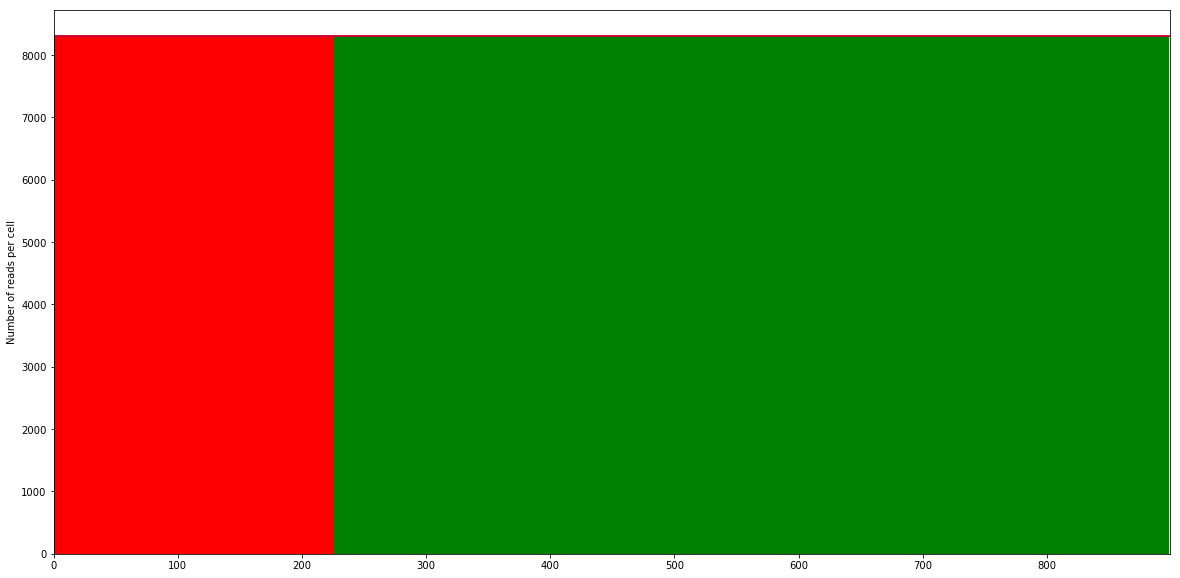

In [117]:
draw_barplots_QC(seq_wnd_telogen_norm,'reads',tmp,{0:'green',1:'red'})

### Select features


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.2, 4478 genes remain
Optimization terminated successfully.
         Current function value: 1025.018575
         Iterations: 33
         Function evaluations: 64

After high variance feature selection, 2500 genes remain

Calculating binary logarithm of x + 1


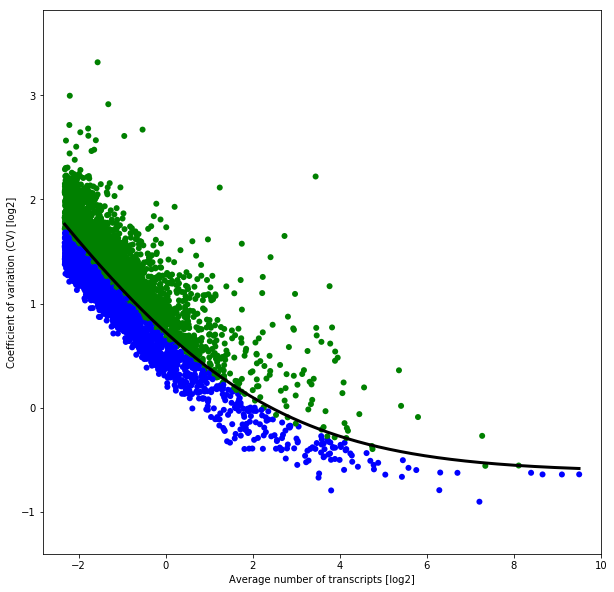

In [120]:
seq_wnd_telogen_norm_sel = select_features_v3(seq_wnd_telogen_norm, 0.2, 2500, path_input, return_all=False, drop_spikes = False, drop_markers = False)

### Train logit classifier

In [35]:
from sklearn.linear_model import LogisticRegressionCV

In [139]:
LR = LogisticRegressionCV(Cs=20, 
                          fit_intercept=True, 
                          cv=10, dual=False, 
                          penalty='l1',
                          scoring=None, 
                          solver='liblinear', 
                          tol=0.0001, 
                          max_iter=1000, 
                          class_weight=None, 
                          n_jobs=1, verbose=0, 
                          refit=True, 
                          intercept_scaling=1.0, 
                          multi_class='ovr',
                          random_state=None)

In [140]:
LR.fit(seq_wnd_telogen_norm_sel[c_groups_basal.index].T, c_groups_basal)

LogisticRegressionCV(Cs=20, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

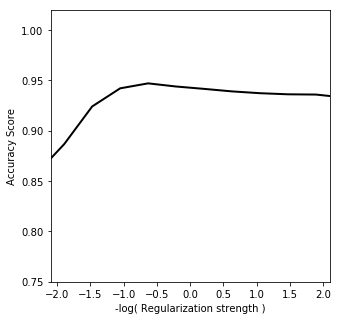

In [141]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('-log( Regularization strength )')
ax.set_xlim(-2.1,2.1)
ax.set_ylim(0.75,1.02)

ax.plot(np.log10(LR.Cs_), np.mean([LR.scores_[i].mean(0) for i in return_unique(c_groups_basal)],0), c='k', lw=2 )


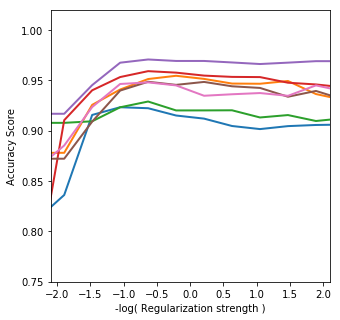

In [153]:
plt.figure(figsize=(5,5))
ax = plt.subplot(111)

ax.set_ylabel('Accuracy Score')
ax.set_xlabel('-log( Regularization strength )')
ax.set_xlim(-2.1,2.1)
ax.set_ylim(0.75,1.02)

for i in return_unique(c_groups_basal):

    ax.plot(np.log10(LR.Cs_), LR.scores_[i].mean(0), lw=2)

In [173]:
logit_WND_ctrl = pd.DataFrame(columns = c_ctrl.index, 
                              index = ['predict'] + ['proba - %s' % i for i in return_unique(c_groups_basal)])
                              
logit_WND_ctrl.loc['predict'] = LR.predict(seq_wnd_telogen_norm_sel[c_ctrl.index].T)

for i, c in enumerate(c_ctrl.index):
    logit_WND_ctrl.loc[1:, c] = LR.predict_proba(seq_wnd_telogen_norm_sel[c_ctrl.index].T)[i]


In [250]:
logit_WND_ctrl_max = logit_WND_ctrl['proba - 0':].max()

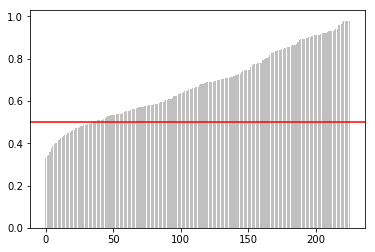

In [251]:
plt.bar(range(len(c_ctrl.index)), logit_WND_ctrl_max.sort_values(), color = 'silver')
plt.axhline(0.5, c = 'r')

### Get cell-cell distance

In [433]:
data = log2Transform(seq_wnd_telogen_norm).apply(lambda x: x - np.mean(x), axis = 1)
c_ref = c_groups_basal.index
c_test = c_ctrl.index
genes_sel = [g for g in tsne_features if g in data.index]

dist_corr = pd.DataFrame(index = c_test, columns = c_ref)

for c_ix in c_test:
    for c_col in c_ref:
        dist_corr.loc[c_ix, c_col] = 1 - scipy.spatial.distance.correlation(data.loc[genes_sel, c_ix], 
                                                                        data.loc[genes_sel, c_col])


Calculating binary logarithm of x + 1


### Get kNN

In [434]:
k = 5
c_ref = c_groups_basal
c_test = c_ctrl
dist = dist_corr
logit = logit_WND_ctrl

kNN = {}

for c in c_test.index:
    c_ref_sel = c_ref[c_ref==logit.loc['predict',c]].index
    kNN[c] = dist.loc[c,c_ref_sel].sort_values()[-k:].index

### Get weighted center position

In [435]:
tsne_test = pd.DataFrame(index = c_ctrl.index, 
                         columns = ['x','y'])

for c in c_ctrl.index:
    NN = kNN[c]
    tsne_test.loc[c,'x'] = tsne_basal.loc[NN, 'x'].mean()
    tsne_test.loc[c,'y'] = tsne_basal.loc[NN, 'y'].mean()

### Plot tSNE

In [245]:
cmap_basal = {1:'#b2df8a',
              0:'#33a02c',
              2:'#8dd3c7',
              3:'#cab2d6',
              4:'#6a3d9a',
              6:'#a6cee3',
              5:'#1f78b4'}

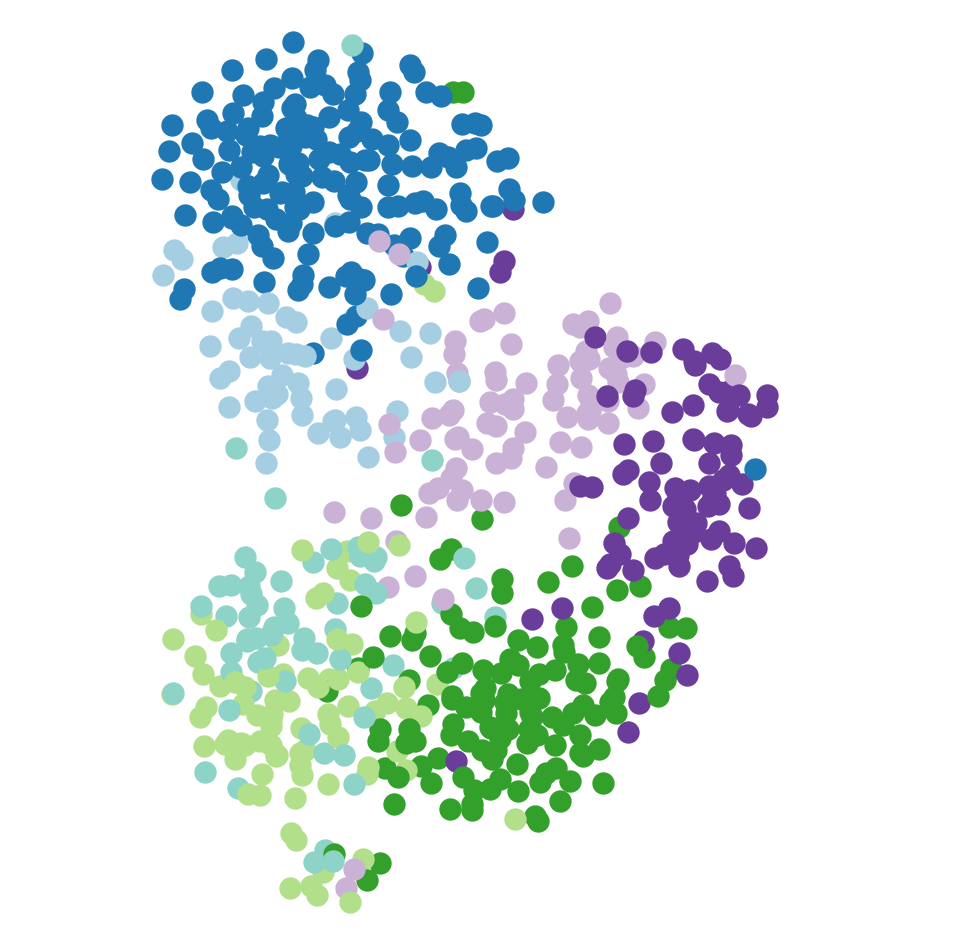

In [550]:
tsne = tsne_basal
cells = c_groups_basal
cmap = cmap_basal


#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:

    ax1.scatter(tsne.ix[ix,'x'],
                tsne.ix[ix,'y'], 
                s = 500,
                linewidth = 0.0,
                c = cmap[cells[ix]],
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_tSNE_basal.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Get NN and tSNE coordinates (based on GLM)

In [549]:
from numpy import zeros, arange, sqrt, random, r_, newaxis, any, arctan, pi, argsort, in1d, array
from scipy.spatial.distance import cdist

In [445]:
tsnedf = tsne_basal
tsnedf = tsnedf.ix[df_ref_log.columns,:]
tcs = tsnedf.values

In [446]:
ddd = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7}

In [447]:
df_lgr5_log = seq_wnd_telogen_norm_sel[c_ctrl.index]
df_ref_log = seq_wnd_telogen_norm_sel[c_groups_basal.index]

In [452]:
df_ref_cent = df_ref_log.subtract(df_ref_log.mean(1), 'rows')#.divide( df_log.std(1), 'rows')
df_lgr5_cent = df_lgr5_log.subtract(df_lgr5_log.mean(1), 'rows')#.divide( df_lgr5_log.std(1), 'rows')

In [448]:
cefcelltypes = c_groups_basal.values.flat[:]

Counter( cefcelltypes )

Counter({0: 127, 1: 82, 2: 62, 3: 86, 4: 93, 5: 167, 6: 56})

In [449]:
classes_names, classes_index = np.unique(cefcelltypes, return_inverse=True, return_counts=False)

In [450]:
train_index = classes_index

In [526]:
probs = LR.predict_proba(df_lgr5_log.values.T)
thrs_p = 0.5
bool1 = np.sum( probs > thrs_p,1) >0
rank_clusters = argsort(argsort( probs ,1),1)
bool_top3 = (rank_clusters >= len(classes_names)-2) & (probs > 0.2)

In [527]:
nn = []
for i in range(df_lgr5_log.shape[1]):
    if bool1[i]:
        selected_dev = in1d(array([ddd[k] for k in cefcelltypes]), classes_names[bool_top3[i,:]])
        distances = cdist(df_lgr5_cent.ix[:,i:i+1].T, df_ref_cent.ix[:,selected_dev].T, metric='correlation')
        top_n = argsort( distances[0,:] )[:5]
        xi = arange(df_ref_log.shape[1])[selected_dev][top_n]
        ws = probs[i,train_index[xi]][:,newaxis]
        nn.append( (tcs[xi,:]*ws).sum(0)/sum(ws) )
    else:
        nn.append([np.NAN,np.NAN])
        
nn = array(nn)

In [528]:
tsne_NN = pd.DataFrame(nn, columns = ['x','y'], index = df_lgr5_log.columns)

### Project Lgr5 cells on tSNE

In [529]:
c_sel_Lgr5 = c_ctrl[c_ctrl=='Lgr5 - ctrl'].index

In [530]:
len(c_sel_Lgr5)

96

In [531]:
c_sel_Lgr5 = [c for c in c_sel_Lgr5 if not np.any(np.isnan(tsne_NN.loc[c]))]

In [532]:
len(c_sel_Lgr5)

86

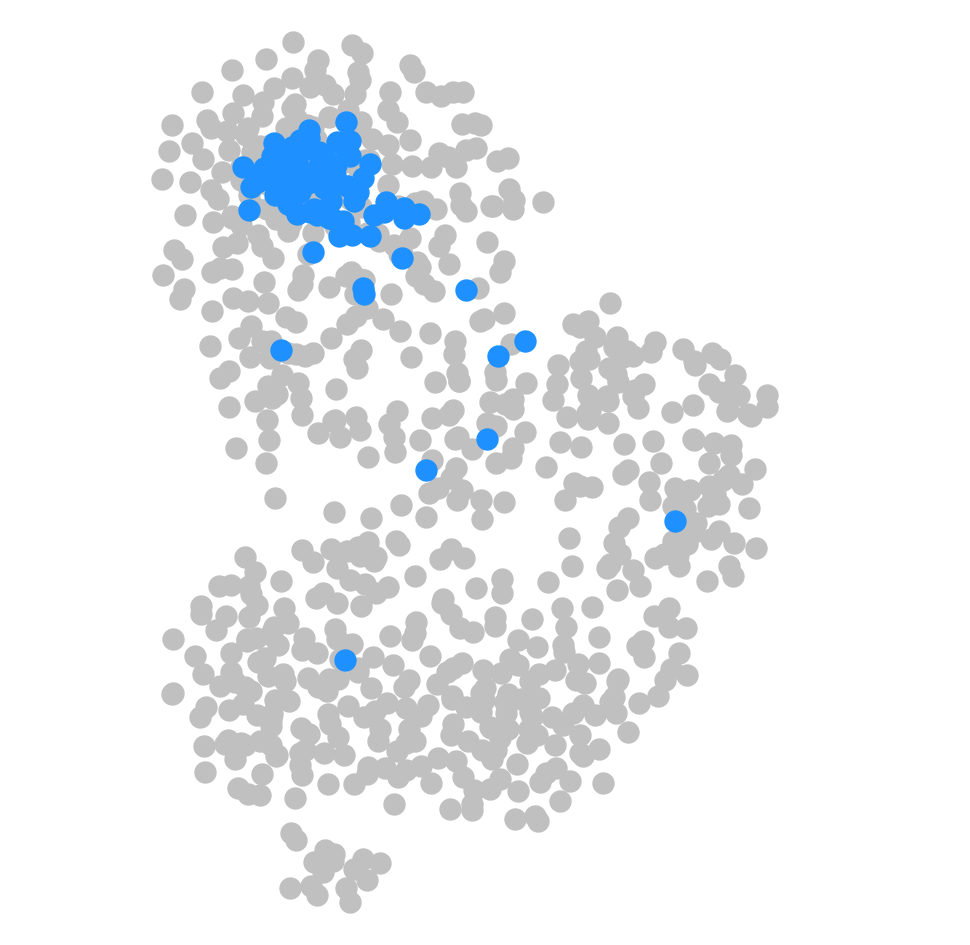

In [551]:
tsne1 = tsne_basal
tsne2 = tsne_NN
cells = c_groups_basal
cmap = cmap_basal

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne1.index:

    ax1.scatter(tsne1.ix[ix,'x'],
                tsne1.ix[ix,'y'], 
                s = 500,
                linewidth = 0.0,
                c = 'silver',
                edgecolor='black', 
                marker = 'o')
    
for ix in c_sel_Lgr5:

    ax1.scatter(tsne2.ix[ix,'x'],
                tsne2.ix[ix,'y'], 
                s = 500,
                linewidth = 0.0,
                c = 'dodgerblue',
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_tSNE_basal_Lgr5.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

### Project Lgr6 cells on tSNE

In [534]:
c_sel_Lgr6 = c_ctrl[c_ctrl=='Lgr6 - ctrl'].index

In [535]:
len(c_sel_Lgr6)

130

In [536]:
c_sel_Lgr6 = [c for c in c_sel_Lgr6 if not np.any(np.isnan(tsne_NN.loc[c]))]

In [537]:
len(c_sel_Lgr6)

105

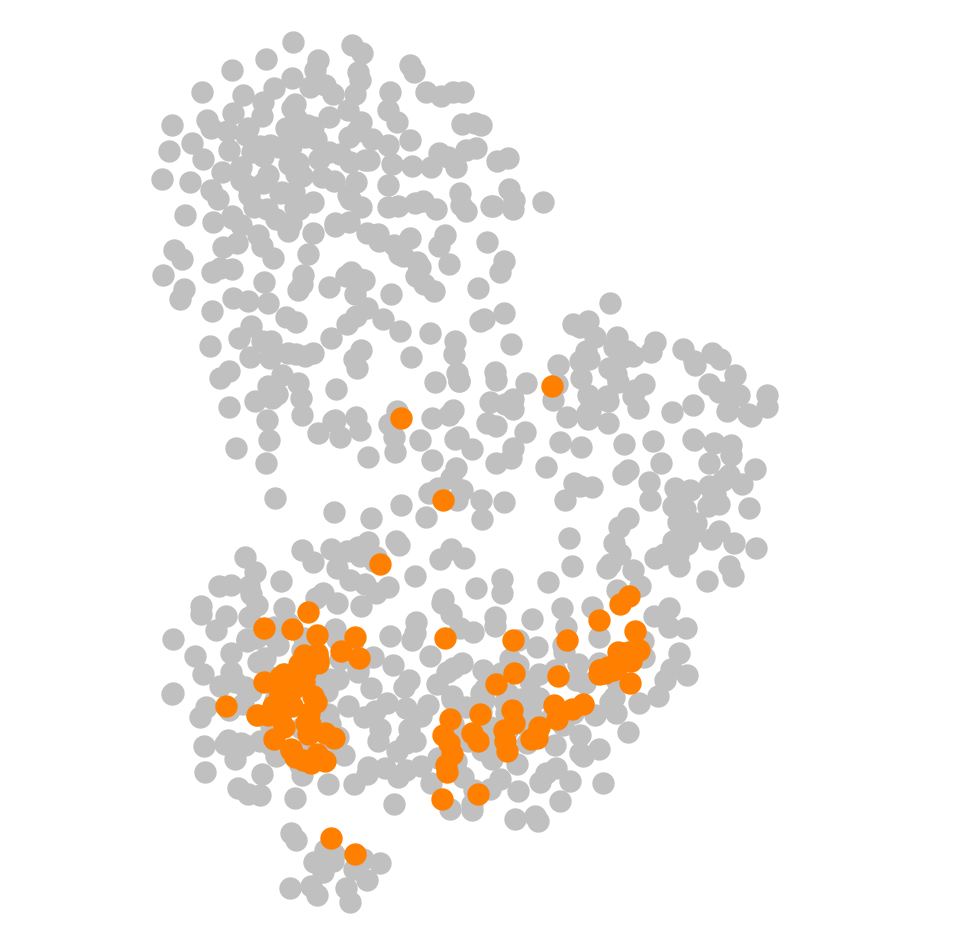

In [552]:
tsne1 = tsne_basal
tsne2 = tsne_NN
cells = c_groups_basal
cmap = cmap_basal

#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne1.index:

    ax1.scatter(tsne1.ix[ix,'x'],
                tsne1.ix[ix,'y'], 
                s = 500,
                linewidth = 0.0,
                c = 'silver',
                edgecolor='black', 
                marker = 'o')
    
for ix in c_sel_Lgr6:

    ax1.scatter(tsne2.ix[ix,'x'],
                tsne2.ix[ix,'y'], 
                s = 500,
                linewidth = 0.0,
                c = '#ff7f00',
                edgecolor='black', 
                marker = 'o')

clean_axis(ax1)

figname = 'v2.6_1_tSNE_basal_Lgr6.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [60]:
saveData_v1(NBR_time_Lgr5_pval_0d, path_output, exp_id, 'NBR_time_Lgr5_pval_0d_')
saveData_v1(NBR_time_Lgr6_pval_0d, path_output, exp_id, 'NBR_time_Lgr6_pval_0d_')

In [61]:
saveData_v1(NBR_states_Lgr5_pval_0d, path_output, exp_id, 'NBR_states_Lgr5_pval_0d_')
saveData_v1(NBR_states_Lgr6_pval_0d, path_output, exp_id, 'NBR_states_Lgr6_pval_0d_')

# Visualization of cell section - Lgr5

## Import data

In [112]:
outlier_pval_Lgr5_sel = loadData_v1(path_output, exp_id, 'outlier_pval_Lgr5_sel', 'DataFrame')
outlier_loocv_Lgr5_sel = loadData_v1(path_output, exp_id, 'outlier_loocv_Lgr5_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [113]:
#select 0 day control cells

c_sel_0d_ctrl_Lgr5 = []

for c in seq_sel_Lgr5_norm.columns:
    if meta.loc['Days', c] == '0 d':
        c_sel_0d_ctrl_Lgr5.append(c)

In [114]:
#select 1 day - >1 month wound area cells 

c_sel_ctrl_area_Lgr5 = []

for c in seq_sel_Lgr5_norm.columns:
    if meta.loc['Days', c] not in ['0 d','1 m+'] and meta.loc['Sample',c] == 'ctrl':
        c_sel_ctrl_area_Lgr5.append(c)

In [115]:
#select 1 day - >1 month control area cells 

c_sel_wnd_area_Lgr5 = []

for c in seq_sel_Lgr5_norm.columns:
    if meta.loc['Days', c] not in ['0 d','1 m+']  and meta.loc['Sample',c] == 'wnd':
        c_sel_wnd_area_Lgr5.append(c)

## Plot data (without > 1m+ cells)

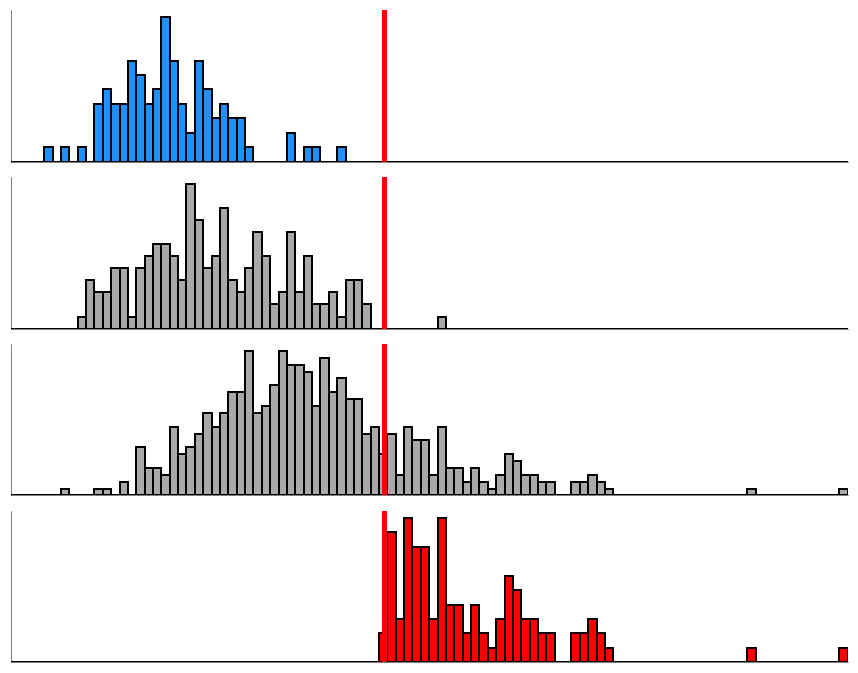

In [123]:
data_0d_ctrl =  outlier_loocv_Lgr5_sel.sum()[c_sel_0d_ctrl_Lgr5]
data_ctrl_area = outlier_pval_Lgr5_sel.sum()[c_sel_ctrl_area_Lgr5]
data_wnd_area = outlier_pval_Lgr5_sel.sum()[c_sel_wnd_area_Lgr5]
data_wnd_sel = outlier_pval_Lgr5_sel.sum()[cl_Lgr5_wnd.index]

#initialize figure

height = 3 * 4
width = 15
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(4, 1, hspace = 0.1, wspace = 0.0)

xmin = 0
xmax = np.max([outlier_loocv_Lgr5_sel.sum().max(), outlier_pval_Lgr5_sel.sum().max()])
perc = 75

#plot 0 day control data

ax = plt.subplot(gs[0])
ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_0d_ctrl, bins = 100, range = (xmin,xmax), color = 'dodgerblue', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot control area data

ax = plt.subplot(gs[1])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_ctrl_area, bins = 100, range = (xmin,xmax), color = 'darkgrey', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot wound area data

ax = plt.subplot(gs[2])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_wnd_area, bins = 100, range = (xmin,xmax), color = 'darkgrey', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot wnd cell data

ax = plt.subplot(gs[3])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_wnd_sel, bins = 100, range = (xmin,xmax), color = 'red', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

figname = 'v2.6_S1_D_distr_Lgr5.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Visualization of cell section - Lgr6

## Import data

In [117]:
outlier_pval_Lgr6_IFE_sel = loadData_v1(path_output, exp_id, 'outlier_pval_Lgr6_IFE_sel', 'DataFrame')
outlier_loocv_Lgr6_IFE_sel = loadData_v1(path_output, exp_id, 'outlier_loocv_Lgr6_IFE_sel', 'DataFrame')

outlier_pval_Lgr6_IST_sel = loadData_v1(path_output, exp_id, 'outlier_pval_Lgr6_IST_sel', 'DataFrame')
outlier_loocv_Lgr6_IST_sel = loadData_v1(path_output, exp_id, 'outlier_loocv_Lgr6_IST_sel', 'DataFrame')

/Users/simjoo/Projects/STRT_wound/scripts/WND_misc_scripts_v2_0.py:240: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  dataset = pd.DataFrame.from_csv('%s/%s_%s.txt' % (path, id_, name), sep = '\t', header = 0, index_col = 0)


In [118]:
#select 0 day control cells

c_sel_0d_ctrl_Lgr6 = []

for c in seq_sel_Lgr6_norm.columns:
    if meta.loc['Days', c] == '0 d':
        c_sel_0d_ctrl_Lgr6.append(c)

In [119]:
#select 1 day - >1 month control area cells 

c_sel_ctrl_area_Lgr6 = []

for c in seq_sel_Lgr6_norm.columns:
    if meta.loc['Days', c] != '0 d' and meta.loc['Sample',c] == 'ctrl':
        c_sel_ctrl_area_Lgr6.append(c)

In [120]:
#select 1 day - >1 month wound area cells 

c_sel_wnd_area_Lgr6 = []

for c in seq_sel_Lgr6_norm.columns:
    if meta.loc['Days', c] != '0 d' and meta.loc['Sample',c] == 'wnd':
        c_sel_wnd_area_Lgr6.append(c)

## Plot data - IFE

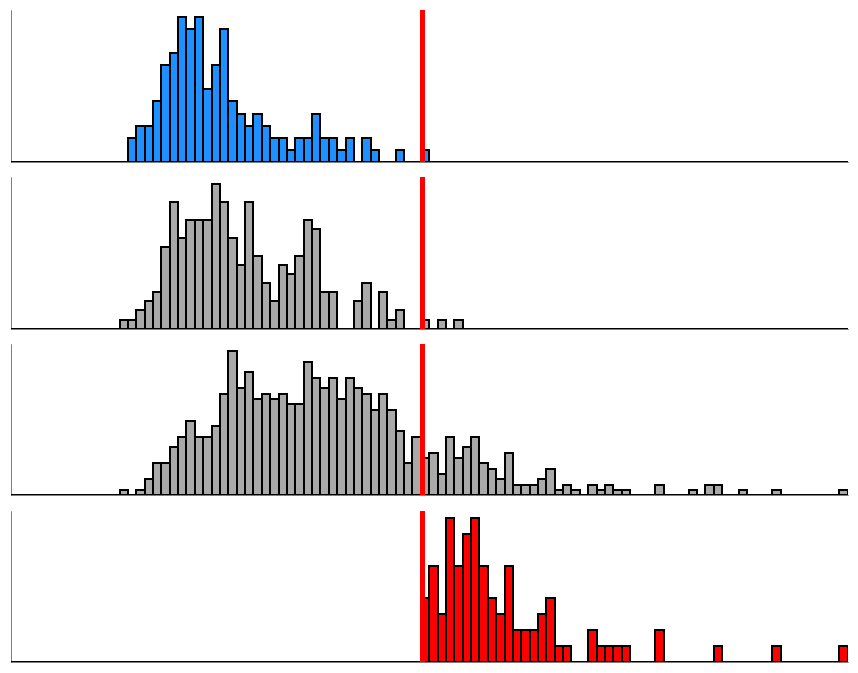

In [124]:
data_0d_ctrl =  outlier_loocv_Lgr6_IFE_sel.sum()
data_ctrl_area = outlier_pval_Lgr6_IFE_sel.sum()[c_sel_ctrl_area_Lgr6]
data_wnd_area = outlier_pval_Lgr6_IFE_sel.sum()[c_sel_wnd_area_Lgr6]
data_wnd_sel = outlier_pval_Lgr6_IFE_sel.sum()[cl_Lgr6_wnd.index]

#initialize figure

height = 3 * 4
width = 15
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(4, 1, hspace = 0.1, wspace = 0.0)

xmin = 0
xmax = np.max([outlier_loocv_Lgr6_IFE_sel.sum().max(), outlier_pval_Lgr6_IFE_sel.sum().max()])
perc = np.percentile(data_0d_ctrl, 100)

#plot 0 day control data

ax = plt.subplot(gs[0])
ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_0d_ctrl, bins = 100, range = (xmin,xmax), color = 'dodgerblue', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot control area data

ax = plt.subplot(gs[1])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_ctrl_area, bins = 100, range = (xmin,xmax), color = 'darkgrey', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot wound area data

ax = plt.subplot(gs[2])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_wnd_area, bins = 100, range = (xmin,xmax), color = 'darkgrey', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot wnd cell data

ax = plt.subplot(gs[3])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_wnd_sel, bins = 100, range = (xmin,xmax), color = 'red', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

figname = 'v2.6_S1_D_distr_Lgr6_IFE.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Plot data - IST

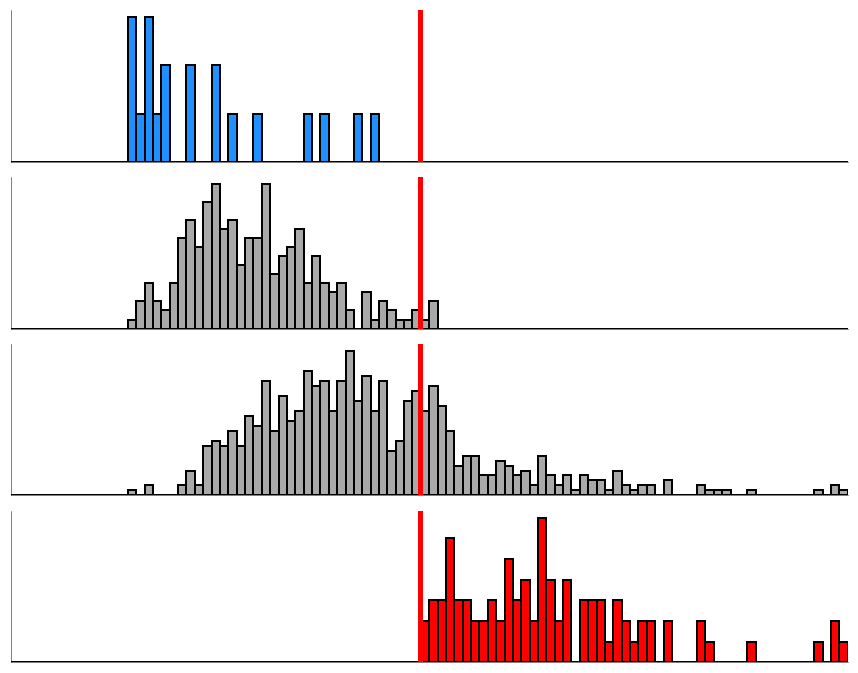

In [125]:
data_0d_ctrl =  outlier_loocv_Lgr6_IST_sel.sum()
data_ctrl_area = outlier_pval_Lgr6_IST_sel.sum()[c_sel_ctrl_area_Lgr6]
data_wnd_area = outlier_pval_Lgr6_IST_sel.sum()[c_sel_wnd_area_Lgr6]
data_wnd_sel = outlier_pval_Lgr6_IST_sel.sum()[cl_Lgr6_wnd.index]

#initialize figure

height = 3 * 4
width = 15
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(4, 1, hspace = 0.1, wspace = 0.0)

xmin = 0
xmax = np.max([outlier_loocv_Lgr6_IST_sel.sum().max(), outlier_pval_Lgr6_IST_sel.sum().max()])
perc = 185

#plot 0 day control data

ax = plt.subplot(gs[0])
ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_0d_ctrl, bins = 100, range = (xmin,xmax), color = 'dodgerblue', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot control area data

ax = plt.subplot(gs[1])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_ctrl_area, bins = 100, range = (xmin,xmax), color = 'darkgrey', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot wound area data

ax = plt.subplot(gs[2])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_wnd_area, bins = 100, range = (xmin,xmax), color = 'darkgrey', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

#plot wnd cell data

ax = plt.subplot(gs[3])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(perc, color = 'red', lw = 5)

ax.hist(data_wnd_sel, bins = 100, range = (xmin,xmax), color = 'red', linewidth = 2, edgecolor = 'black')
remove_ticks(ax)

figname = 'v2.6_S1_D_distr_Lgr6_IST.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

# Comparison of Lgr5 1d replicates

In [47]:
seq_sel = dropNull_v2(seq, path_input, cutoff_mean = 0.00)


Dropping spikes from dataset

Dropping markers from dataset

Dropping unexpressed genes from dataset


In [48]:
seq_sel = cellCutoff(seq_sel, 2000)


Removing cells with less than 2000 transcripts


In [49]:
c_sel = meta.loc['Genotype',seq_sel.columns][meta.loc['Genotype',seq_sel.columns]=='Lgr5cre/Tomato'].index
c_sel = meta.loc['Days', c_sel][meta.loc['Days', c_sel]=='1 d'].index

In [50]:
Counter(meta.loc['Mouse_ID',c_sel])

Counter({'SJ84:2': 198, 'XS22:1': 107})

In [51]:
c_sel_1d_rep1 = meta.loc['Mouse_ID',seq_sel.columns][meta.loc['Mouse_ID',seq_sel.columns]=='SJ84:2'].index
c_sel_1d_rep2 = meta.loc['Mouse_ID',seq_sel.columns][meta.loc['Mouse_ID',seq_sel.columns]=='XS22:1'].index

## Expression level

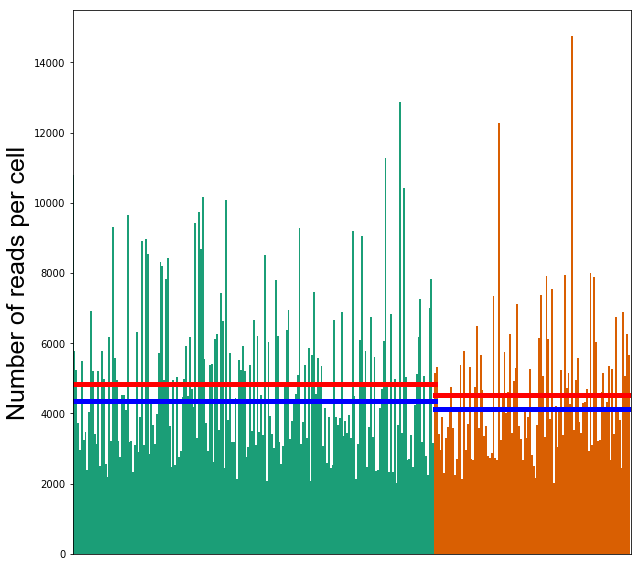

In [52]:
data = seq_sel[list(c_sel_1d_rep1) + list(c_sel_1d_rep2)].sum()
cmap = {'SJ84:2':'#1b9e77','XS22:1':'#d95f02'}

#initialize figure

height = 10
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
    
ax = plt.subplot(111)
ax.set_xlim(0, len(data.index))
ax.set_ylabel('Number of reads per cell', family = 'Arial', fontsize = 25)

ax.set_xticks([])
        
#define patient colorscheme
    
clist = [cmap[meta.loc['Mouse_ID',ix]] for ix in data.index]
    
#plot bars
    
ax.bar(range(len(data.index)),
        data, color = clist,
        width = 1.0)
    
#plot median and mean
    
ax.axhline(np.median(data[c_sel_1d_rep1]), 
           xmin = 0, 
           xmax = len(c_sel_1d_rep1) / len(data.index), 
           color = 'blue', lw = 5)

ax.axhline(np.median(data[c_sel_1d_rep2]), 
           xmin = len(c_sel_1d_rep1) / len(data.index), 
           xmax = 1, 
           color = 'blue', lw = 5)


ax.axhline(np.mean(data[c_sel_1d_rep1]), 
           xmin = 0, 
           xmax = len(c_sel_1d_rep1) / len(data.index), 
           color = 'red', lw = 5)

ax.axhline(np.mean(data[c_sel_1d_rep2]), 
           xmin = len(c_sel_1d_rep1) / len(data.index), 
           xmax = 1, 
           color = 'red', lw = 5)

figname = 'v2.6_S1_Lgr5_rep_reads.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

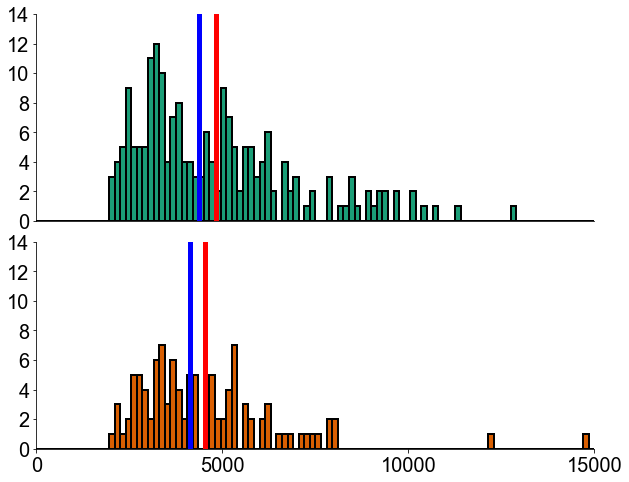

In [59]:
rep1 = seq_sel[c_sel_1d_rep1].sum()
rep2 = seq_sel[c_sel_1d_rep2].sum()

#initialize figure

height = 2 * 4
width = 10
plt.figure(facecolor = 'w', figsize = (width, height))
gs = plt.GridSpec(2, 1, hspace = 0.1, wspace = 0.0)

xmin = 0
xmax = 15000

#plot 0 day control data

ax = plt.subplot(gs[0])
ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(np.mean(rep1), color = 'red', lw = 5)
ax.axvline(np.median(rep1), color = 'blue', lw = 5)

ax.hist(rep1, bins = 100, range = (xmin,xmax), color = '#1b9e77', linewidth = 2, edgecolor = 'black')

ax.set_yticks([0,2,4,6,8,10,12,14])
ax.set_yticklabels([0,2,4,6,8,10,12,14], family = 'Arial', fontsize = 20)
ax.set_xticks([])

#plot control area data

ax = plt.subplot(gs[1])

ax.set_xlim(xmin,xmax)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.axvline(np.mean(rep2), color = 'red', lw = 5)
ax.axvline(np.median(rep2), color = 'blue', lw = 5)

ax.hist(rep2, bins = 100, range = (xmin,xmax), color = '#d95f02', linewidth = 2, edgecolor = 'black')

ax.set_yticks([0,2,4,6,8,10,12,14])
ax.set_yticklabels([0,2,4,6,8,10,12,14], family = 'Arial', fontsize = 20)
ax.set_xticks([0,5000,10000,15000])
ax.set_xticklabels([0,5000,10000,15000], family = 'Arial', fontsize = 20)

figname = 'v2.6_S1_Lgr5_rep_reads_v2.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Distribution of wound cells

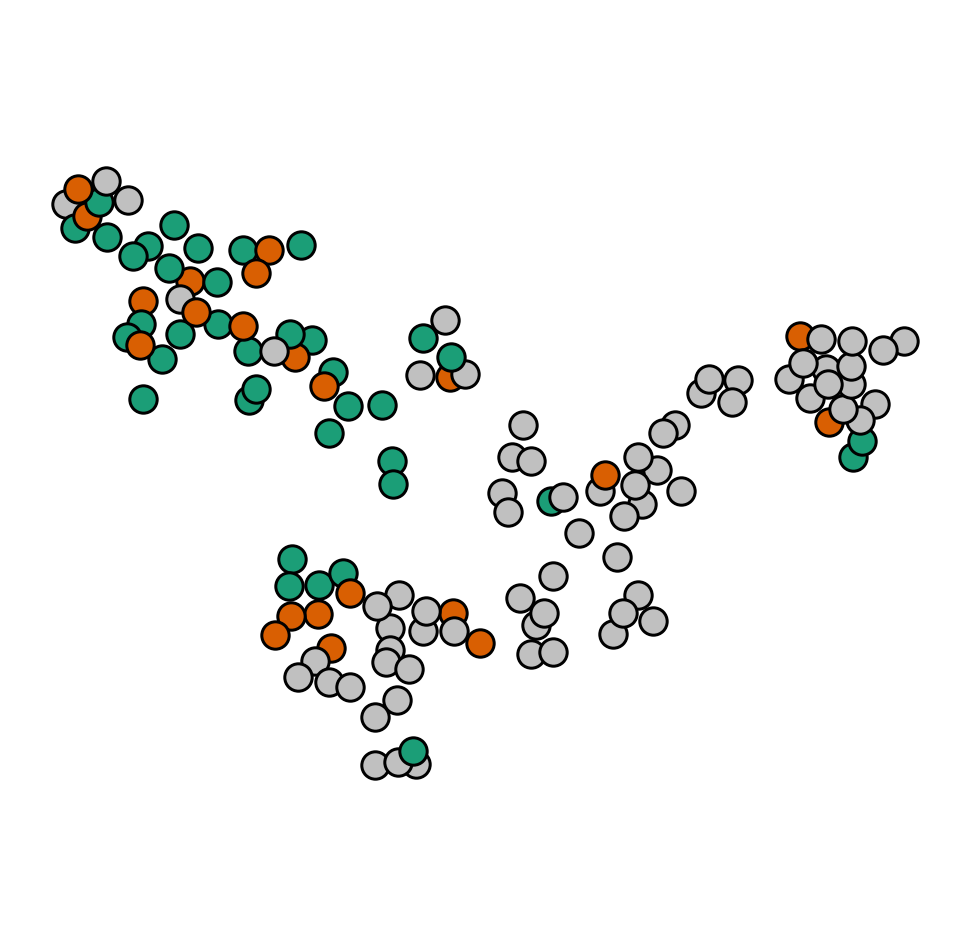

In [329]:
tsne = tsne_Lgr5_wnd_ctrl_sel


#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:
    
    if ix in c_sel_1d_rep1:
        ax1.scatter(tsne.ix[ix,'x'],
                    tsne.ix[ix,'y'], 
                    s = 750,
                    linewidth = 3.0,
                    c = '#1b9e77',
                    edgecolor='black', 
                    marker = 'o')
        
    elif ix in c_sel_1d_rep2:
        ax1.scatter(tsne.ix[ix,'x'],
                    tsne.ix[ix,'y'], 
                    s = 750,
                    linewidth = 3.0,
                    c = '#d95f02',
                    edgecolor='black', 
                    marker = 'o')
        
    
    else:
        ax1.scatter(tsne.ix[ix,'x'],
                    tsne.ix[ix,'y'], 
                    s = 750,
                    linewidth = 3.0,
                    c = 'silver',
                    edgecolor='black', 
                    marker = 'o')

clean_axis(ax1)

figname = 'v2.6_S1_tsne_Lgr5_rep.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

In [330]:
c_sel_1d_rep1_in_wnd = [c for c in c_sel_1d_rep1 if c in cl_Lgr5_wnd.index]
c_sel_1d_rep2_in_wnd = [c for c in c_sel_1d_rep2 if c in cl_Lgr5_wnd.index]

In [350]:
len(c_sel_1d_rep1)

198

In [331]:
len(c_sel_1d_rep1_in_wnd)

38

In [351]:
len(c_sel_1d_rep2)

107

In [332]:
len(c_sel_1d_rep2_in_wnd)

22

In [333]:
len(c_sel_1d_rep1_in_wnd) / len(c_sel_1d_rep1)

0.1919191919191919

In [334]:
len(c_sel_1d_rep2_in_wnd) / len(c_sel_1d_rep2)

0.205607476635514

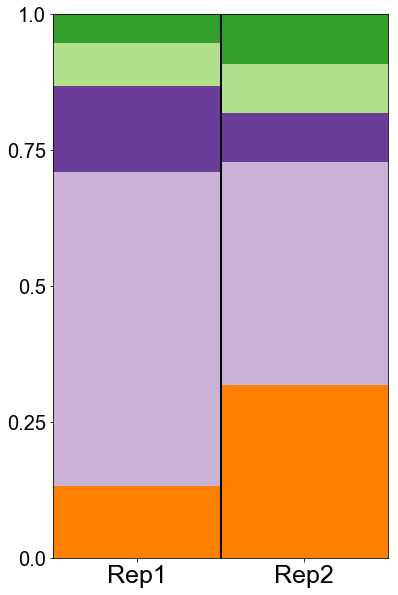

In [335]:
rep1 = c_sel_1d_rep1_in_wnd
rep2 = c_sel_1d_rep2_in_wnd

states = cl_Lgr5_wnd_ctrl
states_order = return_unique(cl_Lgr5_wnd_ctrl)

cmap = cmap_Lgr5_state

#initialize figure

height = 10
width = 6

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

# plot data

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0,1)

ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], family = 'Arial', fontsize = 20)

ax.set_xticks([0,1])
ax.set_xticklabels(['Rep1','Rep2'], family = 'Arial', fontsize = 25)

c_sel = rep1
counter_tmp = Counter(states[c_sel])
l_tmp = len(c_sel)
bottom = 0
    
for t in states_order:
    incr = counter_tmp[t] / l_tmp
    ax.bar(0, height = incr  + bottom, bottom = bottom, width = 1, color = cmap[t])
    bottom += incr
        
c_sel = rep2
counter_tmp = Counter(states[c_sel])
l_tmp = len(c_sel)
bottom = 0
    
for t in states_order:
    incr = counter_tmp[t] / l_tmp
    ax.bar(1, height = incr  + bottom, bottom = bottom, width = 1, color = cmap[t])
    bottom += incr
    
ax.axvline(0.5, lw = 2, color = 'k')

figname = 'v2.6_S1_Lgr5_rep_state.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Calculate enrichment

In [338]:
Lgr5_wnd_rep_dict = {'SJ84:2':c_sel_1d_rep1_in_wnd,
                     'XS22:1':c_sel_1d_rep2_in_wnd}

In [344]:
enr_Lgr5_wnd = pd.DataFrame(index = ['SJ84:2','XS22:1'], 
                             columns = ['n_all'] 
                             + ['n_%s' % cl for cl in return_unique(cl_Lgr5_wnd)]
                             + ['perc_all']
                             + ['perc_%s' % cl for cl in return_unique(cl_Lgr5_wnd)] 
                             + ['p_%s' % cl for cl in return_unique(cl_Lgr5_wnd)])

for gr in ['SJ84:2','XS22:1']:
    c_comb = list(c_sel_1d_rep1_in_wnd) + list(c_sel_1d_rep2_in_wnd)
    L = len(c_comb)
    c_sel = Lgr5_wnd_rep_dict[gr]
    l = len(c_sel)
    enr_Lgr5_wnd.loc[gr,'n_all'] = l
    enr_Lgr5_wnd.loc[gr,'perc_all'] = l / L
    
    count_rep = Counter(cl_Lgr5_wnd[c_sel])
    count_all = Counter(cl_Lgr5_wnd[c_comb])
    
    for cl in return_unique(cl_Lgr5_wnd):
        enr_Lgr5_wnd.loc[gr,'n_%s' % cl] = count_rep[cl]
        enr_Lgr5_wnd.loc[gr,'perc_%s' % cl] =  count_rep[cl] /  count_all[cl]
        enr_Lgr5_wnd.loc[gr,'p_%s' % cl] = stage_get_pval_binomial_distr(count_all[cl], 
                                                                          l / L, 
                                                                       count_rep[cl])[1]

In [345]:
enr_Lgr5_wnd

n_all n_3 n_2 n_0 n_1 n_4  perc_all    perc_3    perc_2 perc_0 perc_1  \
SJ84:2    38   5  22   6   3   2  0.633333  0.416667  0.709677   0.75    0.6   
XS22:1    22   7   9   2   2   2  0.366667  0.583333  0.290323   0.25    0.4   

       perc_4       p_3       p_2       p_0       p_1       p_4  
SJ84:2    0.5  0.965994  0.246401  0.388715  0.738401  0.857041  
XS22:1    0.5  0.105916  0.858034  0.854223  0.603138  0.466522

In [346]:
depl_Lgr5_wnd = pd.DataFrame(index = ['SJ84:2','XS22:1'], 
                             columns = ['n_all'] 
                             + ['n_%s' % cl for cl in return_unique(cl_Lgr5_wnd)]
                             + ['perc_all']
                             + ['perc_%s' % cl for cl in return_unique(cl_Lgr5_wnd)] 
                             + ['p_%s' % cl for cl in return_unique(cl_Lgr5_wnd)])

for gr in ['SJ84:2','XS22:1']:
    c_comb = list(c_sel_1d_rep1_in_wnd) + list(c_sel_1d_rep2_in_wnd)
    L = len(c_comb)
    c_sel = Lgr5_wnd_rep_dict[gr]
    l = len(c_sel)
    depl_Lgr5_wnd.loc[gr,'n_all'] = l
    depl_Lgr5_wnd.loc[gr,'perc_all'] = l / L
    
    count_rep = Counter(cl_Lgr5_wnd[c_sel])
    count_all = Counter(cl_Lgr5_wnd[c_comb])
    
    for cl in return_unique(cl_Lgr5_wnd):
        depl_Lgr5_wnd.loc[gr,'n_%s' % cl] = count_rep[cl]
        depl_Lgr5_wnd.loc[gr,'perc_%s' % cl] =  count_rep[cl] /  count_all[cl]
        depl_Lgr5_wnd.loc[gr,'p_%s' % cl] = stage_get_pval_binomial_distr(count_all[cl], 
                                                                          l / L, 
                                                                       count_rep[cl])[0]

In [347]:
depl_Lgr5_wnd

n_all n_3 n_2 n_0 n_1 n_4  perc_all    perc_3    perc_2 perc_0 perc_1  \
SJ84:2    38   5  22   6   3   2  0.633333  0.416667  0.709677   0.75    0.6   
XS22:1    22   7   9   2   2   2  0.366667  0.583333  0.290323   0.25    0.4   

       perc_4       p_3       p_2       p_0       p_1       p_4  
SJ84:2    0.5  0.105916  0.858034  0.854223  0.603138  0.466522  
XS22:1    0.5  0.965994  0.246401  0.388715  0.738401  0.857041

# tSNE of control cells (1 day PWI - rep 1 and 2) - Lgr5

In [103]:
def dist_mat_dim_reduc_v2(dataset, dim=50, method='TruncatedSVD', distance = 'euclidean', log2 = False, **kwargs):

    from sklearn.decomposition import NMF, PCA, TruncatedSVD
    from scipy.spatial.distance import pdist, squareform

    if method == 'PCA':
        pca = PCA(n_components=dim, **kwargs)
        data_tmp = pd.DataFrame(pca.fit_transform(dataset.T).T, index = range(dim), columns = dataset.columns)

    if method == 'TruncatedSVD':
        tSVD = TruncatedSVD(n_components=dim, **kwargs)
        data_tmp =  pd.DataFrame(tSVD.fit_transform(dataset.T).T, index =  range(dim), columns = dataset.columns)
        
    if method == 'NMF':
        nmf = NMF(n_components=dim, **kwargs)
        data_tmp = pd.DataFrame(nmf.fit_transform(dataset.T).T, index = range(dim), columns = dataset.columns)
        
    if distance == 'pearson':
        return data_tmp, 1 - data_tmp.corr()

    elif distance == 'euclidean':
        return data_tmp, pd.DataFrame(squareform(pdist(np.array(data_tmp.T), 'euclidean')), index = dataset.columns, columns = dataset.columns)

    elif distance == 'sqeuclidean':
        return data_tmp, pd.DataFrame(squareform(pdist(np.array(data_tmp.T), 'sqeuclidean')), index = dataset.columns, columns = dataset.columns)

In [142]:
c_sel = meta.loc['Genotype', seq_sel_Lgr5_norm.columns][meta.loc['Genotype', seq_sel_Lgr5_norm.columns]=='Lgr5cre/Tomato'].index
c_sel = meta.loc['Sample', c_sel][meta.loc['Sample', c_sel]=='ctrl'].index
c_sel = meta.loc['Days', c_sel][meta.loc['Days', c_sel].isin(['1 d'])].index

In [143]:
cells_ctrl_Lgr5_rep = pd.Series(meta.loc['Mouse_ID',c_sel], index = c_sel)

In [144]:
Counter(cells_ctrl_Lgr5_rep)

Counter({'SJ84:2': 40, 'XS22:1': 28})

### Feature selection


Dropping unexpressed genes from dataset

After mean expression cutoff of 0.2, 3738 genes remain
Optimization terminated successfully.
         Current function value: 733.721193
         Iterations: 30
         Function evaluations: 57

After high variance feature selection, 1000 genes remain

Calculating binary logarithm of x + 1


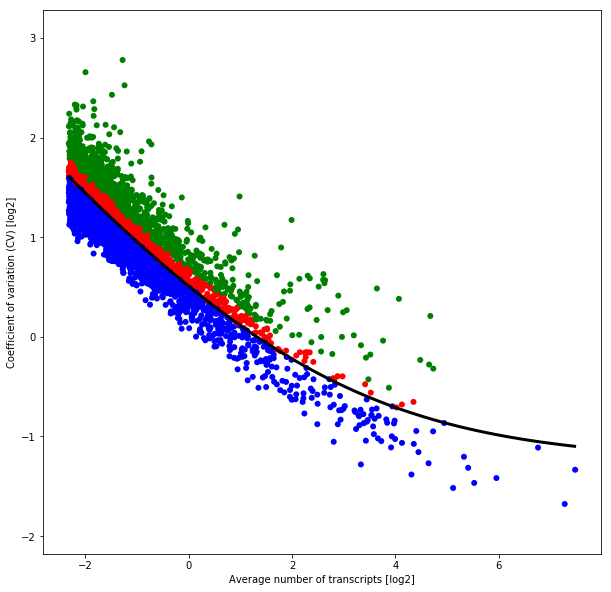

In [145]:
seq_sel_Lgr5_ctrl_rep = select_features_v3(seq_sel_Lgr5_norm[cells_ctrl_Lgr5_rep.index], 0.2, 1000, path_input, return_all=False, drop_spikes = False, drop_markers = False)

### tSNE

In [146]:
seq_sel_Lgr5_ctrl_rep_pca, dist_Lgr5_ctrl_rep_pca = dist_mat_dim_reduc_v2(seq_sel_Lgr5_ctrl_rep, dim=20, method='NMF', distance = 'euclidean')

/Users/simjoo/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['Liberation Sans'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


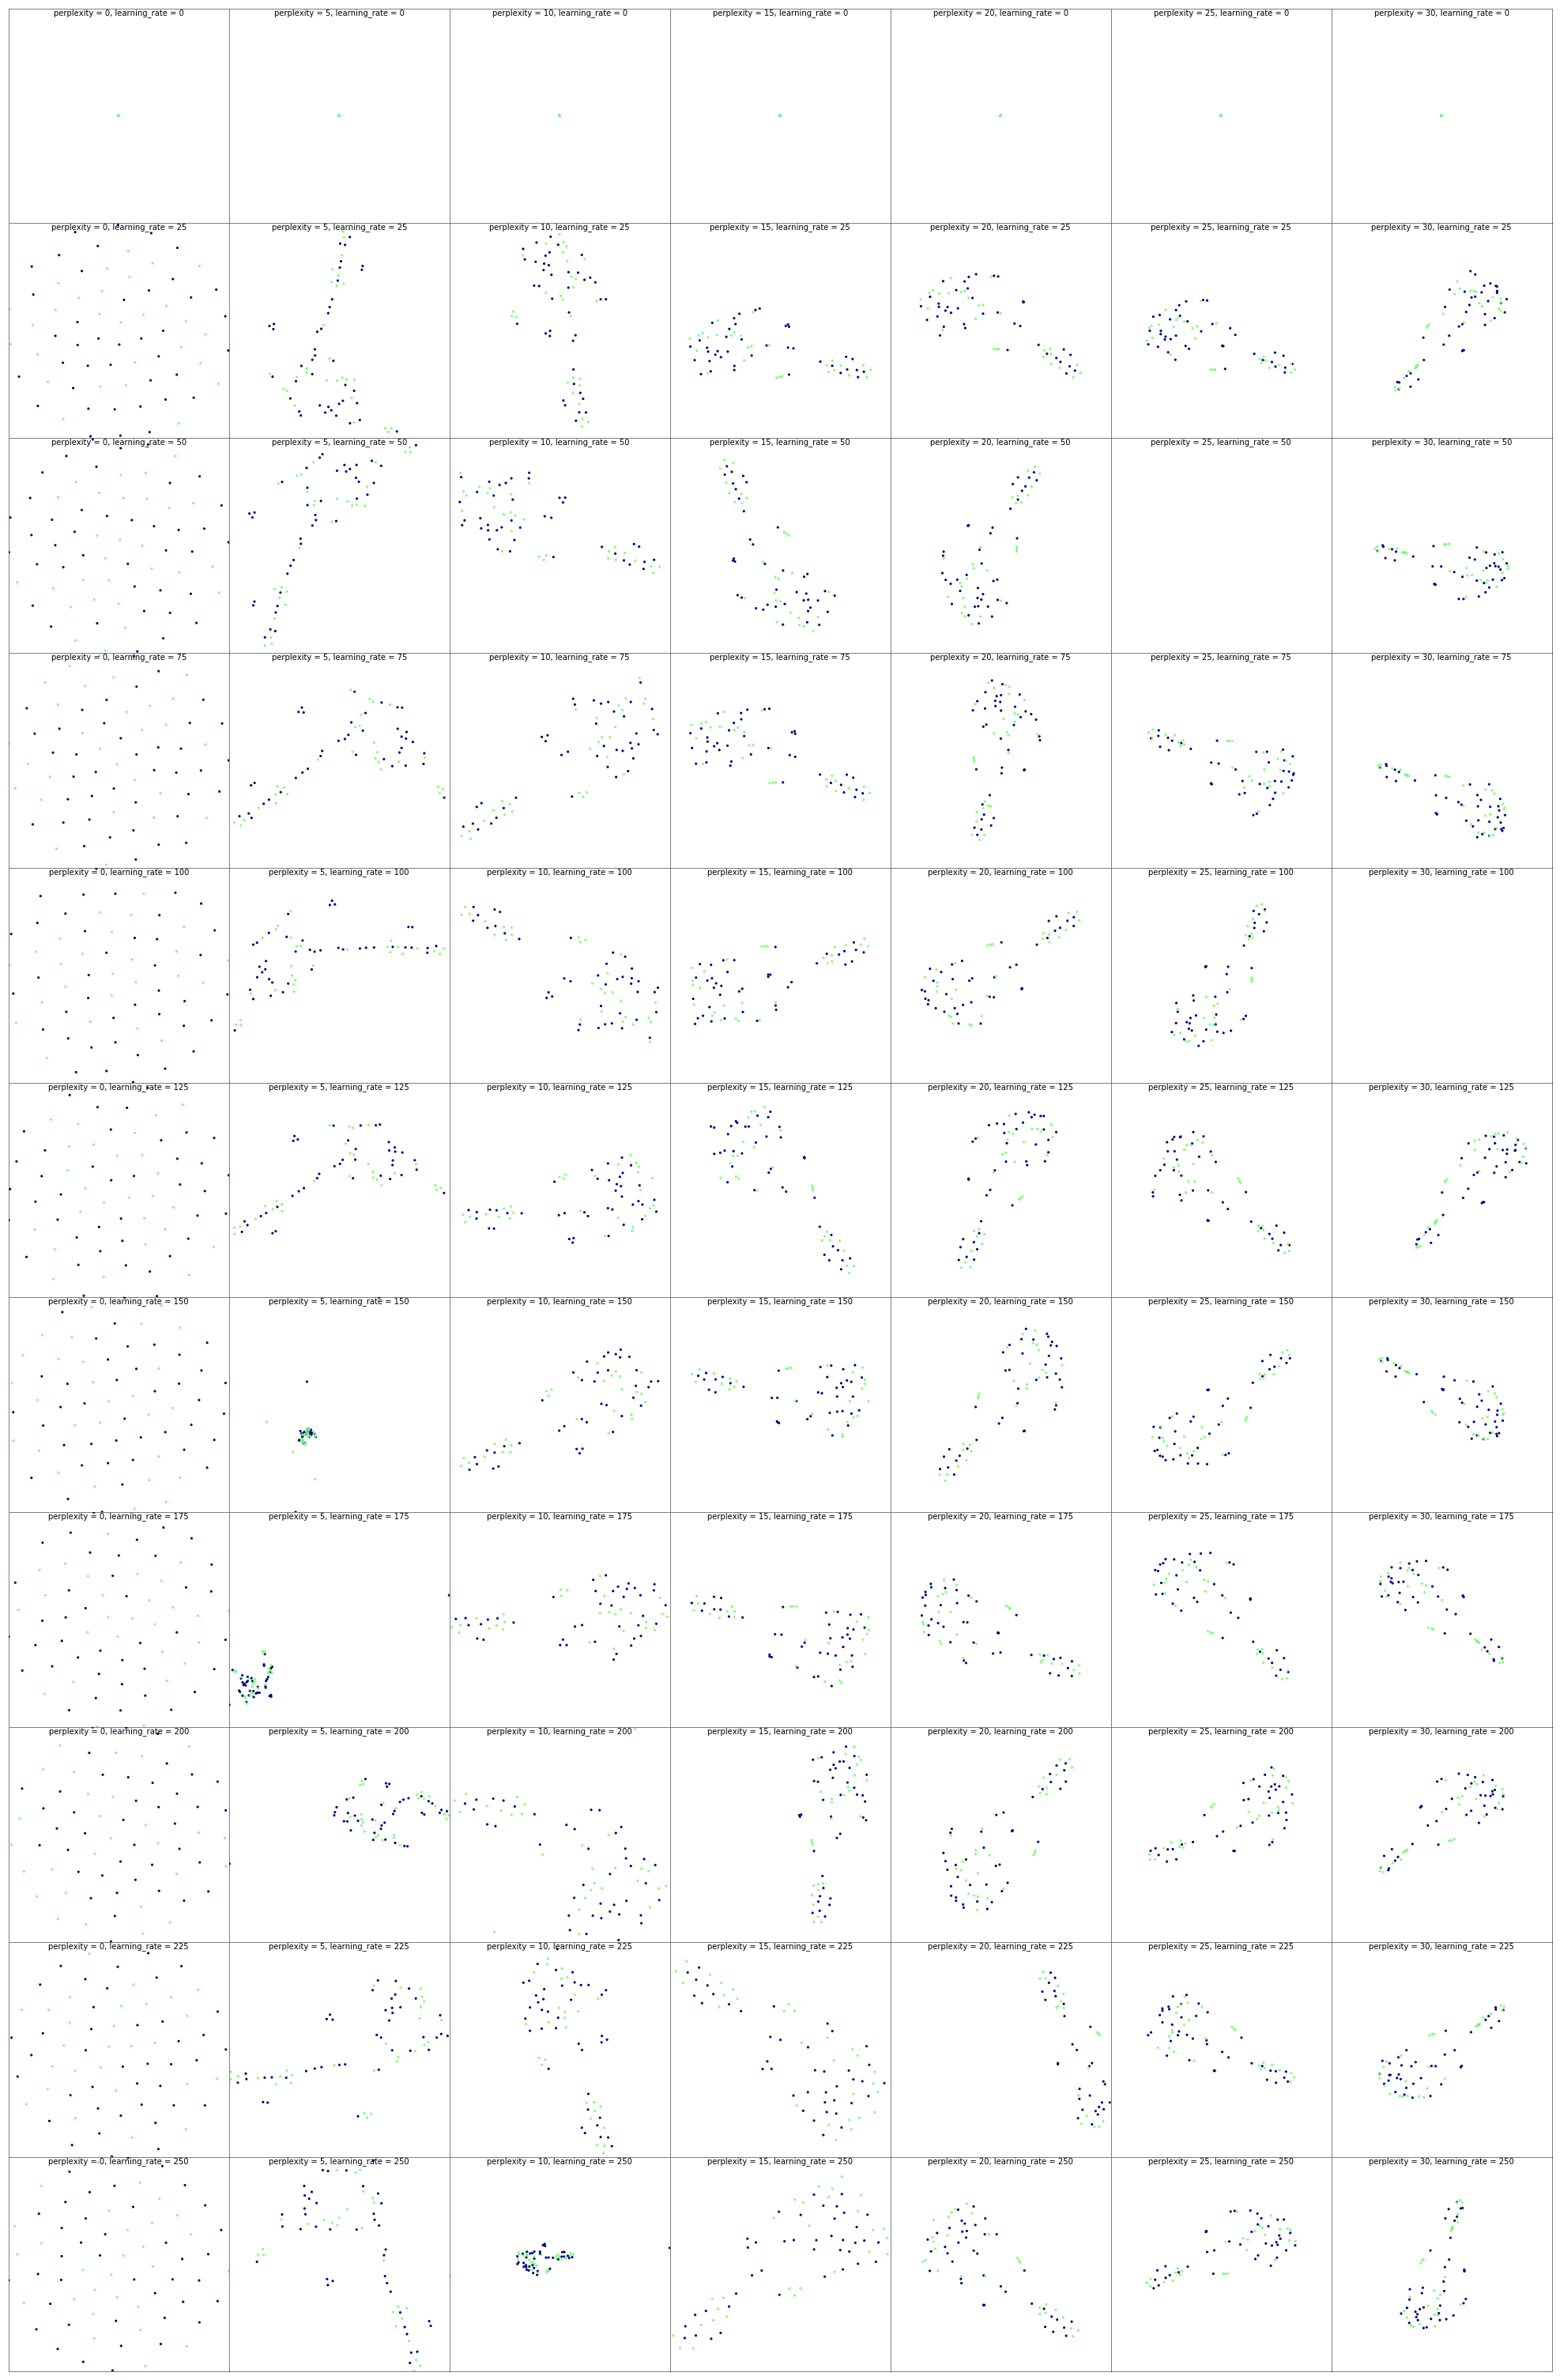

In [147]:
tsne_coords_Lgr5_ctrl_rep = tSNE_get_params_v1P(dist_Lgr5_ctrl_rep_pca, 
                                       cells_ctrl_Lgr5_rep, 
                                       plt.cm.jet,
                                       dview,
                                       np.arange(0,35,5),
                                       2.0,
                                       np.arange(0,275,25),
                                       10000,
                                       sec_var = 'learning_rate')

In [148]:
tsne_Lgr5_ctrl_rep = tsne_coords_Lgr5_ctrl_rep[(20,75)]

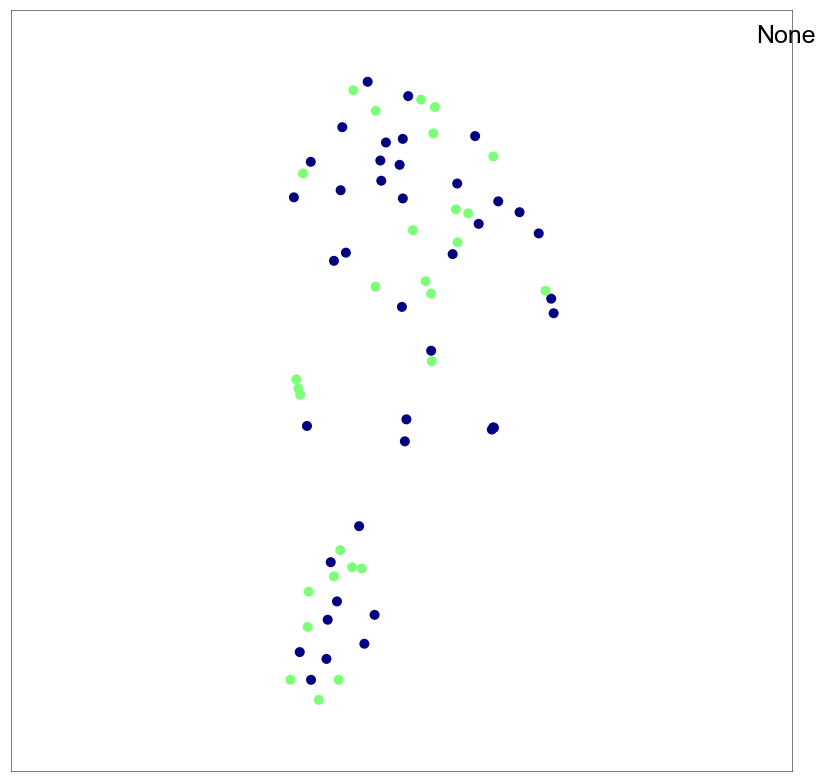

In [149]:
draw_tSNE(tsne_Lgr5_ctrl_rep, cells_ctrl_Lgr5_rep)

## k-means clustering of ctrl cells

/Users/simjoo/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


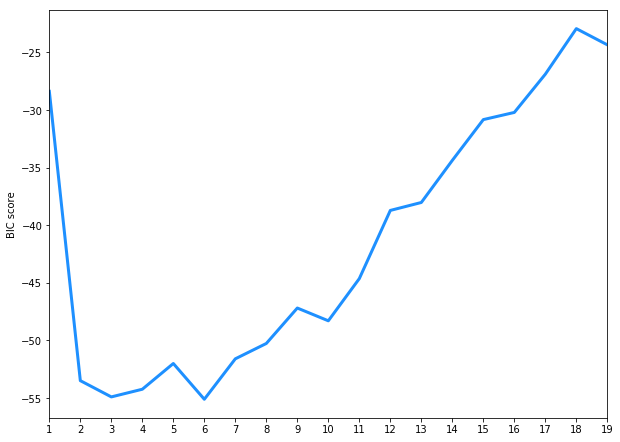

In [153]:
tsne_kmeans_select_n(seq_sel_Lgr5_ctrl_rep_pca,
                     tsne_Lgr5_ctrl_rep, 
                     cells_ctrl_Lgr5_rep.index, 
                     range(1,20), 
                     criterion = 'BIC')

In [154]:
cl_Lgr5_ctrl_rep = tsne_kmeans(tsne_Lgr5_ctrl_rep, cells_ctrl_Lgr5_rep.index, 3)

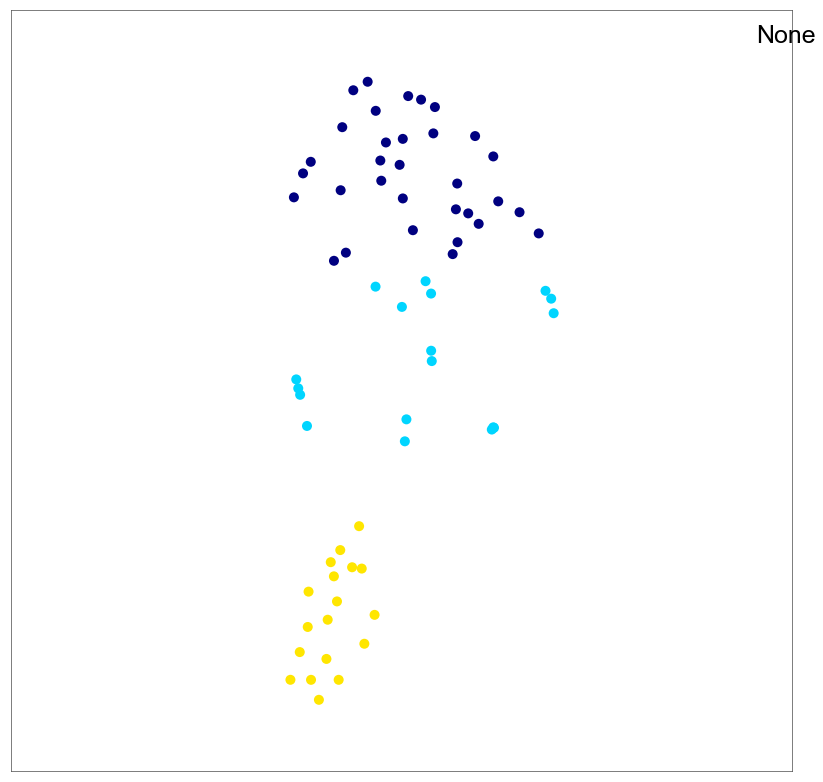

In [155]:
draw_tSNE(tsne_Lgr5_ctrl_rep, cl_Lgr5_ctrl_rep)

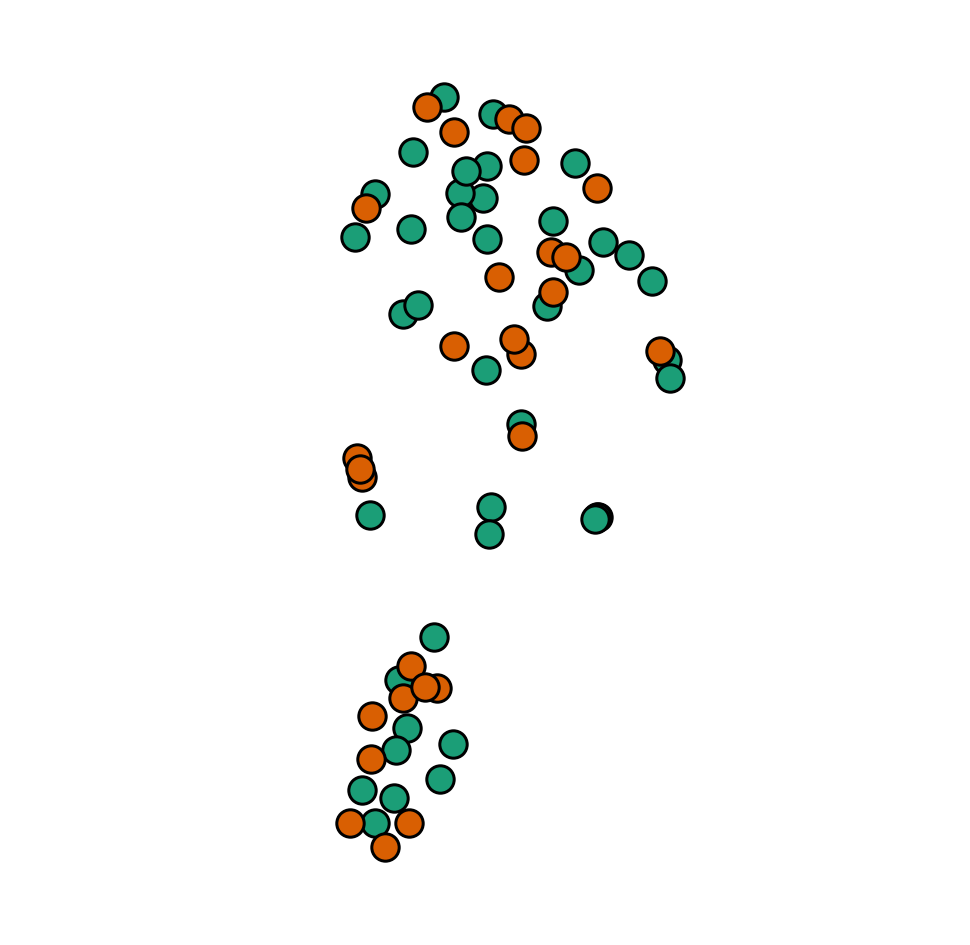

In [348]:
tsne = tsne_Lgr5_ctrl_rep


#initialize figure

height = 17
width = 17

fig = plt.figure(facecolor = 'w', figsize = (width, height))

#define x- and y-limits

x_min, x_max = np.min(tsne['x']), np.max(tsne['x'])
y_min, y_max = np.min(tsne['y']), np.max(tsne['y'])
x_diff, y_diff = x_max - x_min, y_max - y_min

pad = 2.0

if x_diff > y_diff:
    xlim = (x_min - pad, x_max + pad)
    ylim = (y_min * (x_diff / y_diff) - pad, y_max * (x_diff / y_diff) + pad)

if x_diff < y_diff:
    xlim = (x_min * (y_diff/x_diff) - pad, x_max * (y_diff/x_diff) + pad)
    ylim = (y_min - pad, y_max + pad)

text_pad = 2
    
#draw groups

ax1 = plt.subplot()

ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ylim[0], ylim[1])

remove_ticks(ax1)

for ix in tsne.index:
    
    if ix in c_sel_1d_rep1:
        ax1.scatter(tsne.ix[ix,'x'],
                    tsne.ix[ix,'y'], 
                    s = 750,
                    linewidth = 3.0,
                    c = '#1b9e77',
                    edgecolor='black', 
                    marker = 'o')
        
    elif ix in c_sel_1d_rep2:
        ax1.scatter(tsne.ix[ix,'x'],
                    tsne.ix[ix,'y'], 
                    s = 750,
                    linewidth = 3.0,
                    c = '#d95f02',
                    edgecolor='black', 
                    marker = 'o')

clean_axis(ax1)

figname = 'v2.6_S1_tsne_Lgr5_rep_ctrl.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)

## Calculate enrichment

In [219]:
def stage_get_pval_binomial_distr(n, p, N):
    
    """
    n: number of trials == number of cells in a population
    p: success probability == percentage of rep cells in whole dataset
    N: number of successes == number of rep cells in population
    """
    
    return scipy.stats.binom.cdf(N, n, p), 1 - scipy.stats.binom.cdf(N-1, n, p)

In [222]:
enr_Lgr5_ctrl = pd.DataFrame(index = set(cells_ctrl_Lgr5_rep), 
                             columns = ['n_all'] 
                             + ['n_%s' % cl for cl in return_unique(cl_Lgr5_ctrl_rep)]
                             + ['perc_all']
                             + ['perc_%s' % cl for cl in return_unique(cl_Lgr5_ctrl_rep)] 
                             + ['p_%s' % cl for cl in return_unique(cl_Lgr5_ctrl_rep)])

for gr in set(cells_ctrl_Lgr5_rep):
    L = len(cells_ctrl_Lgr5_rep)
    c_sel = cells_ctrl_Lgr5_rep[cells_ctrl_Lgr5_rep==gr].index
    l = len(c_sel)
    enr_Lgr5_ctrl.loc[gr,'n_all'] = l
    enr_Lgr5_ctrl.loc[gr,'perc_all'] = l / L
    
    count_rep = Counter(cl_Lgr5_ctrl_rep[c_sel])
    count_all = Counter(cl_Lgr5_ctrl_rep)
    
    for cl in return_unique(cl_Lgr5_ctrl_rep):
        enr_Lgr5_ctrl.loc[gr,'n_%s' % cl] = count_rep[cl]
        enr_Lgr5_ctrl.loc[gr,'perc_%s' % cl] =  count_rep[cl] /  count_all[cl]
        enr_Lgr5_ctrl.loc[gr,'p_%s' % cl] = stage_get_pval_binomial_distr(count_all[cl], 
                                                                          l / L, 
                                                                          count_rep[cl])[1]

In [223]:
enr_Lgr5_ctrl

n_all n_0 n_2 n_1  perc_all   perc_0    perc_2 perc_1       p_0  \
XS22:1    28  11   8   9  0.411765  0.34375  0.444444    0.5  0.831548   
SJ84:2    40  21  10   9  0.588235  0.65625  0.555556    0.5  0.276194   

             p_2       p_1  
XS22:1  0.477493  0.298118  
SJ84:2  0.701882  0.841396

In [224]:
depl_Lgr5_ctrl = pd.DataFrame(index = set(cells_ctrl_Lgr5_rep), 
                             columns = ['n_all'] 
                             + ['n_%s' % cl for cl in return_unique(cl_Lgr5_ctrl_rep)]
                             + ['perc_all']
                             + ['perc_%s' % cl for cl in return_unique(cl_Lgr5_ctrl_rep)] 
                             + ['p_%s' % cl for cl in return_unique(cl_Lgr5_ctrl_rep)])

for gr in set(cells_ctrl_Lgr5_rep):
    L = len(cells_ctrl_Lgr5_rep)
    c_sel = cells_ctrl_Lgr5_rep[cells_ctrl_Lgr5_rep==gr].index
    l = len(c_sel)
    depl_Lgr5_ctrl.loc[gr,'n_all'] = l
    depl_Lgr5_ctrl.loc[gr,'perc_all'] = l / L
    
    count_rep = Counter(cl_Lgr5_ctrl_rep[c_sel])
    count_all = Counter(cl_Lgr5_ctrl_rep)
    
    for cl in return_unique(cl_Lgr5_ctrl_rep):
        depl_Lgr5_ctrl.loc[gr,'n_%s' % cl] = count_rep[cl]
        depl_Lgr5_ctrl.loc[gr,'perc_%s' % cl] =  count_rep[cl] /  count_all[cl]
        depl_Lgr5_ctrl.loc[gr,'p_%s' % cl] = stage_get_pval_binomial_distr(count_all[cl], 
                                                                          l / L, 
                                                                          count_rep[cl])[0]

In [225]:
depl_Lgr5_ctrl

n_all n_0 n_2 n_1  perc_all   perc_0    perc_2 perc_1       p_0  \
XS22:1    28  11   8   9  0.411765  0.34375  0.444444    0.5  0.276194   
SJ84:2    40  21  10   9  0.588235  0.65625  0.555556    0.5  0.831548   

             p_2       p_1  
XS22:1  0.701882  0.841396  
SJ84:2  0.477493  0.298118

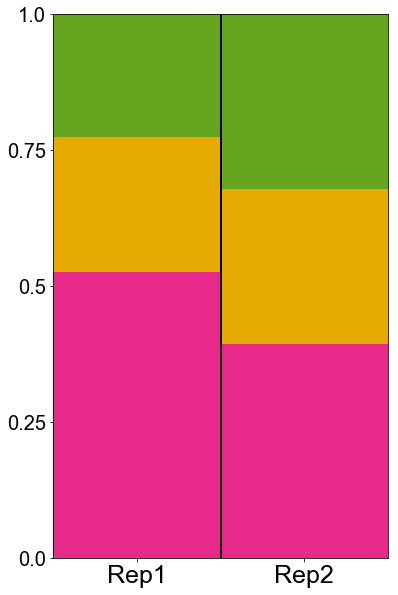

In [352]:
rep1 = cells_ctrl_Lgr5_rep[cells_ctrl_Lgr5_rep=='SJ84:2'].index
rep2 = cells_ctrl_Lgr5_rep[cells_ctrl_Lgr5_rep=='XS22:1'].index

states = cl_Lgr5_ctrl_rep
states_order = return_unique(cl_Lgr5_ctrl_rep)

cmap = {0:'#e7298a',1:'#66a61e',2:'#e6ab02'}

#initialize figure

height = 10
width = 6

fig = plt.figure(facecolor = 'w', figsize = (width, height))

ax = plt.subplot(111)

# plot data

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0,1)

ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
ax.set_yticklabels([0.0, 0.25, 0.5, 0.75, 1.0], family = 'Arial', fontsize = 20)

ax.set_xticks([0,1])
ax.set_xticklabels(['Rep1','Rep2'], family = 'Arial', fontsize = 25)

c_sel = rep1
counter_tmp = Counter(states[c_sel])
l_tmp = len(c_sel)
bottom = 0
    
for t in states_order:
    incr = counter_tmp[t] / l_tmp
    ax.bar(0, height = incr  + bottom, bottom = bottom, width = 1, color = cmap[t])
    bottom += incr
        
c_sel = rep2
counter_tmp = Counter(states[c_sel])
l_tmp = len(c_sel)
bottom = 0
    
for t in states_order:
    incr = counter_tmp[t] / l_tmp
    ax.bar(1, height = incr  + bottom, bottom = bottom, width = 1, color = cmap[t])
    bottom += incr
    
ax.axvline(0.5, lw = 2, color = 'k')

figname = 'v2.6_S1_Lgr5_rep_state_ctrl.pdf'
plt.savefig('%s/%s' % (path_figures, figname), 
            format = 'pdf', 
            transparent = True, 
            bbox_inches = 'tight', 
            pad_inches = 0, 
            rasterized = True)